<a href="https://colab.research.google.com/github/nhynhi23411/KTLT2025/blob/main/DMA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Kết nối Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn scipy plotly jupyter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


First Look - Tổng Quan Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

# Đường dẫn tới các tệp CSV
duy_tham_path = '/content/drive/MyDrive/DMA/duy_tham_data.csv'
chillwithdan_path = '/content/drive/MyDrive/DMA/chillwithdan_data.csv'
duy_luan_path = '/content/drive/MyDrive/DMA/duy_luan_data.csv'

# Hàm để phát hiện encoding của tệp
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read(10000))  # Đọc 10000 byte đầu tiên của tệp
    return result['encoding']

# Phát hiện encoding của tệp và đọc với encoding phát hiện được
encoding_duy_tham = detect_encoding(duy_tham_path)
encoding_chillwithdan = detect_encoding(chillwithdan_path)
encoding_duy_luan = detect_encoding(duy_luan_path)

# Load dữ liệu từ 3 kênh với encoding đã phát hiện
duy_tham = pd.read_csv(duy_tham_path, encoding=encoding_duy_tham)
chillwithdan = pd.read_csv(chillwithdan_path, encoding=encoding_chillwithdan)
duy_luan = pd.read_csv(duy_luan_path, encoding=encoding_duy_luan)

# Kiểm tra thông tin cơ bản của các DataFrame
for name, df in [('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]:
    print(f"\n=== {name} Channel ===")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Data types:\n{df.dtypes}")
    print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

# Xuất dữ liệu ra file Excel
output_path = '/content/drive/MyDrive/DMA/tiktok_data_output.xlsx'

# Ghi dữ liệu của 3 kênh vào các sheet khác nhau trong một file Excel
with pd.ExcelWriter(output_path) as writer:
    duy_tham.to_excel(writer, sheet_name='Duy Thẩm', index=False)
    chillwithdan.to_excel(writer, sheet_name='ChillWithDan', index=False)
    duy_luan.to_excel(writer, sheet_name='Duy Luân', index=False)

print(f"Dữ liệu đã được xuất ra tệp Excel tại: {output_path}")



=== Duy Thẩm Channel ===
Shape: (500, 30)
Columns: ['author', 'authorAvatar', 'collectCount', 'commentCount', 'cover', 'createTime', 'createTimestamp', 'desc', 'diggCount', 'diversification', 'diversificationId', 'duration', 'format', 'hashtags', 'hashtags/0', 'hashtags/1', 'hashtags/2', 'hashtags/3', 'hashtags/4', 'height', 'id', 'isAd', 'isOriginalMusic', 'music', 'musicId', 'playCount', 'ratio', 'shareCount', 'url', 'width']
Data types:
author                object
authorAvatar          object
collectCount           int64
commentCount           int64
cover                 object
createTime            object
createTimestamp        int64
desc                  object
diggCount              int64
diversification       object
diversificationId    float64
duration               int64
format                object
hashtags             float64
hashtags/0            object
hashtags/1            object
hashtags/2            object
hashtags/3            object
hashtags/4            object
heig

Missing Values Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


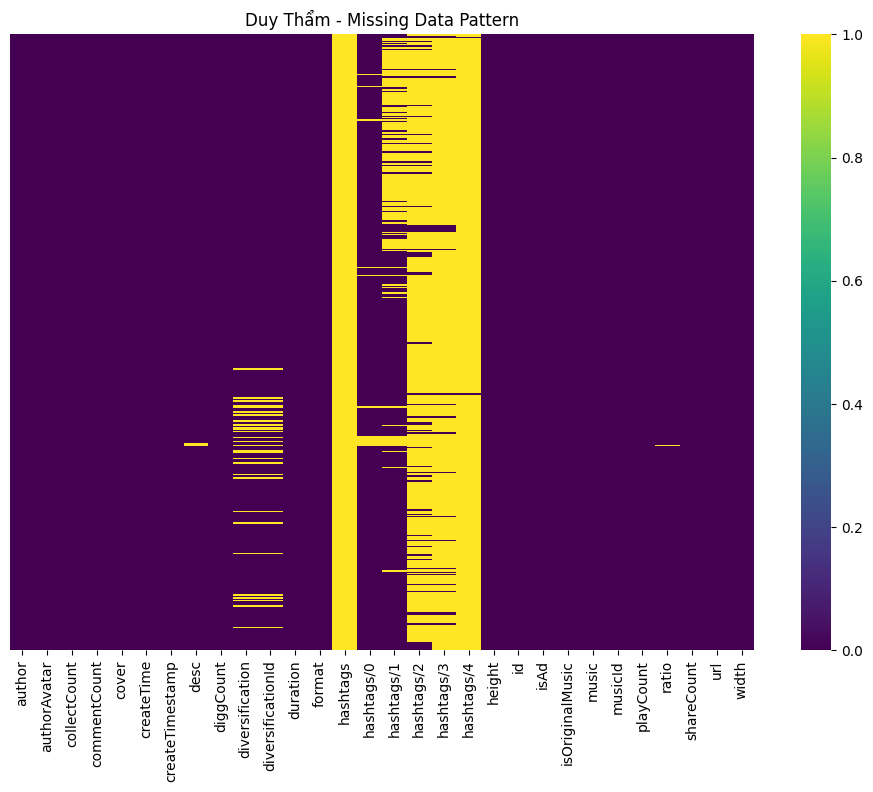

Duy Thẩm Missing Data Analysis đã được lưu vào tệp Excel tại: /content/drive/MyDrive/DMA/missing_data_analysis.xlsx

Duy Thẩm Missing Data Analysis đã được lưu vào: /content/drive/MyDrive/DMA/missing_data_analysis.xlsx


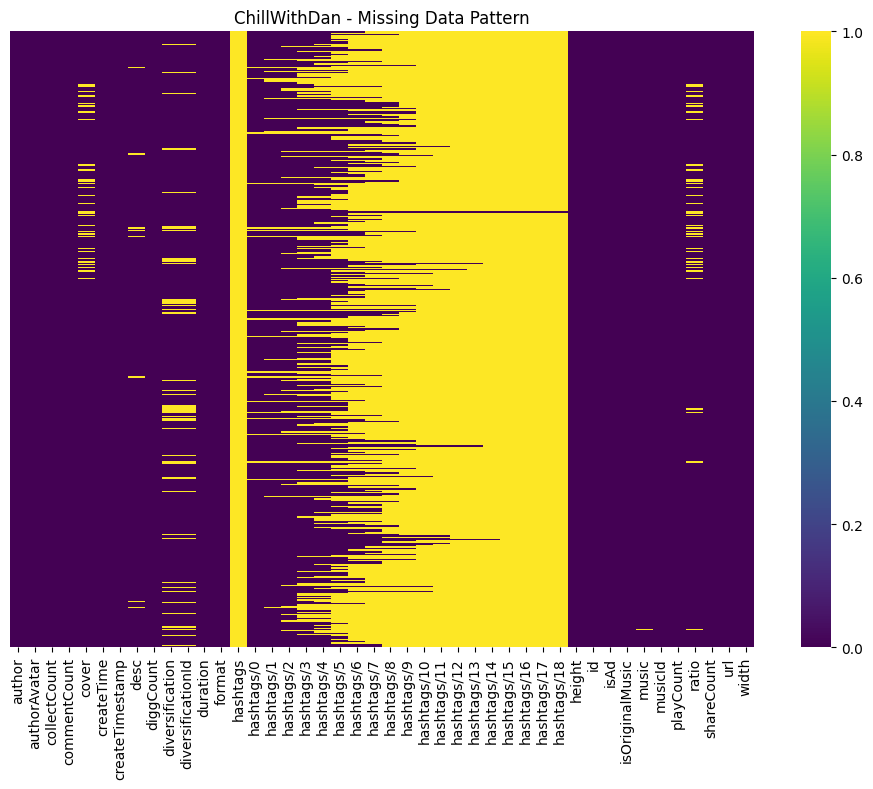

ChillWithDan Missing Data Analysis đã được lưu vào tệp Excel tại: /content/drive/MyDrive/DMA/missing_data_analysis.xlsx

ChillWithDan Missing Data Analysis đã được lưu vào: /content/drive/MyDrive/DMA/missing_data_analysis.xlsx


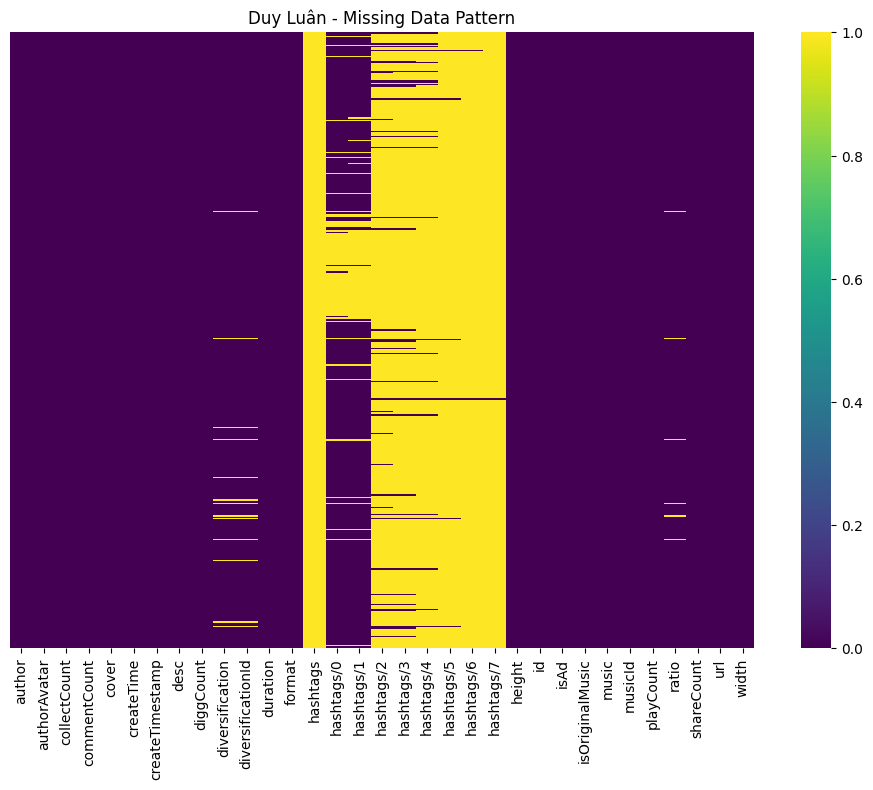

Duy Luân Missing Data Analysis đã được lưu vào tệp Excel tại: /content/drive/MyDrive/DMA/missing_data_analysis.xlsx

Duy Luân Missing Data Analysis đã được lưu vào: /content/drive/MyDrive/DMA/missing_data_analysis.xlsx


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def analyze_missing_data(df, channel_name, output_path):
    """Phân tích chi tiết missing data và lưu kết quả vào Google Drive"""
    # Thống kê dữ liệu bị thiếu
    missing_stats = pd.DataFrame({
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })

    # Phân tích các mẫu missing (bao nhiêu dòng bị thiếu dữ liệu)
    missing_patterns = df.isnull().sum(axis=1).value_counts().sort_index()

    # Vẽ biểu đồ trực quan hóa dữ liệu thiếu
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title(f'{channel_name} - Missing Data Pattern')
    plt.show()

    # Lưu kết quả missing data vào file Excel trên Google Drive
    missing_stats.to_excel(output_path, sheet_name=f'{channel_name}_Missing_Data', index=True)
    print(f"{channel_name} Missing Data Analysis đã được lưu vào tệp Excel tại: {output_path}")

    return missing_stats, missing_patterns

# Đường dẫn tệp lưu kết quả Excel trên Google Drive
output_dir = '/content/drive/MyDrive/DMA/missing_data_analysis.xlsx'

# Áp dụng phân tích cho 3 kênh và lưu kết quả vào Google Drive
for name, df in [('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]:
    output_path = output_dir
    missing_stats, patterns = analyze_missing_data(df, name, output_path)
    print(f"\n{name} Missing Data Analysis đã được lưu vào: {output_path}")


Duplicate Detection

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def detect_duplicates(df, channel_name, output_path, write_mode='a'):
    """Tìm và phân tích duplicate records và lưu kết quả vào Google Drive"""
    # Kiểm tra các bản sao chính xác
    exact_dups = df.duplicated().sum()

    # Kiểm tra các bản sao dựa trên các trường khóa
    key_dups = df.duplicated(subset=['id']).sum() if 'id' in df.columns else 0
    content_dups = df.duplicated(subset=['desc']).sum() if 'desc' in df.columns else 0

    # Kiểm tra các bản sao một phần (nội dung tương tự)
    short_content_dups = 0
    if 'desc' in df.columns:
        desc_lengths = df['desc'].str.len()
        # Filter out potential_dups with count 1 as they are not duplicates
        potential_dups = df[desc_lengths < 50].groupby('desc').size()
        short_content_dups = len(potential_dups[potential_dups > 1])  # Số nhóm có nội dung trùng lặp ngắn

    # Lưu kết quả vào file Excel
    duplicate_stats = pd.DataFrame({
        'exact_duplicates': [exact_dups],
        'id_duplicates': [key_dups],
        'content_duplicates': [content_dups],
        'short_content_groups': [short_content_dups]
    })

    # Kiểm tra và tạo thư mục nếu chưa có
    output_dir = os.path.dirname(output_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Ghi kết quả phân tích vào tệp Excel
    # Use the specified write_mode ('w' or 'a')
    with pd.ExcelWriter(output_path, engine='openpyxl', mode=write_mode) as writer:
        # Check if sheet already exists when in append mode to avoid overwrite warnings/errors
        if write_mode == 'a' and f'{channel_name}_Duplicate_Analysis' in writer.book.sheetnames:
             print(f"Sheet '{channel_name}_Duplicate_Analysis' already exists. Skipping write.")
        else:
            duplicate_stats.to_excel(writer, sheet_name=f'{channel_name}_Duplicate_Analysis', index=False)
            print(f"{channel_name} Duplicate Analysis đã được lưu vào tệp Excel tại: {output_path}")

    return {
        'exact_duplicates': exact_dups,
        'id_duplicates': key_dups,
        'content_duplicates': content_dups,
        'short_content_groups': short_content_dups
    }

# Đường dẫn tệp lưu kết quả Excel trên Google Drive
output_file = '/content/drive/MyDrive/DMA/tiktok_duplicate_analysis.xlsx'

# Kiểm tra và tạo thư mục nếu chưa có
output_dir = os.path.dirname(output_file)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Áp dụng phân tích cho 3 kênh và lưu kết quả vào Google Drive
duplicate_analysis = {}
# Use 'w' mode for the first channel to create the file, then 'a' for subsequent ones
for i, (name, df) in enumerate([('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]):
    mode = 'w' if i == 0 else 'a'
    duplicate_analysis[name] = detect_duplicates(df, name, output_file, write_mode=mode)
    print(f"\n{name} Duplicate Analysis:")
    for key, value in duplicate_analysis[name].items():
        print(f"  {key}: {value}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Duy Thẩm Duplicate Analysis đã được lưu vào tệp Excel tại: /content/drive/MyDrive/DMA/tiktok_duplicate_analysis.xlsx

Duy Thẩm Duplicate Analysis:
  exact_duplicates: 0
  id_duplicates: 0
  content_duplicates: 1
  short_content_groups: 0
ChillWithDan Duplicate Analysis đã được lưu vào tệp Excel tại: /content/drive/MyDrive/DMA/tiktok_duplicate_analysis.xlsx

ChillWithDan Duplicate Analysis:
  exact_duplicates: 0
  id_duplicates: 0
  content_duplicates: 7
  short_content_groups: 0
Duy Luân Duplicate Analysis đã được lưu vào tệp Excel tại: /content/drive/MyDrive/DMA/tiktok_duplicate_analysis.xlsx

Duy Luân Duplicate Analysis:
  exact_duplicates: 0
  id_duplicates: 0
  content_duplicates: 0
  short_content_groups: 0


Data Type & Range Validation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def validate_data_ranges(df, channel_name, output_path, write_mode='a'):
    """Kiểm tra tính hợp lý của data ranges và lưu kết quả vào Google Drive"""
    # Danh sách các cột số cần kiểm tra
    numeric_cols = ['collectCount', 'commentCount', 'diggCount', 'playCount', 'shareCount']

    validation_results = {}

    for col in numeric_cols:
        if col in df.columns:
            # Basic stats
            stats = df[col].describe()

            # Kiểm tra giá trị âm
            negative_count = (df[col] < 0).sum()

            # Kiểm tra outliers cực đoan (vượt quá 3 độ lệch chuẩn)
            mean_val = df[col].mean()
            std_val = df[col].std()
            outliers = df[(df[col] > mean_val + 3*std_val) | (df[col] < mean_val - 3*std_val)]

            # Kiểm tra tỷ lệ không hợp lý
            if col == 'commentCount' and 'playCount' in df.columns:
                # Ensure both columns exist and are numeric before comparison
                if pd.api.types.is_numeric_dtype(df[col]) and pd.api.types.is_numeric_dtype(df['playCount']):
                    impossible_ratios = (df[col] > df['playCount']).sum()
                else:
                    impossible_ratios = 0 # Or handle this case as appropriate
            else:
                impossible_ratios = 0

            # Lưu kết quả vào validation_results
            validation_results[col] = {
                'min': stats['min'],
                'max': stats['max'],
                'negative_values': negative_count,
                'extreme_outliers': len(outliers),
                'impossible_ratios': impossible_ratios
            }

    # Kiểm tra và tạo thư mục nếu chưa có
    output_dir = os.path.dirname(output_path)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Ghi kết quả phân tích vào tệp Excel
    validation_stats = pd.DataFrame(validation_results).T  # Chuyển kết quả thành DataFrame

    # Conditionally add if_sheet_exists based on write_mode
    # Use if_sheet_exists='replace' to handle re-runs cleanly when in append mode
    writer_kwargs = {'engine': 'openpyxl', 'mode': write_mode}
    if write_mode == 'a':
        writer_kwargs['if_sheet_exists'] = 'replace'

    with pd.ExcelWriter(output_path, **writer_kwargs) as writer:
        validation_stats.to_excel(writer, sheet_name=f'{channel_name}_Validation', index=True)
    print(f"{channel_name} Data Validation đã được lưu vào tệp Excel tại: {output_path}")

    return validation_results

# Đường dẫn tệp lưu kết quả Excel trên Google Drive
output_file = '/content/drive/MyDrive/DMA/tiktok_data_validation.xlsx'

# Kiểm tra và tạo thư mục nếu chưa có
output_dir = os.path.dirname(output_file)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Áp dụng validate cho 3 kênh và lưu kết quả vào Google Drive
validation_results = {}
# Use 'w' mode for the first channel to create the file, then 'a' for subsequent ones
for i, (name, df) in enumerate([('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]):
    mode = 'w' if i == 0 else 'a'
    validation_results[name] = validate_data_ranges(df, name, output_file, write_mode=mode)
    print(f"\n{name} Data Validation:")
    for col, results in validation_results[name].items():
        print(f"  {col}: {results}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Duy Thẩm Data Validation đã được lưu vào tệp Excel tại: /content/drive/MyDrive/DMA/tiktok_data_validation.xlsx

Duy Thẩm Data Validation:
  collectCount: {'min': np.float64(121.0), 'max': np.float64(93400.0), 'negative_values': np.int64(0), 'extreme_outliers': 13, 'impossible_ratios': 0}
  commentCount: {'min': np.float64(55.0), 'max': np.float64(464000.0), 'negative_values': np.int64(0), 'extreme_outliers': 1, 'impossible_ratios': np.int64(0)}
  diggCount: {'min': np.float64(4454.0), 'max': np.float64(2700000.0), 'negative_values': np.int64(0), 'extreme_outliers': 7, 'impossible_ratios': 0}
  playCount: {'min': np.float64(136200.0), 'max': np.float64(44800000.0), 'negative_values': np.int64(0), 'extreme_outliers': 8, 'impossible_ratios': 0}
  shareCount: {'min': np.float64(22.0), 'max': np.float64(476200.0), 'negative_values': np.int64(0), 'extreme_outliers'

Distribution Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Duy Thẩm Distribution Analysis ===
             playCount     diggCount   commentCount     shareCount  \
count     5.000000e+02  5.000000e+02     500.000000     500.000000   
mean      3.825778e+06  2.061309e+05    2971.418000    7598.250000   
std       4.617799e+06  2.675751e+05   21053.617671   27742.968011   
min       1.362000e+05  4.454000e+03      55.000000      22.000000   
25%       1.300000e+06  6.175000e+04     468.750000     672.750000   
50%       2.300000e+06  1.216000e+05     893.500000    1699.000000   
75%       4.500000e+06  2.562250e+05    1996.250000    4934.000000   
max       4.480000e+07  2.700000e+06  464000.000000  476200.000000   
skewness  4.078204e+00  4.468814e+00      21.169409      11.436094   
kurtosis  2.569421e+01  2.961681e+01     463.430466     171.390298   

          collectCount  
count       500.000000  
mean      

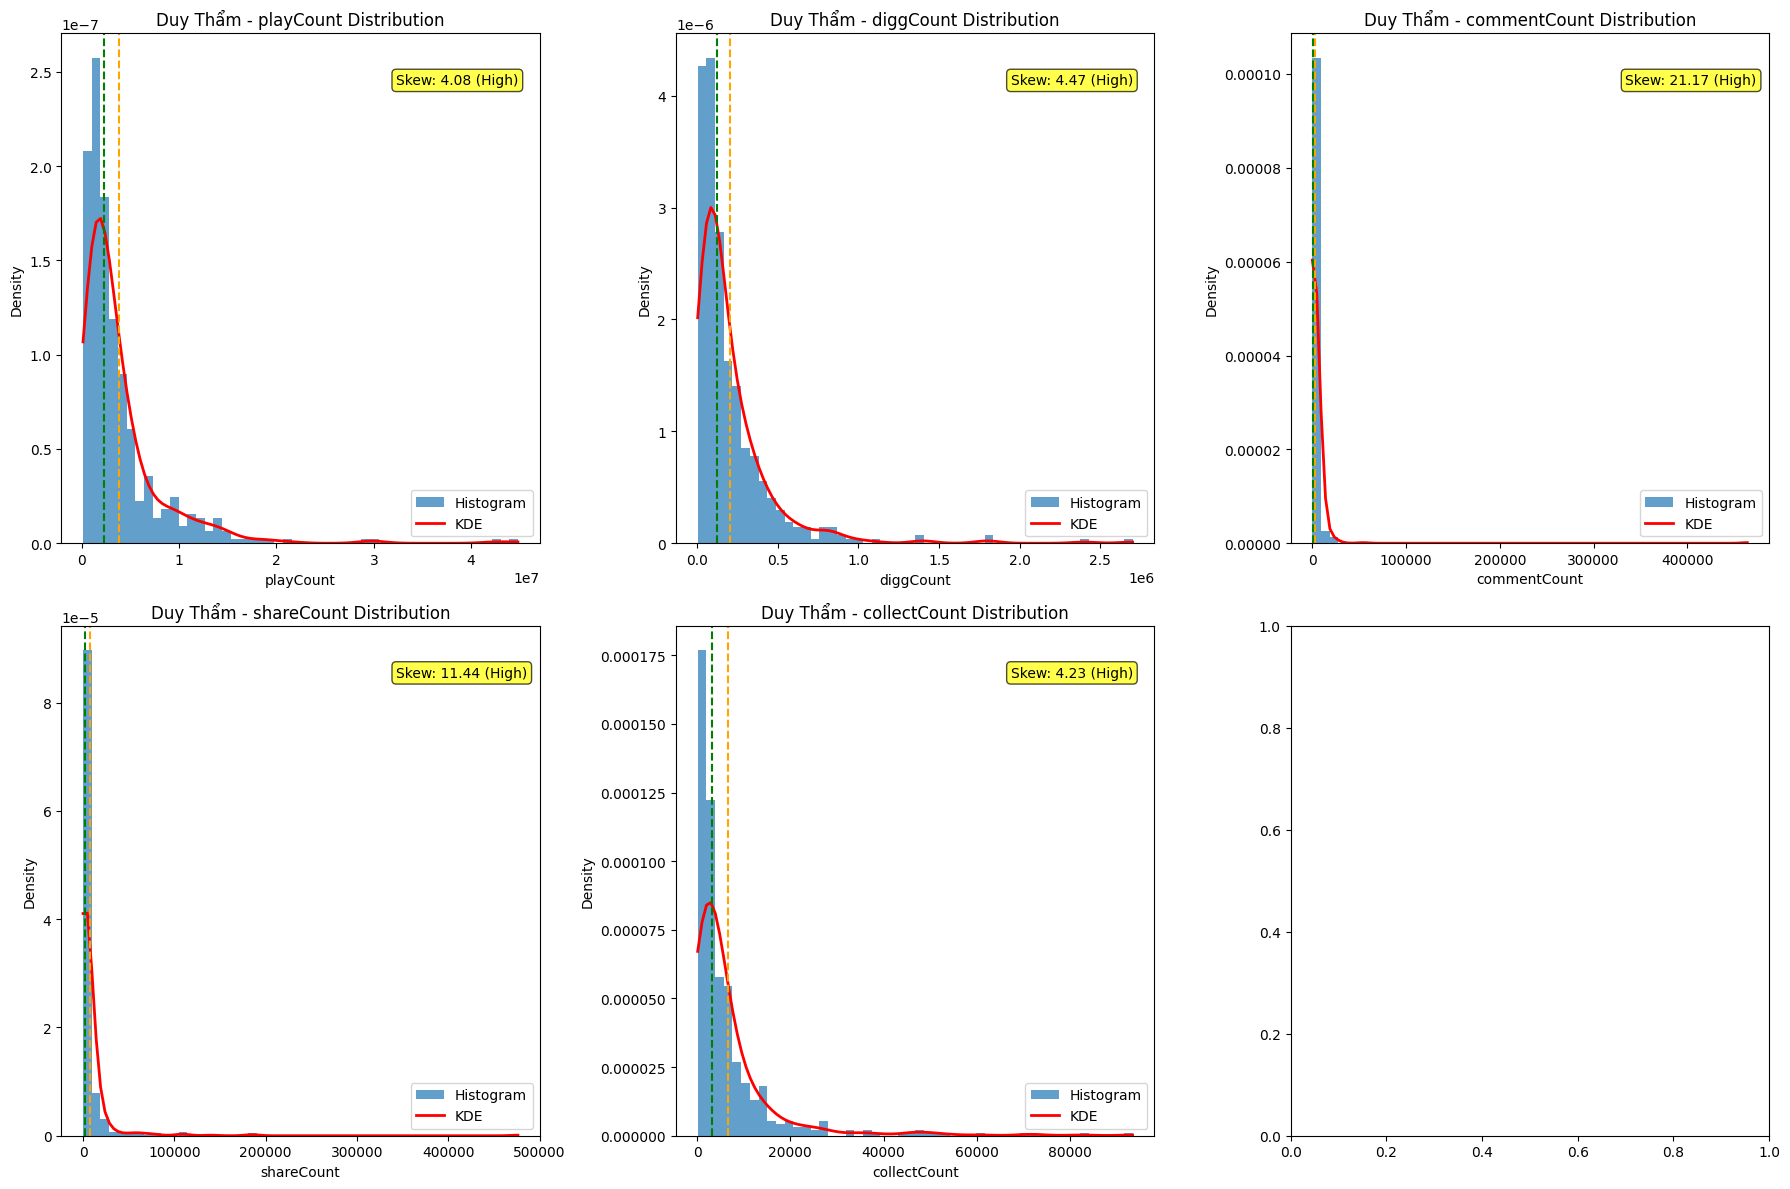

Phân tích đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/engagement_analysis_results/Duy Thẩm_engagement_distribution.png
- Stats: /content/drive/MyDrive/DMA/engagement_analysis_results/Duy Thẩm_engagement_stats.xlsx

=== ChillWithDan Distribution Analysis ===
             playCount       diggCount  commentCount    shareCount  \
count     5.000000e+02      500.000000    500.000000    500.000000   
mean      2.501627e+05     8042.228000    105.746000    342.714000   
std       1.356410e+06    54776.526581    522.989734   1979.328566   
min       1.346000e+03       26.000000      0.000000      0.000000   
25%       1.040000e+04      205.000000     11.000000      5.000000   
50%       2.640000e+04      847.000000     22.500000     16.000000   
75%       8.940000e+04     3399.750000     53.250000     69.250000   
max       2.200000e+07  1000000.000000   9416.000000  32700.000000   
skewness  1.215040e+01       15.344456     13.724380     12.008780   
kurtosis  1.68352

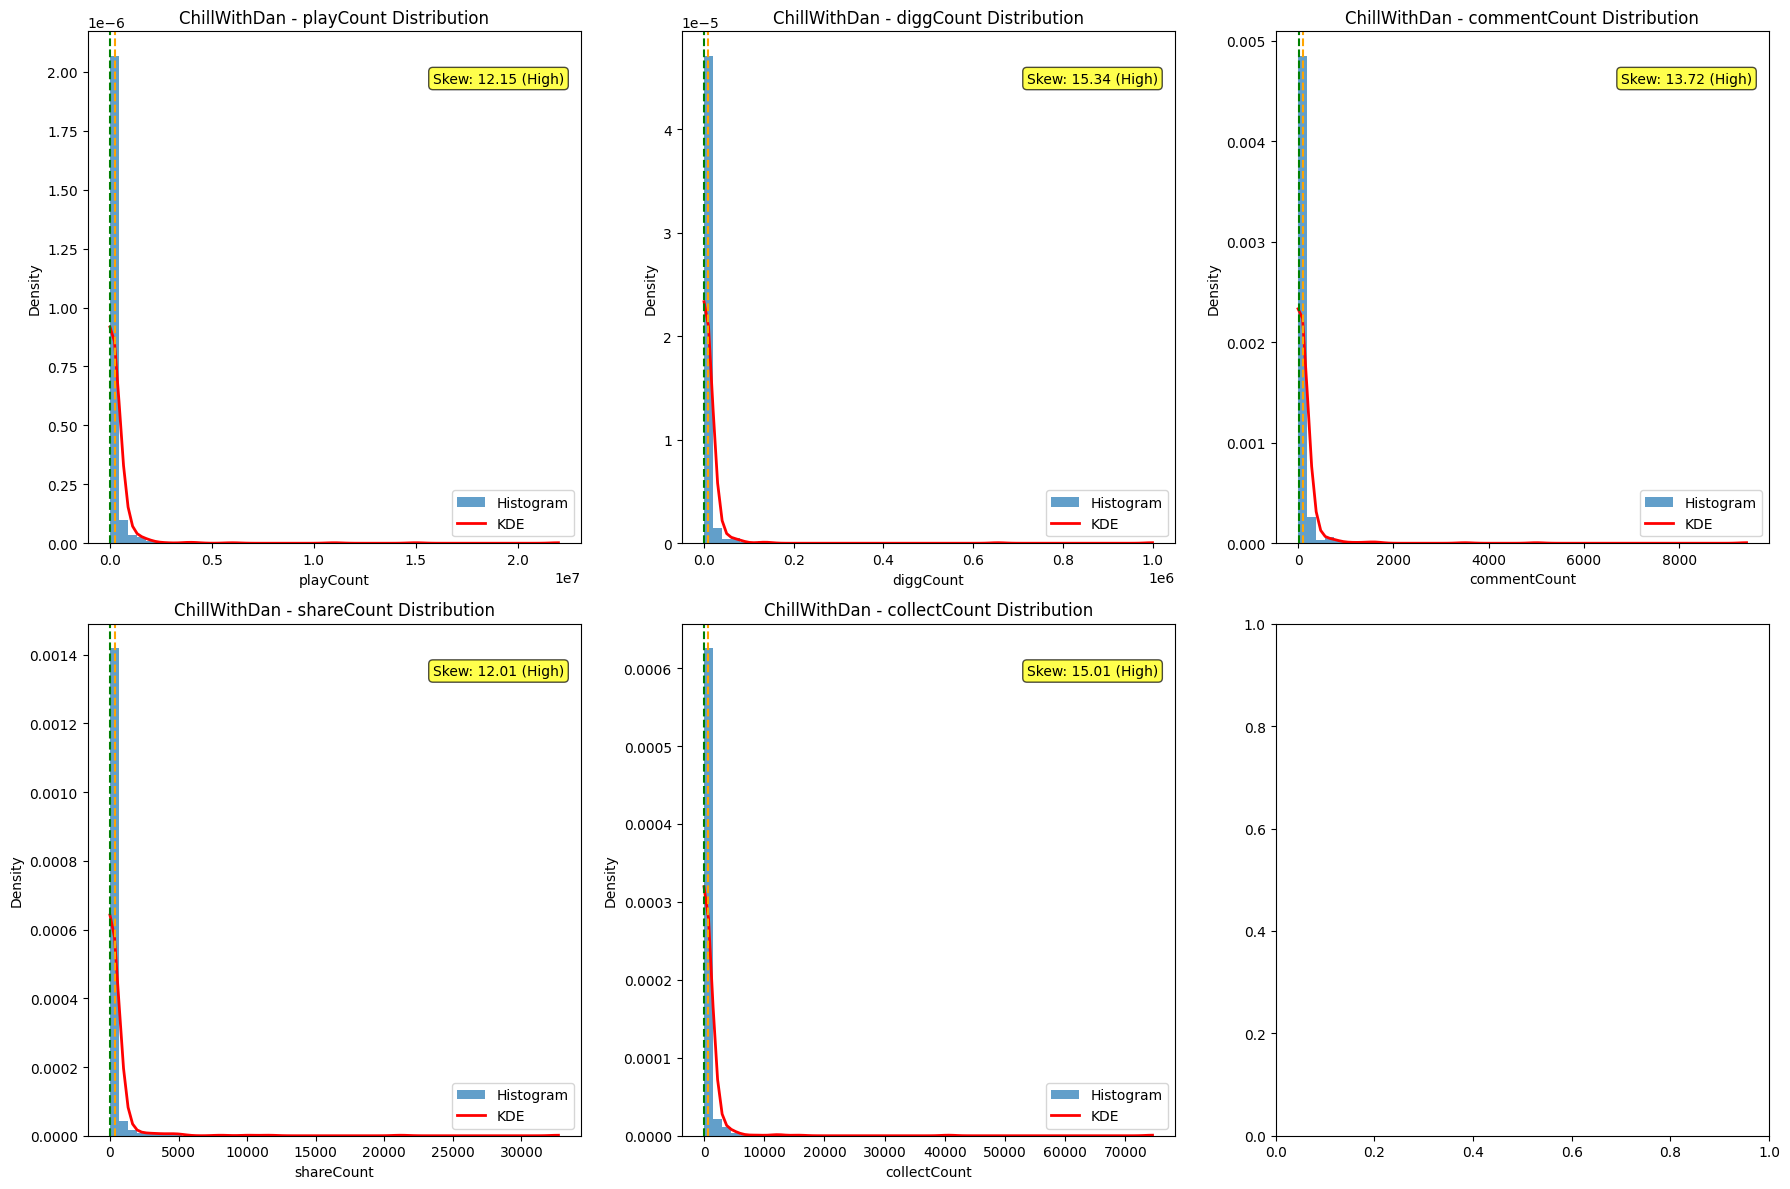

Phân tích đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/engagement_analysis_results/ChillWithDan_engagement_distribution.png
- Stats: /content/drive/MyDrive/DMA/engagement_analysis_results/ChillWithDan_engagement_stats.xlsx

=== Duy Luân Distribution Analysis ===
             playCount      diggCount  commentCount    shareCount  \
count     5.000000e+02     500.000000    500.000000    500.000000   
mean      4.703837e+05    8990.754000    257.094000    729.102000   
std       1.365466e+06   19218.819550    536.037246   3043.971804   
min       5.596000e+03     109.000000      5.000000      0.000000   
25%       1.000000e+05    1809.250000     48.750000     91.750000   
50%       2.145000e+05    3950.500000    115.000000    244.000000   
75%       4.585750e+05    9038.250000    263.250000    644.750000   
max       2.610000e+07  324200.000000   8066.000000  64600.000000   
skewness  1.445762e+01      10.162071      8.630387     18.741870   
kurtosis  2.562626e+02 

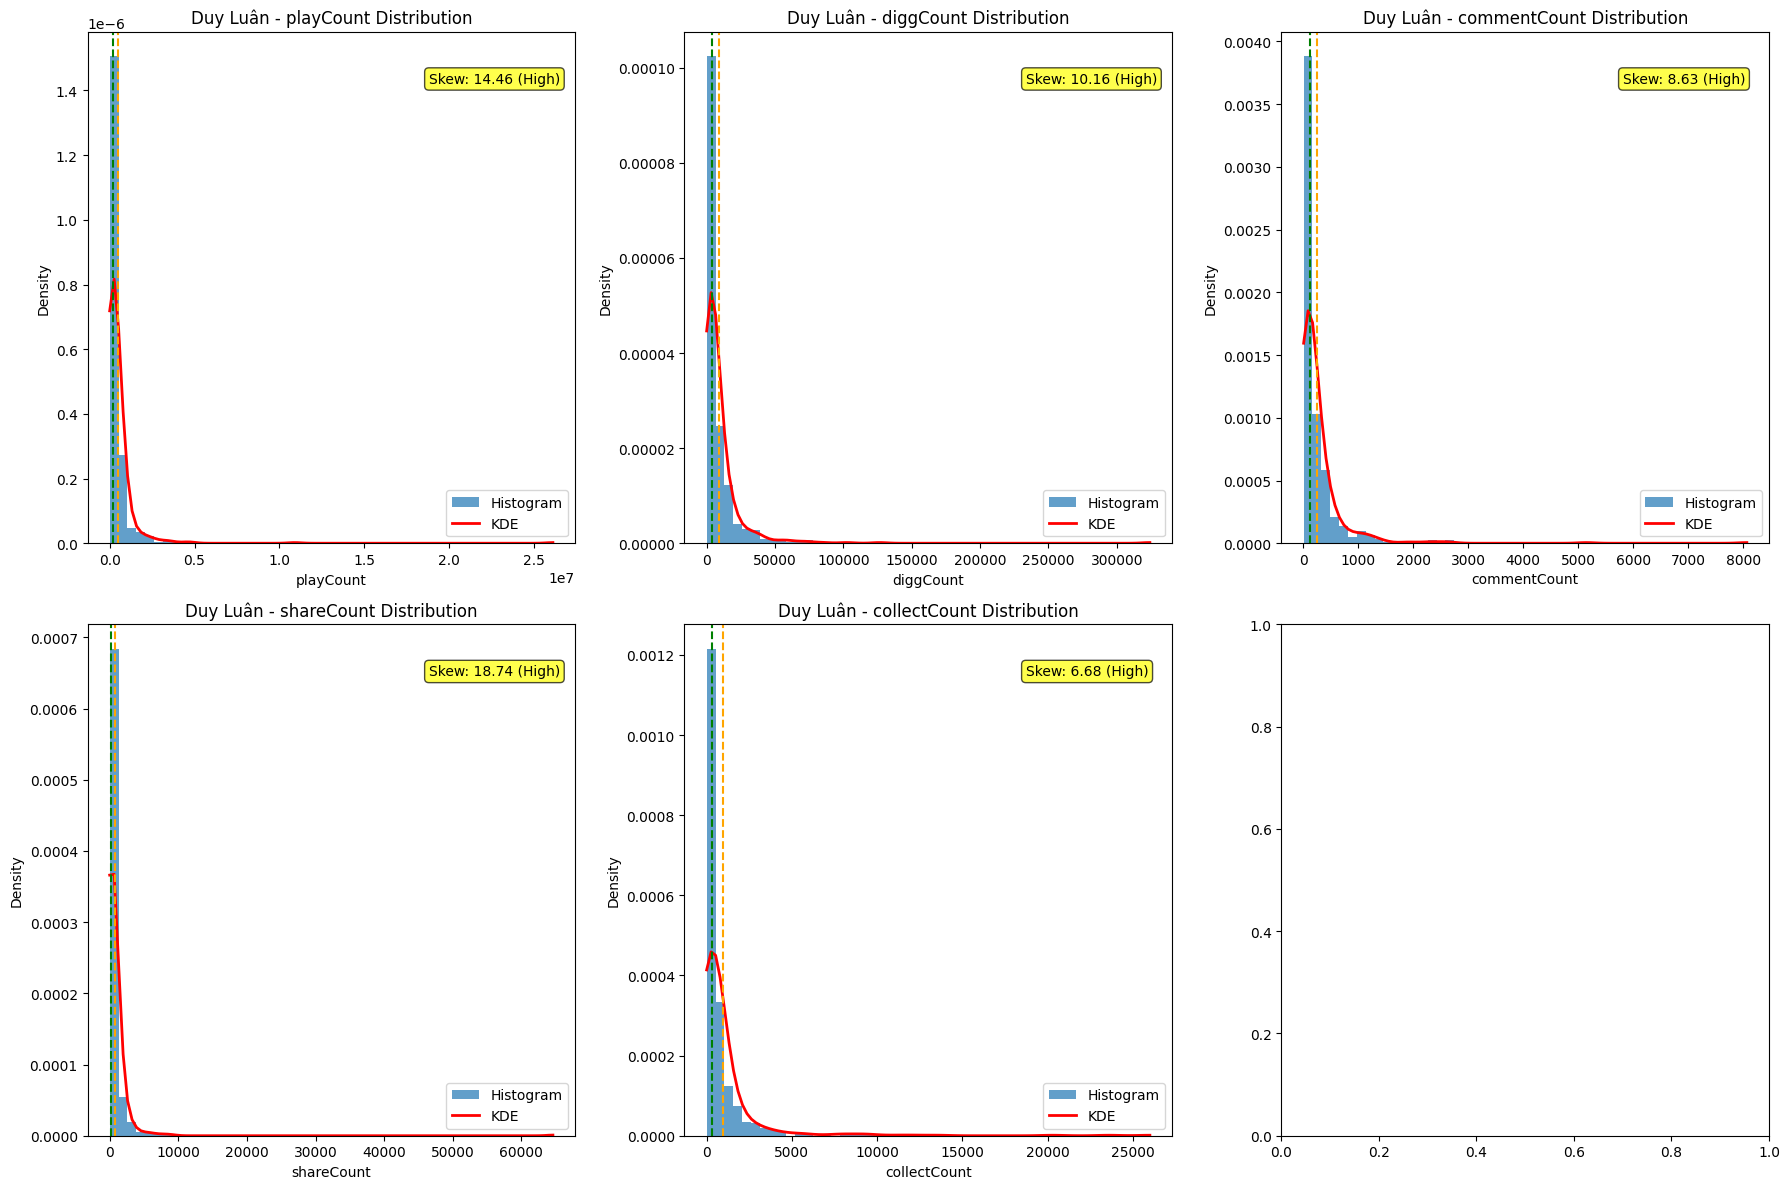

Phân tích đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/engagement_analysis_results/Duy Luân_engagement_distribution.png
- Stats: /content/drive/MyDrive/DMA/engagement_analysis_results/Duy Luân_engagement_stats.xlsx

Engagement distribution analysis complete for all channels.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def analyze_engagement_distributions(df, channel_name, output_dir):
    """Phân tích phân phối chi tiết của engagement metrics và lưu kết quả vào Google Drive"""
    engagement_cols = ['playCount', 'diggCount', 'commentCount', 'shareCount', 'collectCount']

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    for i, col in enumerate(engagement_cols):
        if col in df.columns and i < len(axes):
            # Histogram with KDE
            axes[i].hist(df[col], bins=50, alpha=0.7, density=True, label='Histogram')

            # Add KDE curve
            kde = stats.gaussian_kde(df[col].dropna())
            # Handle potential issues if the column has no non-NaN values
            if df[col].min() != df[col].max():
              x_range = np.linspace(df[col].min(), df[col].max(), 100)
              axes[i].plot(x_range, kde(x_range), 'r-', label='KDE', linewidth=2)

            axes[i].set_title(f'{channel_name} - {col} Distribution')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Density')
            axes[i].legend()

            # Add statistics text
            mean_val = df[col].mean()
            median_val = df[col].median()
            skew_val = df[col].skew()
            axes[i].axvline(mean_val, color='orange', linestyle='--', label=f'Mean: {mean_val:.2f}')
            axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')

            # Add skewness interpretation
            if abs(skew_val) < 0.5:
                skew_interp = "Normal"
            elif abs(skew_val) < 1:
                skew_interp = "Moderate"
            else:
                skew_interp = "High"
            axes[i].text(0.7, 0.9, f'Skew: {skew_val:.2f} ({skew_interp})',
                         transform=axes[i].transAxes, fontsize=10,
                         bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))
        elif i < len(axes):
            # If column is not in df, plot an empty graph or indicate missing
            axes[i].set_title(f'{channel_name} - {col} Distribution (Missing)')
            axes[i].text(0.5, 0.5, "Column not found", horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)


    plt.tight_layout()

    # Lưu đồ thị vào Google Drive - This is now handled by the calling loop
    # plot_path = os.path.join(output_dir, f'{channel_name}_engagement_distribution.png')
    # plt.savefig(plot_path)
    # plt.show()

    # Lưu bảng thống kê vào Google Drive - This is now handled by the calling loop
    stats_df = df[engagement_cols].describe()
    stats_df.loc['skewness'] = df[engagement_cols].skew()
    stats_df.loc['kurtosis'] = df[engagement_cols].kurtosis()

    # Xuất kết quả thống kê vào file Excel - This is now handled by the calling loop
    # excel_path = os.path.join(output_dir, f'{channel_name}_engagement_stats.xlsx')
    # stats_df.to_excel(excel_path)

    # print(f"Phân tích đã được lưu vào Google Drive tại:\n- Plot: {plot_path}\n- Stats: {excel_path}")

    return stats_df

# Đường dẫn thư mục lưu kết quả vào Google Drive
output_dir = '/content/drive/MyDrive/DMA/engagement_analysis_results/'

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Phân tích distribution cho cả 3 kênh
distribution_stats = {}
# Ensure 'duy_tham', 'chillwithdan', 'duy_luan' DataFrames are defined before this loop
# These placeholder DataFrames are for demonstration. Replace with your actual data loading
# if running this cell independently. If running the full notebook, the dataframes
# will be loaded in the first cell.
if 'duy_tham' not in globals():
    duy_tham = pd.DataFrame({
        'playCount': np.random.randint(100, 100000, 100),
        'diggCount': np.random.randint(10, 10000, 100),
        'commentCount': np.random.randint(1, 1000, 100),
        'shareCount': np.random.randint(0, 500, 100),
        'collectCount': np.random.randint(0, 200, 100)
    })
if 'chillwithdan' not in globals():
    chillwithdan = pd.DataFrame({
        'playCount': np.random.randint(50, 50000, 100),
        'diggCount': np.random.randint(5, 5000, 100),
        'commentCount': np.random.randint(0, 500, 100),
        'shareCount': np.random.randint(0, 200, 100),
        'collectCount': np.random.randint(0, 100, 100)
    })
if 'duy_luan' not in globals():
    duy_luan = pd.DataFrame({
        'playCount': np.random.randint(200, 200000, 100),
        'diggCount': np.random.randint(20, 20000, 100),
        'commentCount': np.random.randint(2, 2000, 100),
        'shareCount': np.random.randint(0, 1000, 100),
        'collectCount': np.random.randint(0, 500, 100)
    })

for name, df in [('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]:
    print(f"\n=== {name} Distribution Analysis ===")
    # Call the analysis function
    distribution_stats[name] = analyze_engagement_distributions(df, name, output_dir)
    print(distribution_stats[name])

    # Lưu đồ thị vào Google Drive - Now using 'name' from the loop
    plot_path = os.path.join(output_dir, f'{name}_engagement_distribution.png')
    plt.savefig(plot_path)
    plt.show() # Ensure plot is displayed after saving

    # Lưu bảng thống kê vào Google Drive - Now using 'name' from the loop
    excel_path = os.path.join(output_dir, f'{name}_engagement_stats.xlsx')
    # Access the stats_df returned by the function
    returned_stats_df = distribution_stats[name]
    returned_stats_df.to_excel(excel_path)

    print(f"Phân tích đã được lưu vào Google Drive tại:\n- Plot: {plot_path}\n- Stats: {excel_path}")

# You might want to add a final print statement after the loop completes
print("\nEngagement distribution analysis complete for all channels.")

Box Plot Analysis với Outlier Detection

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Duy Thẩm Outlier Analysis ===


<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_data = axes[i].boxplot([df[col].dropna()], labels=[col])
<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_data = axes[i].boxplot([df[col].dropna()], labels=[col])
<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_data = axes[i].boxplot([df[col].dropna()], labels=[col])
<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped 

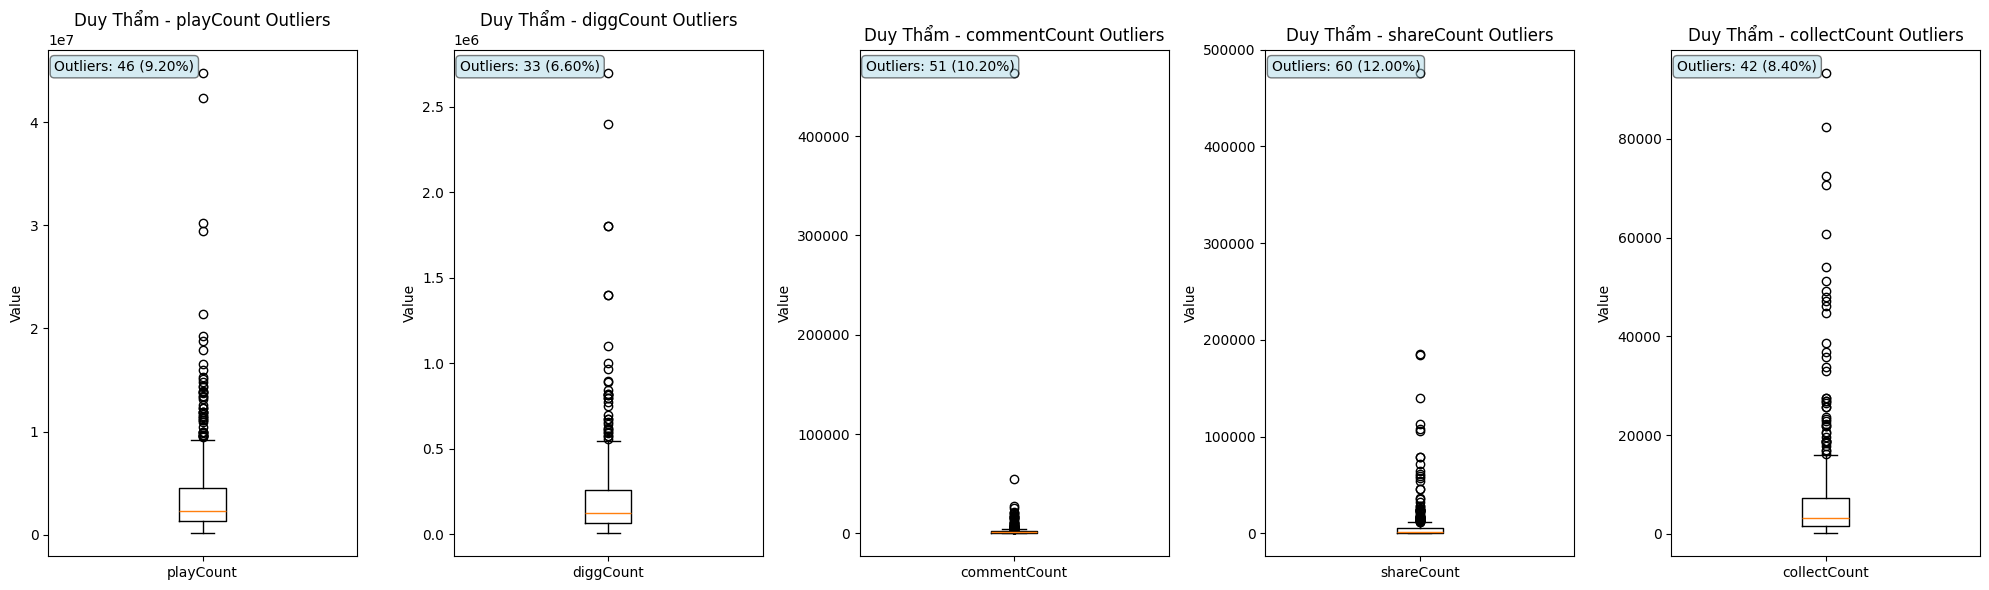

Phân tích outliers đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/outlier_analysis_results/Duy Thẩm_outlier_distribution.png
- Stats: /content/drive/MyDrive/DMA/outlier_analysis_results/Duy Thẩm_outlier_stats.xlsx

playCount:
  total_outliers: 46
  outlier_percentage: 9.2
  lower_bound: -3500000.0
  upper_bound: 9300000.0
  max_outlier: 44800000

diggCount:
  total_outliers: 33
  outlier_percentage: 6.6000000000000005
  lower_bound: -229962.5
  upper_bound: 547937.5
  max_outlier: 2700000

commentCount:
  total_outliers: 51
  outlier_percentage: 10.2
  lower_bound: -1822.5
  upper_bound: 4287.5
  max_outlier: 464000

shareCount:
  total_outliers: 60
  outlier_percentage: 12.0
  lower_bound: -5719.125
  upper_bound: 11325.875
  max_outlier: 476200

collectCount:
  total_outliers: 42
  outlier_percentage: 8.4
  lower_bound: -7173.375
  upper_bound: 16071.625
  max_outlier: 93400

=== ChillWithDan Outlier Analysis ===


<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_data = axes[i].boxplot([df[col].dropna()], labels=[col])
<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_data = axes[i].boxplot([df[col].dropna()], labels=[col])
<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_data = axes[i].boxplot([df[col].dropna()], labels=[col])
<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped 

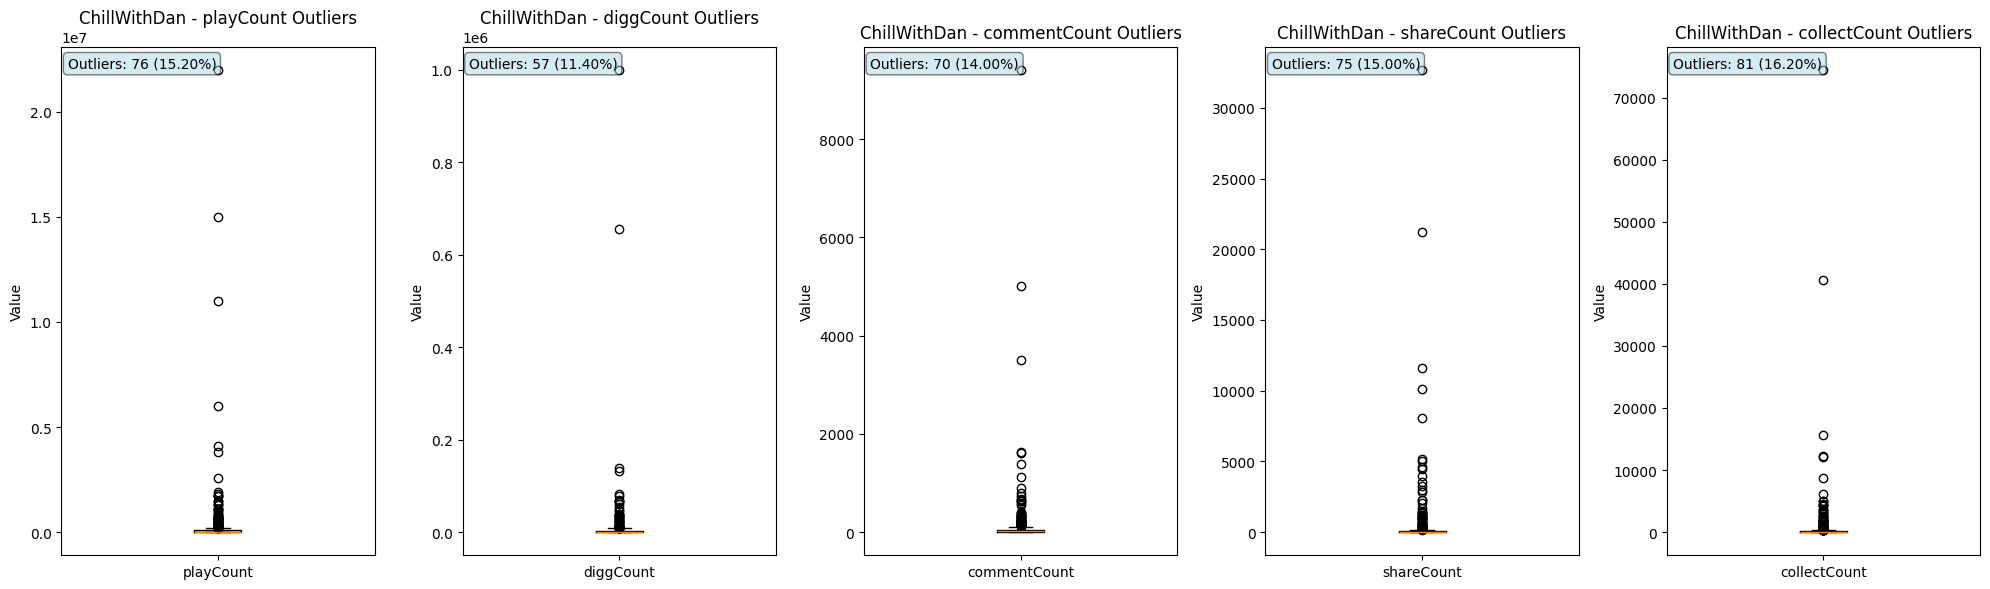

Phân tích outliers đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/outlier_analysis_results/ChillWithDan_outlier_distribution.png
- Stats: /content/drive/MyDrive/DMA/outlier_analysis_results/ChillWithDan_outlier_stats.xlsx

playCount:
  total_outliers: 76
  outlier_percentage: 15.2
  lower_bound: -108100.0
  upper_bound: 207900.0
  max_outlier: 22000000

diggCount:
  total_outliers: 57
  outlier_percentage: 11.4
  lower_bound: -4587.125
  upper_bound: 8191.875
  max_outlier: 1000000

commentCount:
  total_outliers: 70
  outlier_percentage: 14.000000000000002
  lower_bound: -52.375
  upper_bound: 116.625
  max_outlier: 9416

shareCount:
  total_outliers: 75
  outlier_percentage: 15.0
  lower_bound: -91.375
  upper_bound: 165.625
  max_outlier: 32700

collectCount:
  total_outliers: 81
  outlier_percentage: 16.2
  lower_bound: -168.5
  upper_bound: 315.5
  max_outlier: 74500

=== Duy Luân Outlier Analysis ===


<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_data = axes[i].boxplot([df[col].dropna()], labels=[col])
<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_data = axes[i].boxplot([df[col].dropna()], labels=[col])
<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_data = axes[i].boxplot([df[col].dropna()], labels=[col])
<ipython-input-34-8108af23688d>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped 

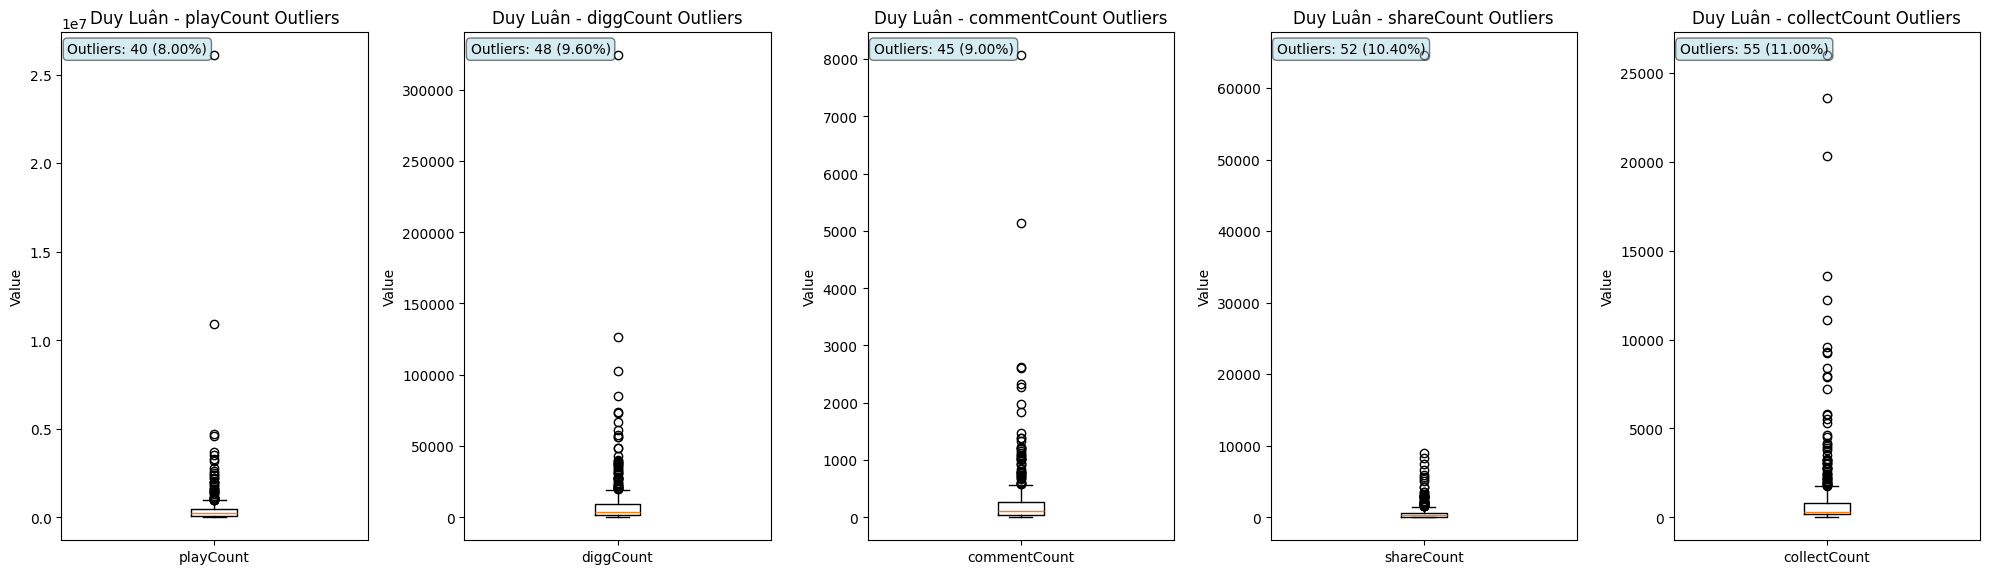

Phân tích outliers đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/outlier_analysis_results/Duy Luân_outlier_distribution.png
- Stats: /content/drive/MyDrive/DMA/outlier_analysis_results/Duy Luân_outlier_stats.xlsx

playCount:
  total_outliers: 40
  outlier_percentage: 8.0
  lower_bound: -437862.5
  upper_bound: 996437.5
  max_outlier: 26100000

diggCount:
  total_outliers: 48
  outlier_percentage: 9.6
  lower_bound: -9034.25
  upper_bound: 19881.75
  max_outlier: 324200

commentCount:
  total_outliers: 45
  outlier_percentage: 9.0
  lower_bound: -273.0
  upper_bound: 585.0
  max_outlier: 8066

shareCount:
  total_outliers: 52
  outlier_percentage: 10.4
  lower_bound: -737.75
  upper_bound: 1474.25
  max_outlier: 64600

collectCount:
  total_outliers: 55
  outlier_percentage: 11.0
  lower_bound: -796.375
  upper_bound: 1756.625
  max_outlier: 26000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def analyze_outliers_detailed(df, channel_name, output_dir):
    """Phân tích outliers chi tiết"""
    engagement_cols = ['playCount', 'diggCount', 'commentCount', 'shareCount', 'collectCount']

    fig, axes = plt.subplots(1, len(engagement_cols), figsize=(20, 6))
    axes = axes.ravel()

    outlier_stats = {}

    for i, col in enumerate(engagement_cols):
        if col in df.columns:
            # Box plot
            box_data = axes[i].boxplot([df[col].dropna()], labels=[col])
            axes[i].set_title(f'{channel_name} - {col} Outliers')
            axes[i].set_ylabel('Value')

            # Calculate outlier boundaries
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identify outliers
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

            # Add outlier info to plot
            axes[i].text(0.02, 0.98, f'Outliers: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}%)',
                         transform=axes[i].transAxes, fontsize=10, verticalalignment='top',
                         bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.5))

            outlier_stats[col] = {
                'total_outliers': len(outliers),
                'outlier_percentage': (len(outliers) / len(df)) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'max_outlier': outliers[col].max() if len(outliers) > 0 else None,
                'outlier_values': outliers[col].tolist()[:10]  # Top 10 outliers
            }

    plt.tight_layout()

    # Lưu đồ thị vào Google Drive
    plot_path = os.path.join(output_dir, f'{channel_name}_outlier_distribution.png')
    plt.savefig(plot_path)
    plt.show()

    # Lưu kết quả thống kê vào Google Drive (Excel)
    stats_df = pd.DataFrame(outlier_stats).T  # Chuyển kết quả thành DataFrame
    excel_path = os.path.join(output_dir, f'{channel_name}_outlier_stats.xlsx')
    stats_df.to_excel(excel_path)

    print(f"Phân tích outliers đã được lưu vào Google Drive tại:\n- Plot: {plot_path}\n- Stats: {excel_path}")

    return outlier_stats

# Đường dẫn thư mục lưu kết quả vào Google Drive
output_dir = '/content/drive/MyDrive/DMA/outlier_analysis_results/'

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Phân tích outliers cho cả 3 kênh
outlier_analysis = {}
for name, df in [('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]:
    print(f"\n=== {name} Outlier Analysis ===")
    outlier_analysis[name] = analyze_outliers_detailed(df, name, output_dir)
    for col, stats in outlier_analysis[name].items():
        print(f"\n{col}:")
        for key, value in stats.items():
            if key != 'outlier_values':
                print(f"  {key}: {value}")


 Time Series Patterns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Duy Thẩm Temporal Analysis ===


<ipython-input-35-1e5d5184a6e0>:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(hourly_engagement.index, hourly_engagement.values, 'ro-', color='red', label='Engagement')


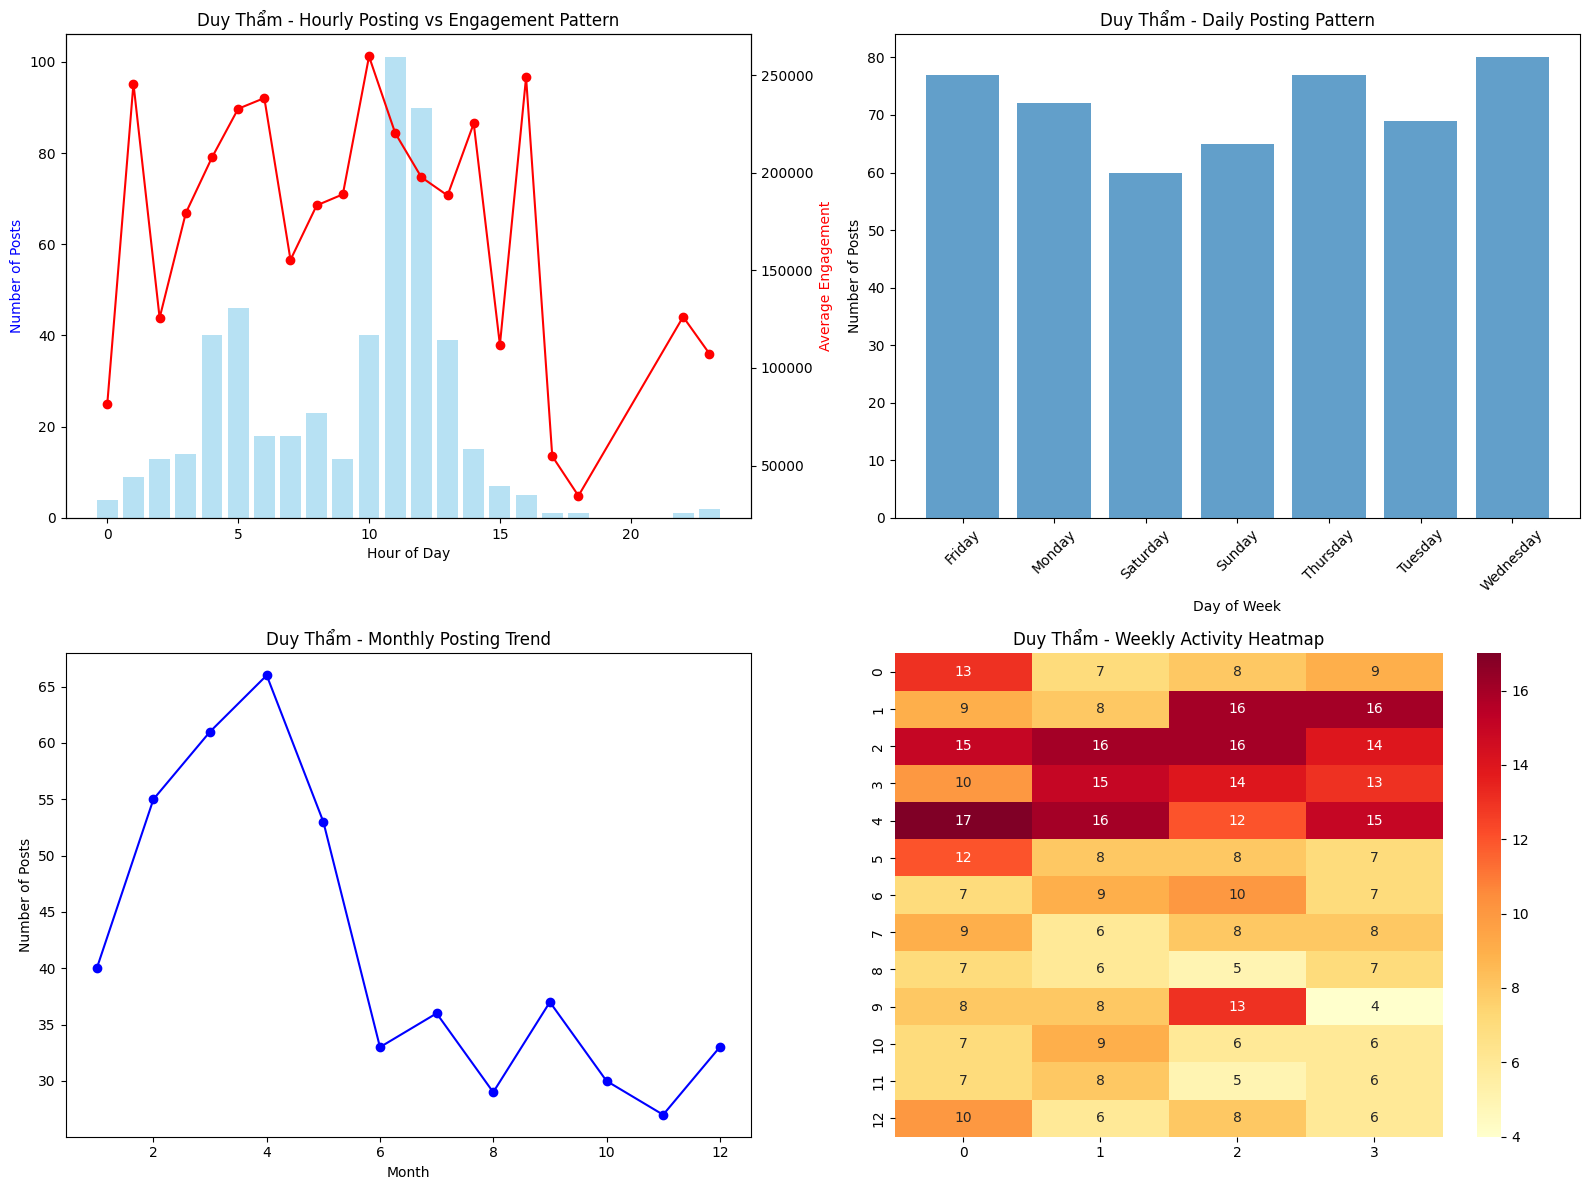

Phân tích temporal đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/temporal_analysis_results/Duy Thẩm_temporal_patterns.png
- Stats: /content/drive/MyDrive/DMA/temporal_analysis_results/Duy Thẩm_temporal_stats.xlsx
  best_posting_hour: 10
  best_posting_day: Thursday
  most_active_hour: 11
  most_active_day: Wednesday
  posting_consistency: 1.1634545113583084
  engagement_consistency: 0.38571691017692555

=== ChillWithDan Temporal Analysis ===


<ipython-input-35-1e5d5184a6e0>:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(hourly_engagement.index, hourly_engagement.values, 'ro-', color='red', label='Engagement')


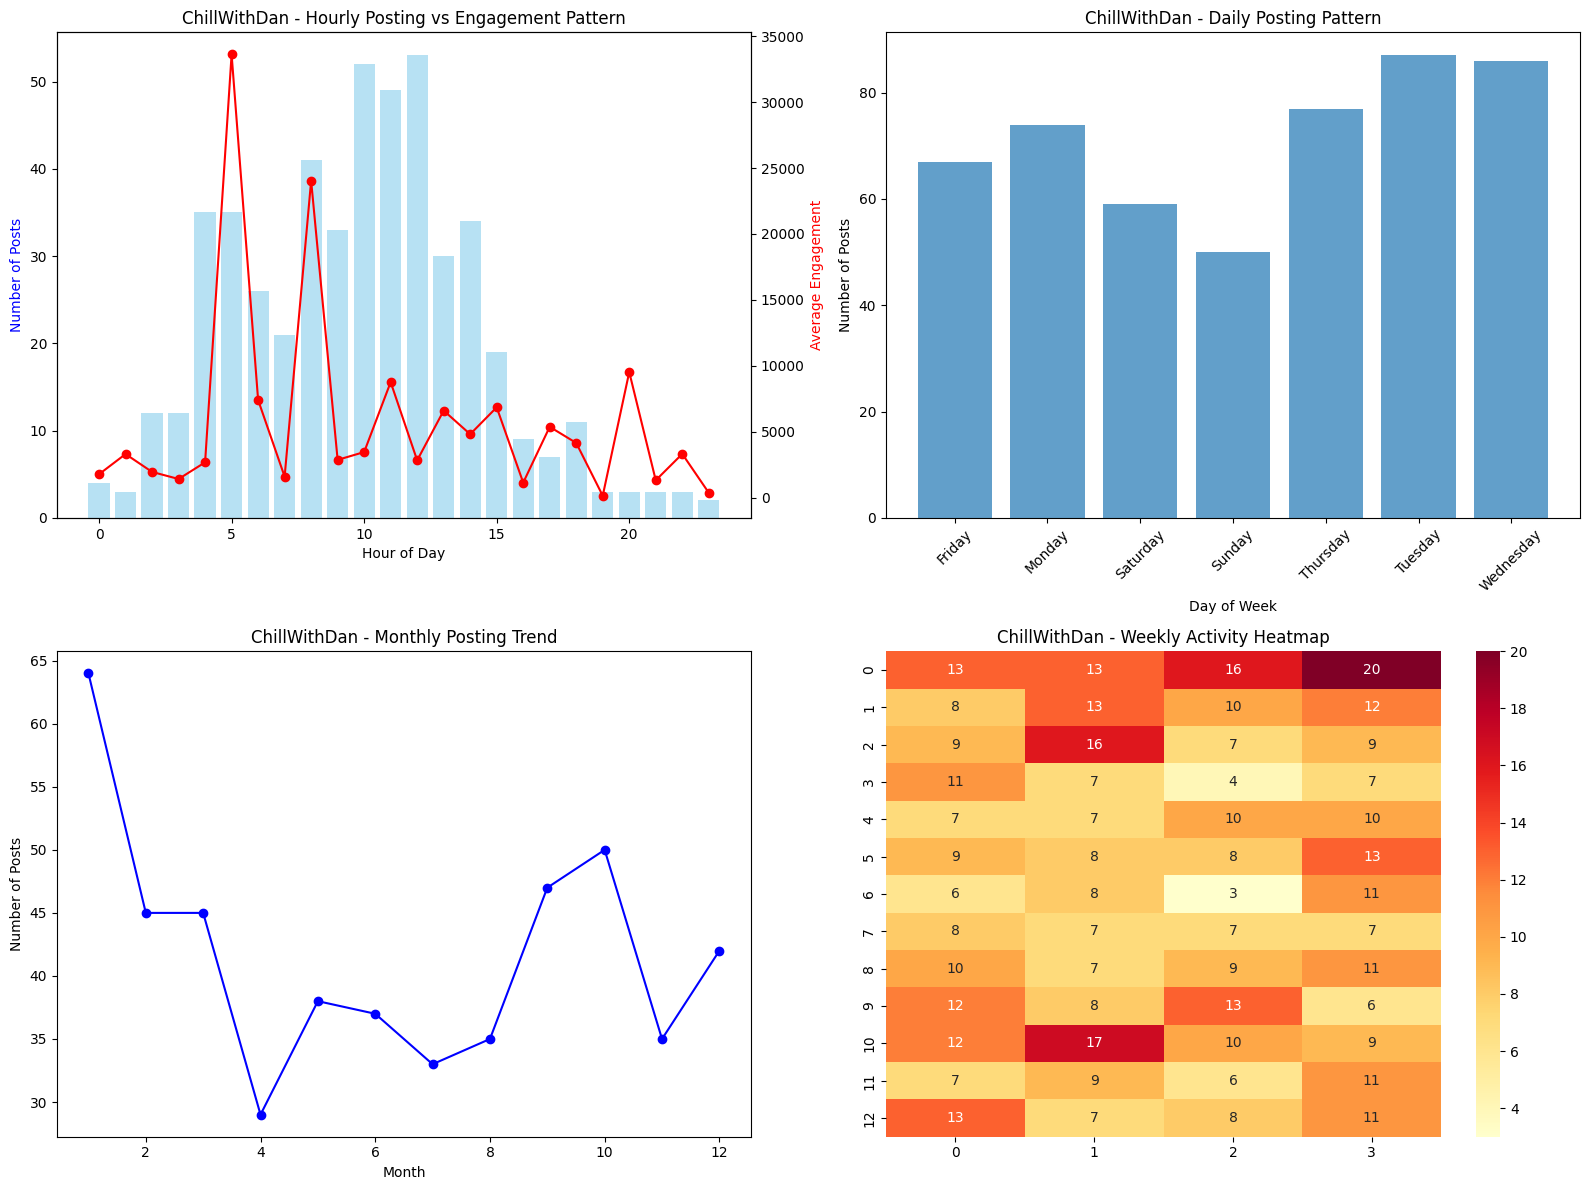

Phân tích temporal đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/temporal_analysis_results/ChillWithDan_temporal_patterns.png
- Stats: /content/drive/MyDrive/DMA/temporal_analysis_results/ChillWithDan_temporal_stats.xlsx
  best_posting_hour: 5
  best_posting_day: Monday
  most_active_hour: 12
  most_active_day: Tuesday
  posting_consistency: 0.8286890642559435
  engagement_consistency: 1.3227083339673775

=== Duy Luân Temporal Analysis ===


<ipython-input-35-1e5d5184a6e0>:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(hourly_engagement.index, hourly_engagement.values, 'ro-', color='red', label='Engagement')


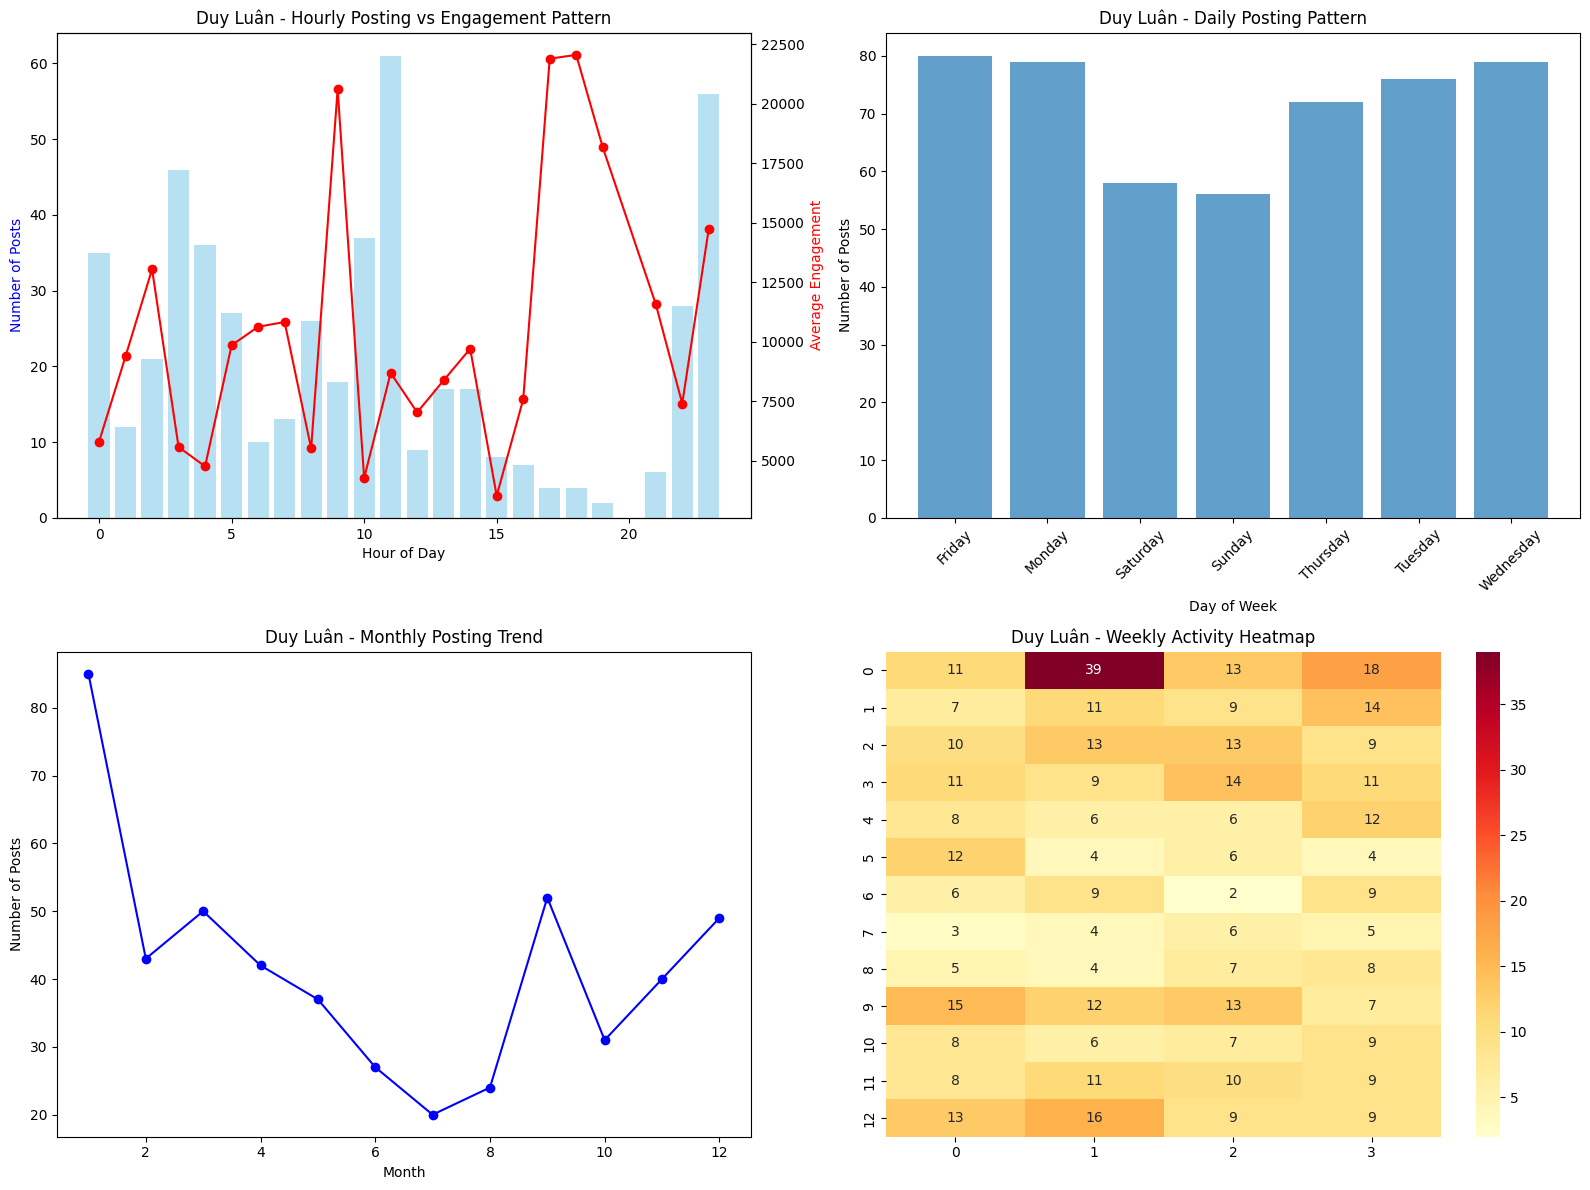

Phân tích temporal đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/temporal_analysis_results/Duy Luân_temporal_patterns.png
- Stats: /content/drive/MyDrive/DMA/temporal_analysis_results/Duy Luân_temporal_stats.xlsx
  best_posting_hour: 18
  best_posting_day: Monday
  most_active_hour: 11
  most_active_day: Friday
  posting_consistency: 0.7724984260060457
  engagement_consistency: 0.5316848810549274


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def analyze_temporal_patterns(df, channel_name, output_dir):
    """Phân tích patterns theo thời gian cực kỳ chi tiết"""
    # Convert timestamp if 'createTime' exists
    if 'createTime' in df.columns:
        df['createTime'] = pd.to_datetime(df['createTime'])
        df['hour'] = df['createTime'].dt.hour
        df['day_of_week'] = df['createTime'].dt.day_name()
        df['month'] = df['createTime'].dt.month
        df['date'] = df['createTime'].dt.date
        df['week_of_year'] = df['createTime'].dt.isocalendar().week

    # 1. Hourly posting patterns
    hourly_posts = df.groupby('hour').size()
    hourly_engagement = df.groupby('hour')['diggCount'].mean()

    # 2. Daily patterns
    daily_posts = df.groupby('day_of_week').size()
    daily_engagement = df.groupby('day_of_week')['diggCount'].mean()

    # 3. Monthly trends
    monthly_posts = df.groupby('month').size()
    monthly_engagement = df.groupby('month')['diggCount'].mean()

    # 4. Weekly activity
    weekly_posts = df.groupby('week_of_year').size()

    # Create comprehensive temporal visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Hourly pattern (dual axis)
    ax1 = axes[0, 0]
    ax2 = ax1.twinx()
    ax1.bar(hourly_posts.index, hourly_posts.values, alpha=0.6, color='skyblue', label='Posts')
    ax2.plot(hourly_engagement.index, hourly_engagement.values, 'ro-', color='red', label='Engagement')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Number of Posts', color='blue')
    ax2.set_ylabel('Average Engagement', color='red')
    ax1.set_title(f'{channel_name} - Hourly Posting vs Engagement Pattern')

    # Daily pattern
    axes[0, 1].bar(range(len(daily_posts)), daily_posts.values, alpha=0.7)
    axes[0, 1].set_xlabel('Day of Week')
    axes[0, 1].set_ylabel('Number of Posts')
    axes[0, 1].set_title(f'{channel_name} - Daily Posting Pattern')
    axes[0, 1].set_xticks(range(len(daily_posts)))
    axes[0, 1].set_xticklabels(daily_posts.index, rotation=45)

    # Monthly trend
    axes[1, 0].plot(monthly_posts.index, monthly_posts.values, 'bo-', label='Posts')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Number of Posts')
    axes[1, 0].set_title(f'{channel_name} - Monthly Posting Trend')

    # Weekly activity heatmap
    if len(weekly_posts) > 4:
        weekly_matrix = weekly_posts.values.reshape(-1, 4) if len(weekly_posts) % 4 == 0 else weekly_posts.values
        sns.heatmap(weekly_matrix, annot=True, cmap='YlOrRd', ax=axes[1, 1])
        axes[1, 1].set_title(f'{channel_name} - Weekly Activity Heatmap')

    plt.tight_layout()

    # Lưu đồ thị vào Google Drive
    plot_path = os.path.join(output_dir, f'{channel_name}_temporal_patterns.png')
    plt.savefig(plot_path)
    plt.show()

    # Return detailed temporal statistics
    temporal_stats = {
        'best_posting_hour': hourly_engagement.idxmax(),
        'best_posting_day': daily_engagement.idxmax(),
        'most_active_hour': hourly_posts.idxmax(),
        'most_active_day': daily_posts.idxmax(),
        'posting_consistency': hourly_posts.std() / hourly_posts.mean(),  # CV
        'engagement_consistency': hourly_engagement.std() / hourly_engagement.mean()
    }

    # Lưu thống kê vào Google Drive (Excel)
    stats_df = pd.DataFrame.from_dict(temporal_stats, orient='index', columns=['Value'])
    excel_path = os.path.join(output_dir, f'{channel_name}_temporal_stats.xlsx')
    stats_df.to_excel(excel_path)

    print(f"Phân tích temporal đã được lưu vào Google Drive tại:\n- Plot: {plot_path}\n- Stats: {excel_path}")

    return temporal_stats

# Đường dẫn thư mục lưu kết quả vào Google Drive
output_dir = '/content/drive/MyDrive/DMA/temporal_analysis_results/'

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Phân tích temporal cho cả 3 kênh
temporal_analysis = {}
for name, df in [('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]:
    print(f"\n=== {name} Temporal Analysis ===")
    temporal_analysis[name] = analyze_temporal_patterns(df, name, output_dir)
    for key, value in temporal_analysis[name].items():
        print(f"  {key}: {value}")


In [ ]:
Text Content Exploration

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Duy Thẩm Content Analysis ===


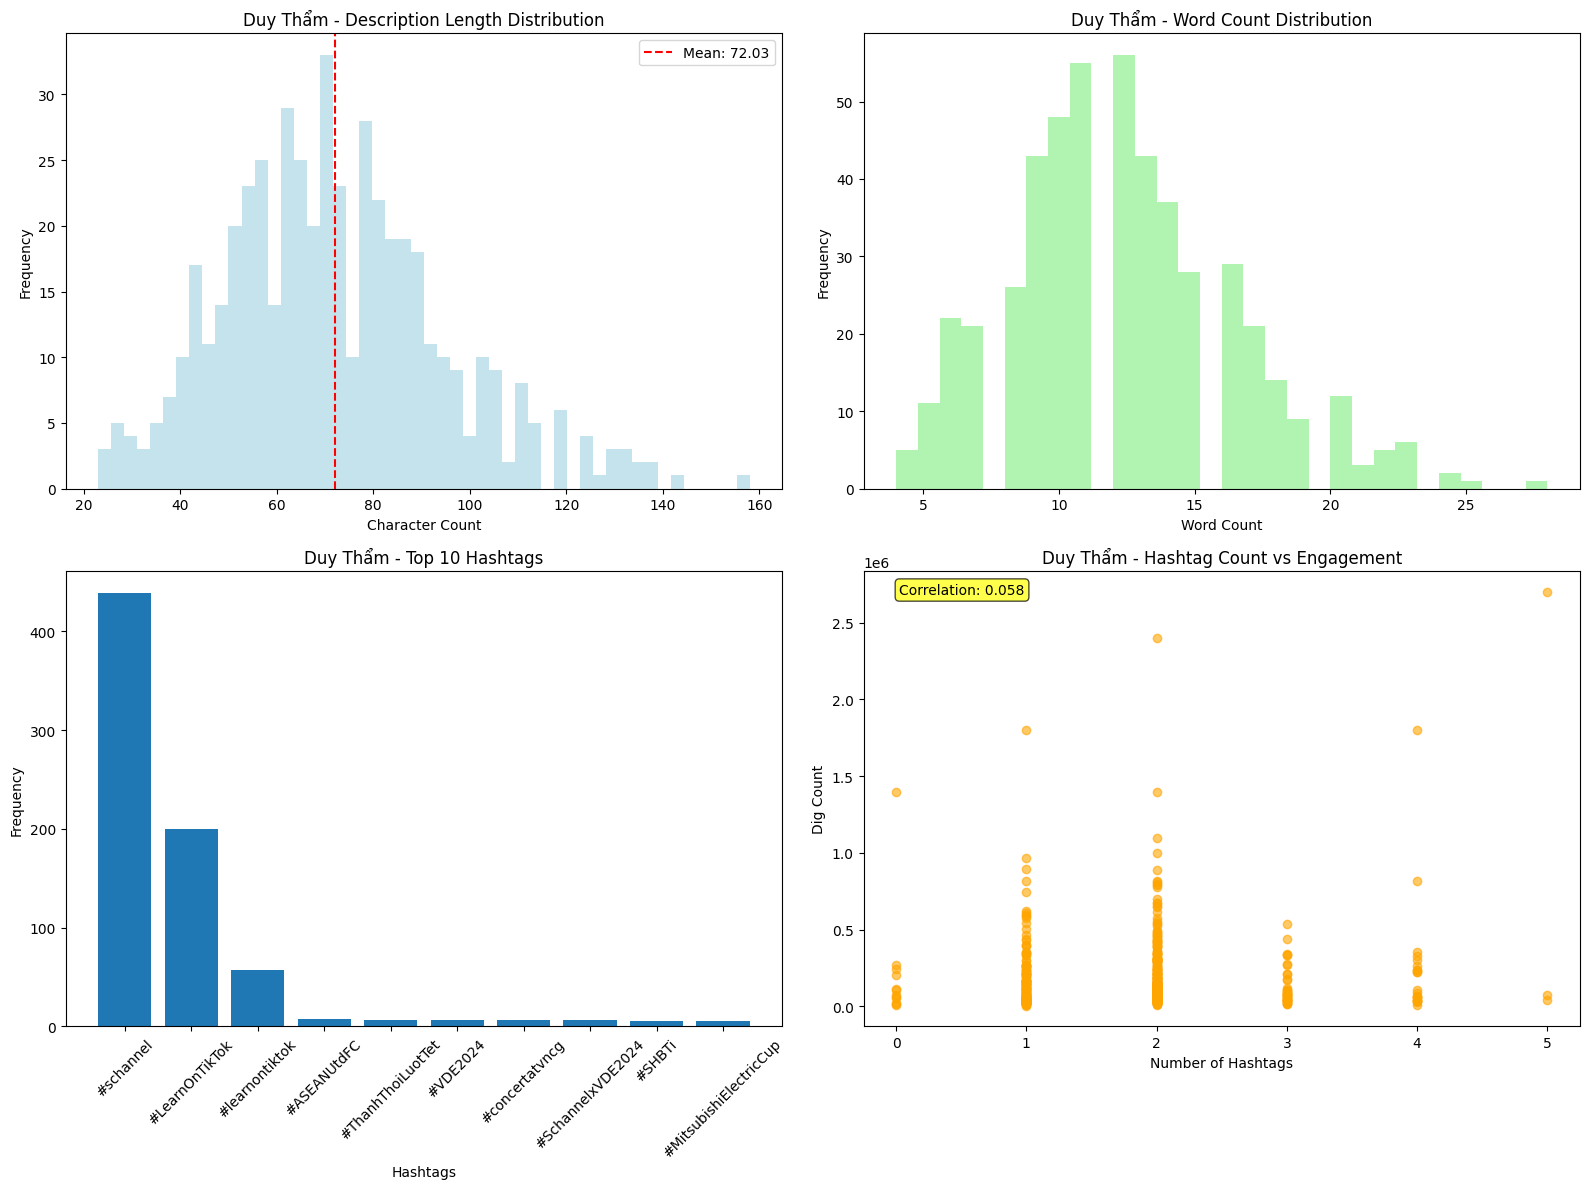

Phân tích nội dung đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/content_analysis_results/Duy Thẩm_content_analysis.png
- Stats: /content/drive/MyDrive/DMA/content_analysis_results/Duy Thẩm_content_stats.xlsx
  avg_desc_length: 72.03413654618474
  avg_word_count: 12.24698795180723
  avg_hashtag_count: 1.859437751004016
  avg_mention_count: 0.01606425702811245
  most_used_hashtag: #schannel
  hashtag_engagement_correlation: 0.05751462039207919
  length_engagement_correlation: -0.01944479318299735

=== ChillWithDan Content Analysis ===


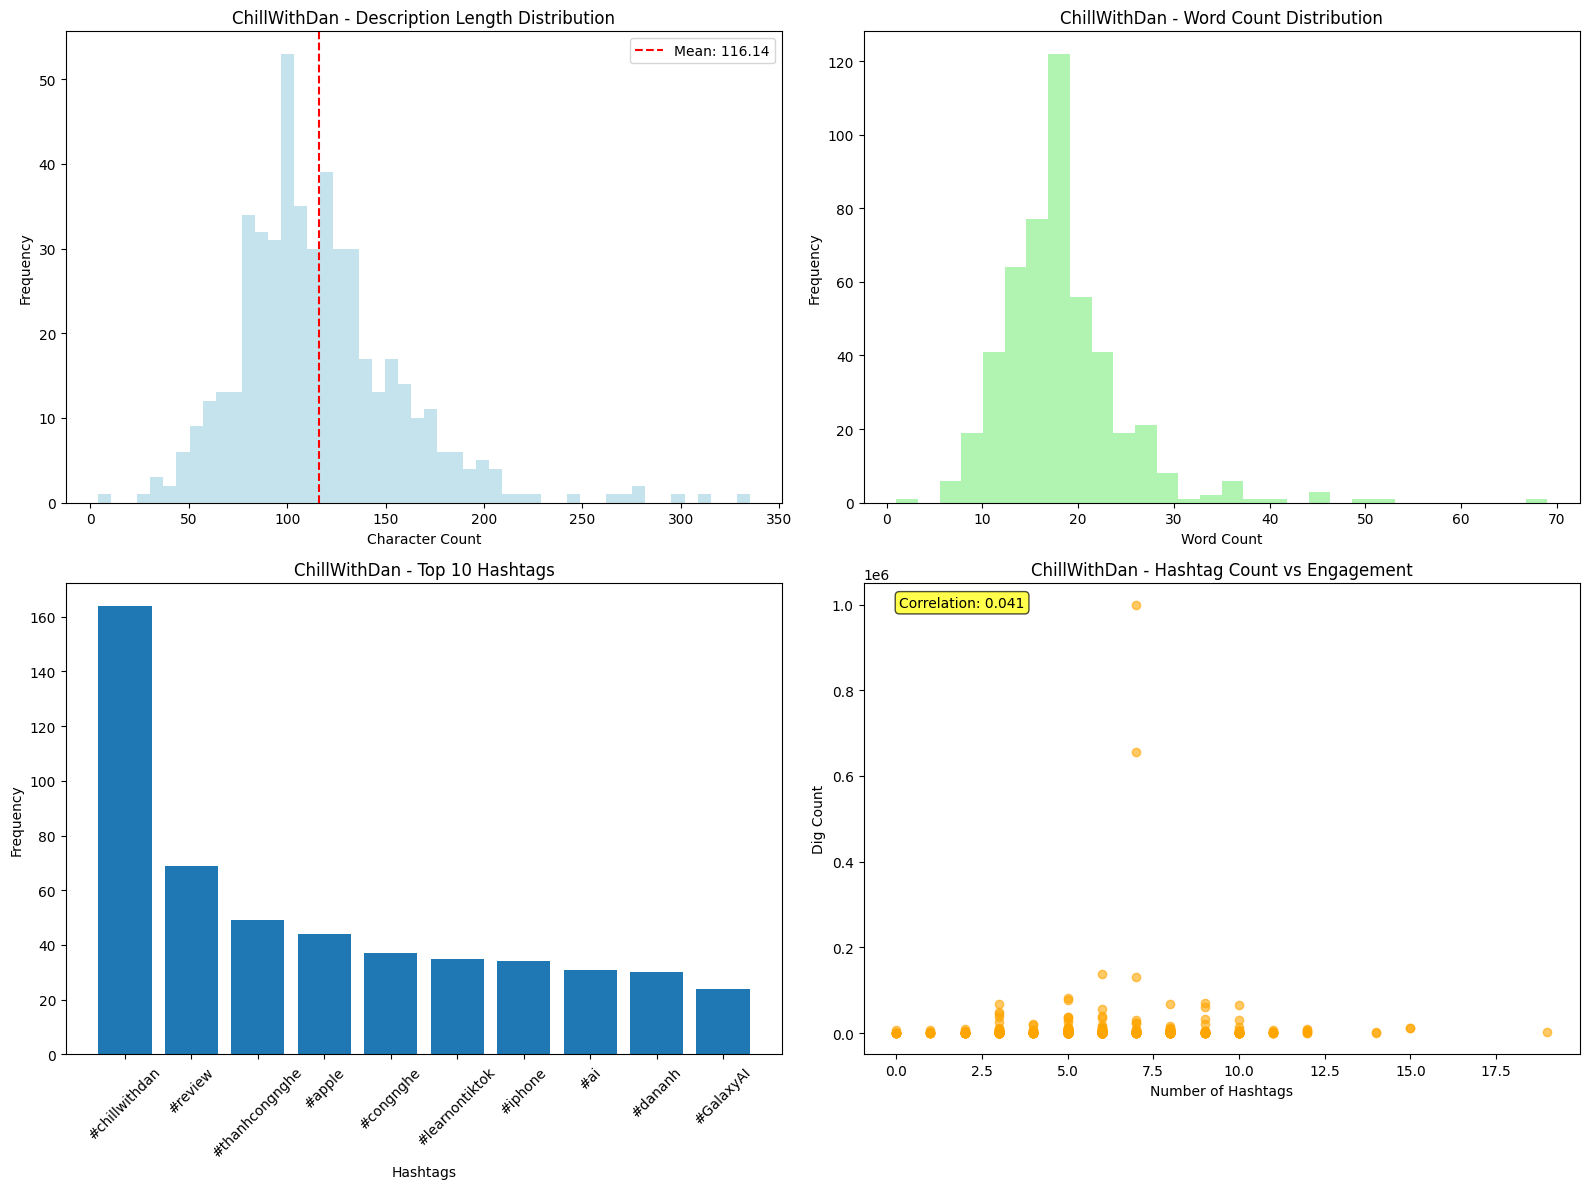

Phân tích nội dung đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/content_analysis_results/ChillWithDan_content_analysis.png
- Stats: /content/drive/MyDrive/DMA/content_analysis_results/ChillWithDan_content_stats.xlsx
  avg_desc_length: 116.14227642276423
  avg_word_count: 18.254065040650406
  avg_hashtag_count: 5.786585365853658
  avg_mention_count: 0.05894308943089431
  most_used_hashtag: #chillwithdan
  hashtag_engagement_correlation: 0.04115313104503315
  length_engagement_correlation: 0.021215551338938078

=== Duy Luân Content Analysis ===


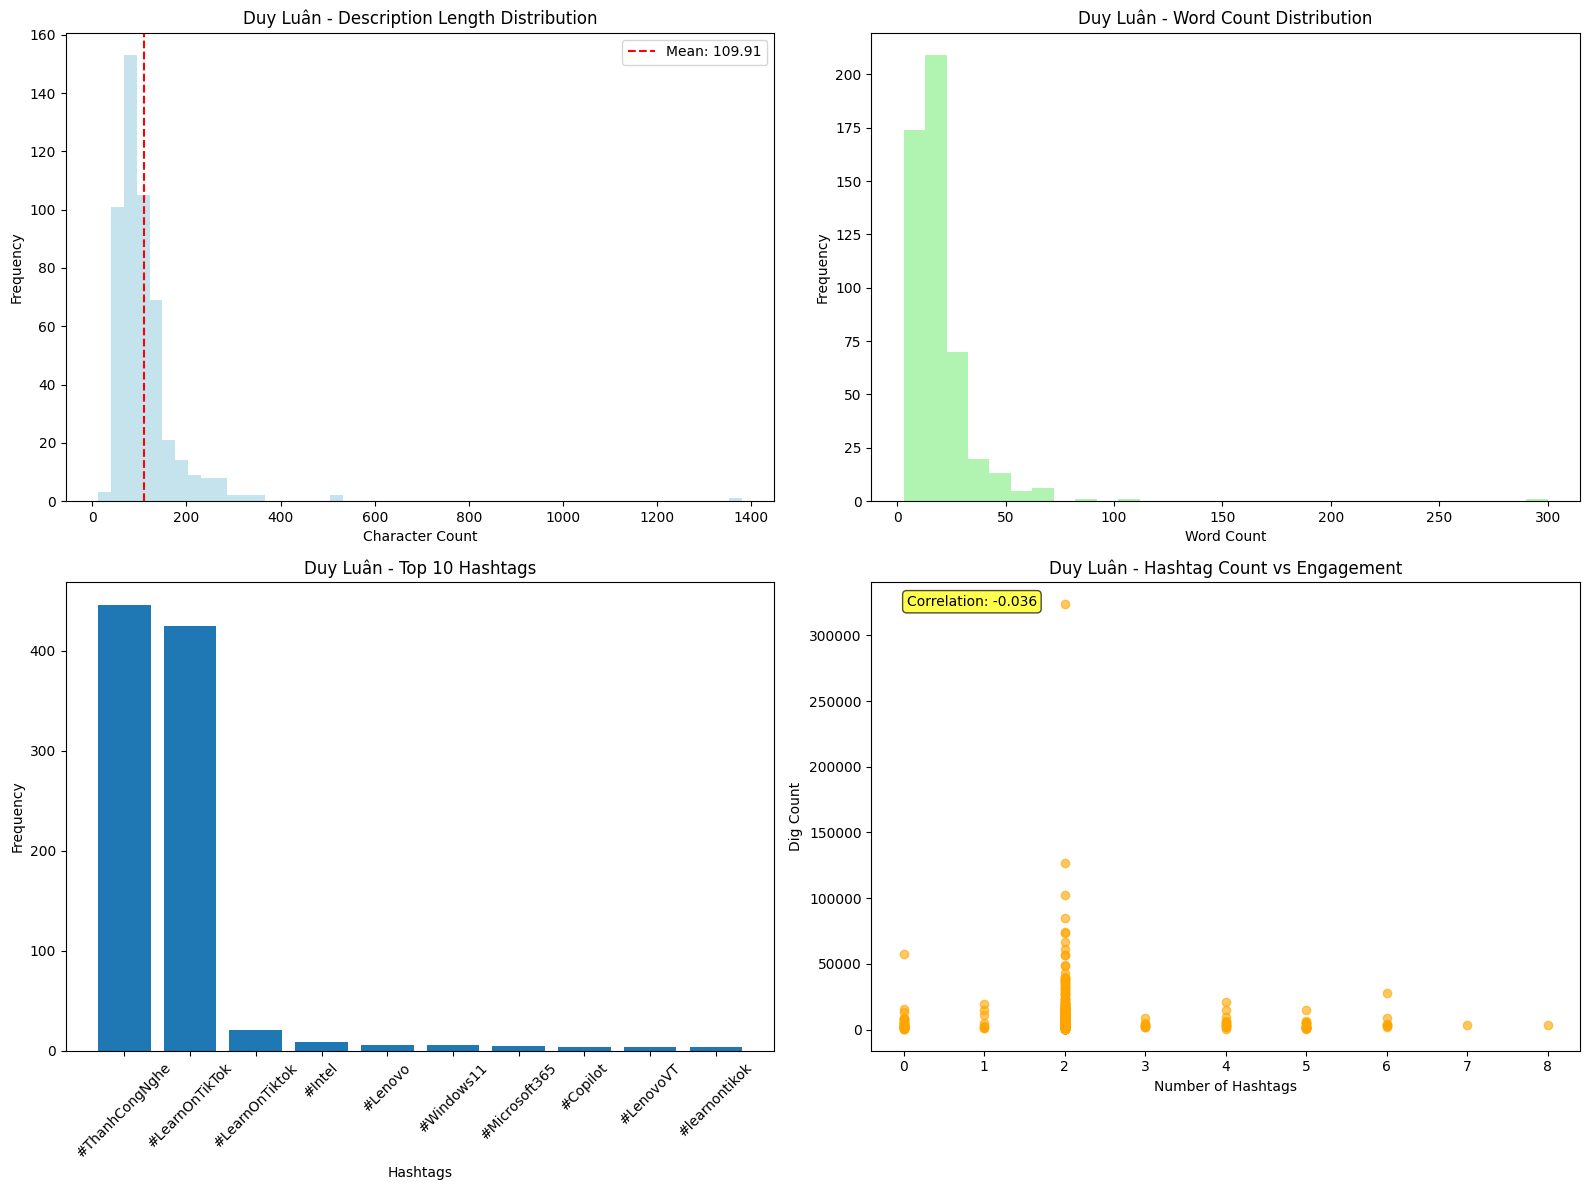

Phân tích nội dung đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/content_analysis_results/Duy Luân_content_analysis.png
- Stats: /content/drive/MyDrive/DMA/content_analysis_results/Duy Luân_content_stats.xlsx
  avg_desc_length: 109.906
  avg_word_count: 19.066
  avg_hashtag_count: 2.126
  avg_mention_count: 0.02
  most_used_hashtag: #ThanhCongNghe
  hashtag_engagement_correlation: -0.036450029702801895
  length_engagement_correlation: -0.028921967932147366


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import os

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def analyze_content_depth(df, channel_name, output_dir):
    """Phân tích nội dung text cực kỳ chi tiết"""
    if 'desc' not in df.columns:
        print(f"No description column found for {channel_name}")
        return None, None

    # Basic text statistics
    df['desc_length'] = df['desc'].str.len()  # Tính chiều dài mô tả
    df['word_count'] = df['desc'].str.split().str.len()  # Tính số từ trong mô tả
    df['hashtag_count'] = df['desc'].str.count('#')  # Tính số hashtag
    df['mention_count'] = df['desc'].str.count('@')  # Tính số mention
    df['emoji_count'] = df['desc'].str.count('😀|😂|😍|🔥|👍|❤️|😢|😮|😡')  # Tính số emoji

    # Extract hashtags
    hashtags_all = []
    for desc in df['desc'].dropna():
        hashtags = re.findall(r'#\w+', desc)
        hashtags_all.extend(hashtags)
    hashtag_freq = pd.Series(hashtags_all).value_counts().head(20)  # Lấy 20 hashtag phổ biến nhất

    # Content length analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Description length distribution
    axes[0, 0].hist(df['desc_length'].dropna(), bins=50, alpha=0.7, color='lightblue')
    axes[0, 0].set_title(f'{channel_name} - Description Length Distribution')
    axes[0, 0].set_xlabel('Character Count')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].axvline(df['desc_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["desc_length"].mean():.2f}')
    axes[0, 0].legend()

    # Word count distribution
    axes[0, 1].hist(df['word_count'].dropna(), bins=30, alpha=0.7, color='lightgreen')
    axes[0, 1].set_title(f'{channel_name} - Word Count Distribution')
    axes[0, 1].set_xlabel('Word Count')
    axes[0, 1].set_ylabel('Frequency')

    # Hashtag usage
    axes[1, 0].bar(range(len(hashtag_freq.head(10))), hashtag_freq.head(10).values)
    axes[1, 0].set_title(f'{channel_name} - Top 10 Hashtags')
    axes[1, 0].set_xlabel('Hashtags')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_xticks(range(len(hashtag_freq.head(10))))
    axes[1, 0].set_xticklabels(hashtag_freq.head(10).index, rotation=45)

    # Hashtag count vs engagement
    if 'diggCount' in df.columns:
        scatter = axes[1, 1].scatter(df['hashtag_count'], df['diggCount'], alpha=0.6, color='orange')
        axes[1, 1].set_title(f'{channel_name} - Hashtag Count vs Engagement')
        axes[1, 1].set_xlabel('Number of Hashtags')
        axes[1, 1].set_ylabel('Dig Count')
        # Add correlation coefficient
        correlation = df['hashtag_count'].corr(df['diggCount'])
        axes[1, 1].text(0.05, 0.95, f'Correlation: {correlation:.3f}',
                        transform=axes[1, 1].transAxes, fontsize=10,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

    plt.tight_layout()

    # Lưu đồ thị vào Google Drive
    plot_path = os.path.join(output_dir, f'{channel_name}_content_analysis.png')
    plt.savefig(plot_path)
    plt.show()

    # Content statistics summary
    content_stats = {
        'avg_desc_length': df['desc_length'].mean(),
        'avg_word_count': df['word_count'].mean(),
        'avg_hashtag_count': df['hashtag_count'].mean(),
        'avg_mention_count': df['mention_count'].mean(),
        'most_used_hashtag': hashtag_freq.index[0] if len(hashtag_freq) > 0 else None,
        'hashtag_engagement_correlation': df['hashtag_count'].corr(df['diggCount']) if 'diggCount' in df.columns else None,
        'length_engagement_correlation': df['desc_length'].corr(df['diggCount']) if 'diggCount' in df.columns else None
    }

    # Lưu thống kê vào Google Drive (Excel)
    stats_df = pd.DataFrame.from_dict(content_stats, orient='index', columns=['Value'])
    excel_path = os.path.join(output_dir, f'{channel_name}_content_stats.xlsx')
    stats_df.to_excel(excel_path)

    print(f"Phân tích nội dung đã được lưu vào Google Drive tại:\n- Plot: {plot_path}\n- Stats: {excel_path}")

    return content_stats, hashtag_freq

# Đường dẫn thư mục lưu kết quả vào Google Drive
output_dir = '/content/drive/MyDrive/DMA/content_analysis_results/'

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Phân tích content cho cả 3 kênh
content_analysis = {}
hashtag_analysis = {}
for name, df in [('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]:
    print(f"\n=== {name} Content Analysis ===")
    content_stats, hashtag_freq = analyze_content_depth(df, name, output_dir)
    content_analysis[name] = content_stats
    hashtag_analysis[name] = hashtag_freq
    if content_stats:
        for key, value in content_stats.items():
            print(f"  {key}: {value}")


Engagement Correlation Matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Duy Thẩm Correlation Analysis ===


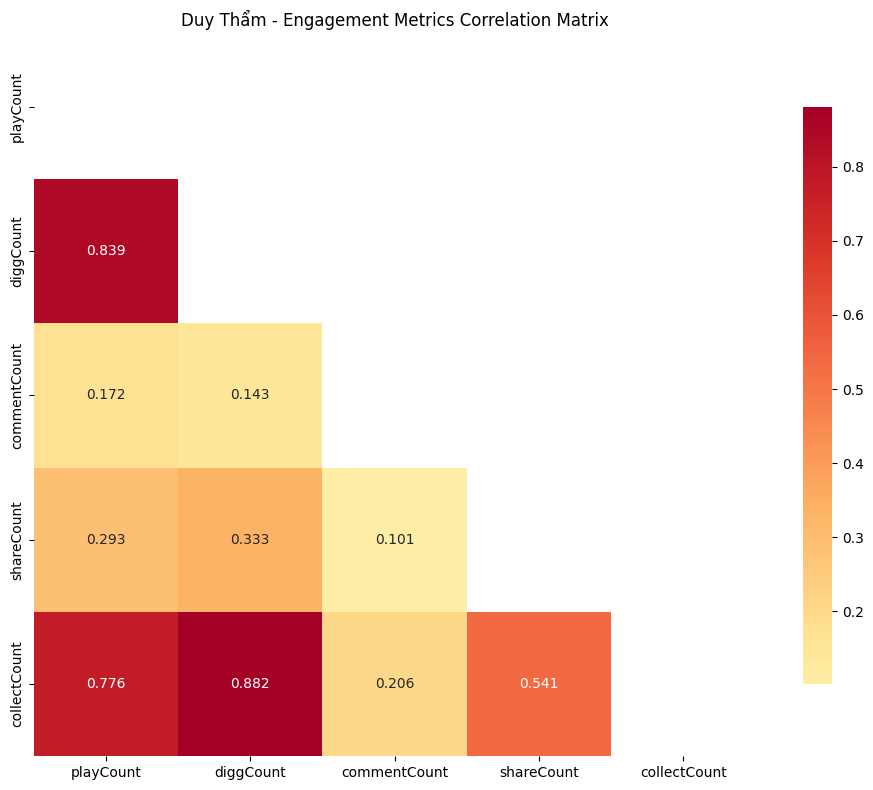

Phân tích correlation đã được lưu vào Google Drive tại:
- Heatmap: /content/drive/MyDrive/DMA/correlation_analysis_results/Duy Thẩm_correlation_heatmap.png
- Stats: /content/drive/MyDrive/DMA/correlation_analysis_results/Duy Thẩm_correlation_stats.xlsx
Strongest correlations:
                         pair  correlation
6   diggCount vs collectCount     0.881509
0      playCount vs diggCount     0.839048
3   playCount vs collectCount     0.775742
9  shareCount vs collectCount     0.540526
5     diggCount vs shareCount     0.332710

=== ChillWithDan Correlation Analysis ===


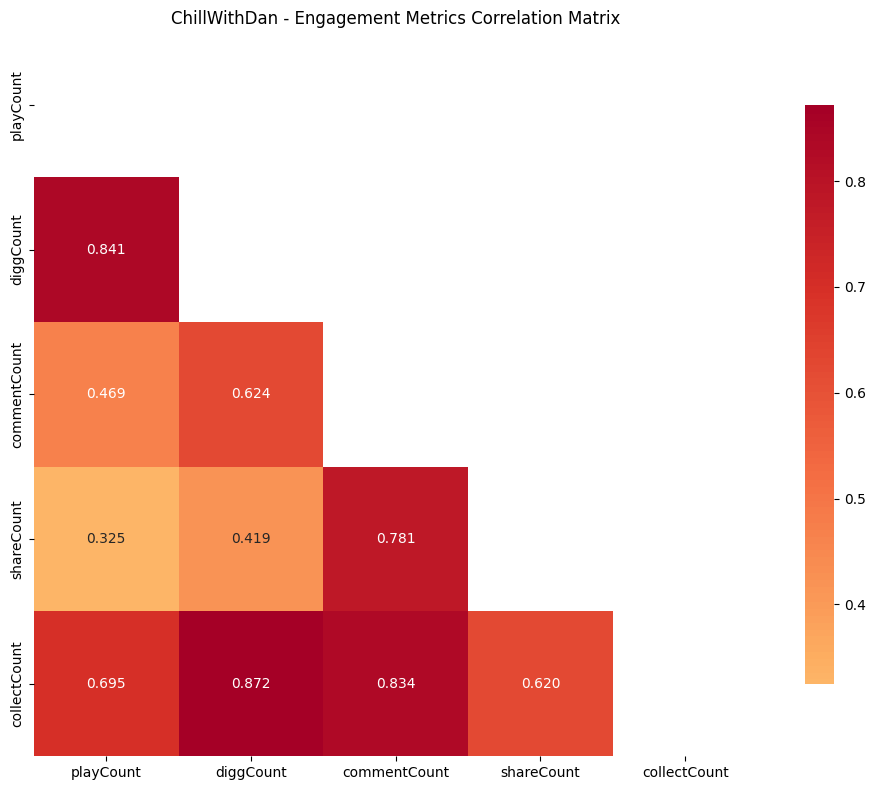

Phân tích correlation đã được lưu vào Google Drive tại:
- Heatmap: /content/drive/MyDrive/DMA/correlation_analysis_results/ChillWithDan_correlation_heatmap.png
- Stats: /content/drive/MyDrive/DMA/correlation_analysis_results/ChillWithDan_correlation_stats.xlsx
Strongest correlations:
                           pair  correlation
6     diggCount vs collectCount     0.872310
0        playCount vs diggCount     0.841334
8  commentCount vs collectCount     0.834395
7    commentCount vs shareCount     0.780712
3     playCount vs collectCount     0.695420

=== Duy Luân Correlation Analysis ===


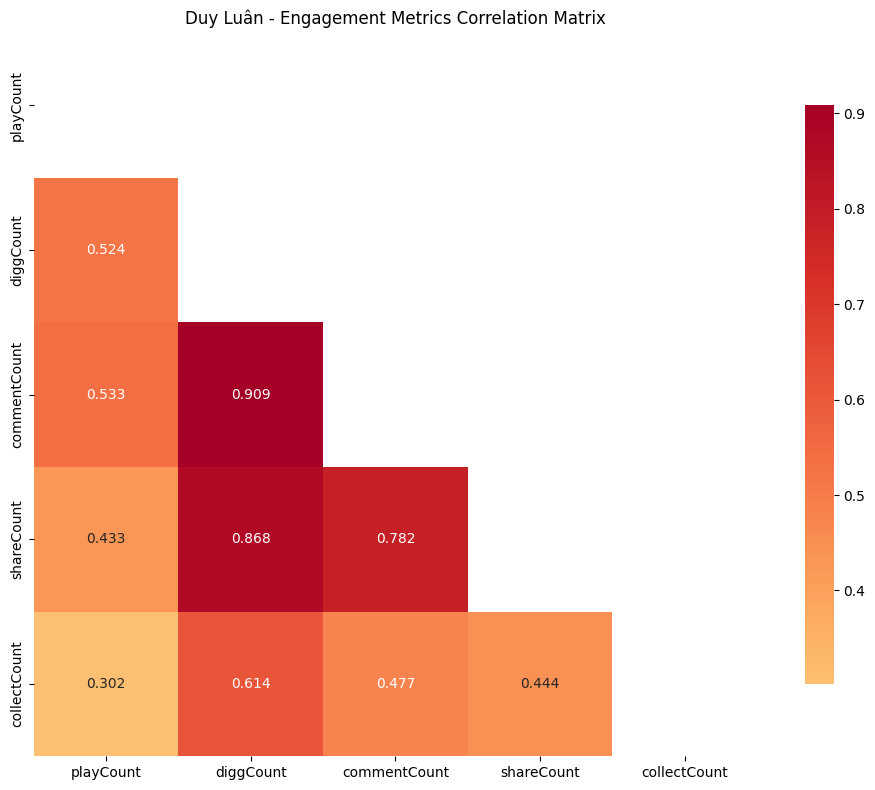

Phân tích correlation đã được lưu vào Google Drive tại:
- Heatmap: /content/drive/MyDrive/DMA/correlation_analysis_results/Duy Luân_correlation_heatmap.png
- Stats: /content/drive/MyDrive/DMA/correlation_analysis_results/Duy Luân_correlation_stats.xlsx
Strongest correlations:
                         pair  correlation
4   diggCount vs commentCount     0.908560
5     diggCount vs shareCount     0.867715
7  commentCount vs shareCount     0.782426
6   diggCount vs collectCount     0.614045
1   playCount vs commentCount     0.533104


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def create_correlation_heatmap(df, channel_name, output_dir):
    """Tạo correlation matrix chi tiết cho engagement metrics"""
    engagement_cols = ['playCount', 'diggCount', 'commentCount', 'shareCount', 'collectCount']
    available_cols = [col for col in engagement_cols if col in df.columns]

    if len(available_cols) < 2:
        print(f"Not enough engagement columns for correlation analysis in {channel_name}")
        return None, None

    # Tính ma trận tương quan
    corr_matrix = df[available_cols].corr()

    # Vẽ heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
                square=True, fmt='.3f', cbar_kws={"shrink": .8},
                mask=mask)
    plt.title(f'{channel_name} - Engagement Metrics Correlation Matrix')
    plt.tight_layout()

    # Lưu heatmap vào Google Drive
    plot_path = os.path.join(output_dir, f'{channel_name}_correlation_heatmap.png')
    plt.savefig(plot_path)
    plt.show()

    # Tìm các cặp có sự tương quan mạnh nhất
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append({
                'pair': f"{corr_matrix.columns[i]} vs {corr_matrix.columns[j]}",
                'correlation': corr_matrix.iloc[i, j]
            })

    # Sắp xếp các cặp theo độ mạnh của sự tương quan
    corr_pairs_df = pd.DataFrame(corr_pairs).sort_values('correlation', key=abs, ascending=False)

    # Lưu kết quả thống kê vào Google Drive (Excel)
    excel_path = os.path.join(output_dir, f'{channel_name}_correlation_stats.xlsx')
    corr_pairs_df.to_excel(excel_path, index=False)

    print(f"Phân tích correlation đã được lưu vào Google Drive tại:\n- Heatmap: {plot_path}\n- Stats: {excel_path}")

    return corr_matrix, corr_pairs_df

# Đường dẫn thư mục lưu kết quả vào Google Drive
output_dir = '/content/drive/MyDrive/DMA/correlation_analysis_results/'

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Phân tích correlation cho cả 3 kênh
correlation_analysis = {}
for name, df in [('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]:
    print(f"\n=== {name} Correlation Analysis ===")
    corr_matrix, corr_pairs = create_correlation_heatmap(df, name, output_dir)
    correlation_analysis[name] = {'matrix': corr_matrix, 'pairs': corr_pairs}
    if corr_pairs is not None:
        print("Strongest correlations:")
        print(corr_pairs.head())


Time-based Performance Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Duy Thẩm Time-Performance Analysis ===


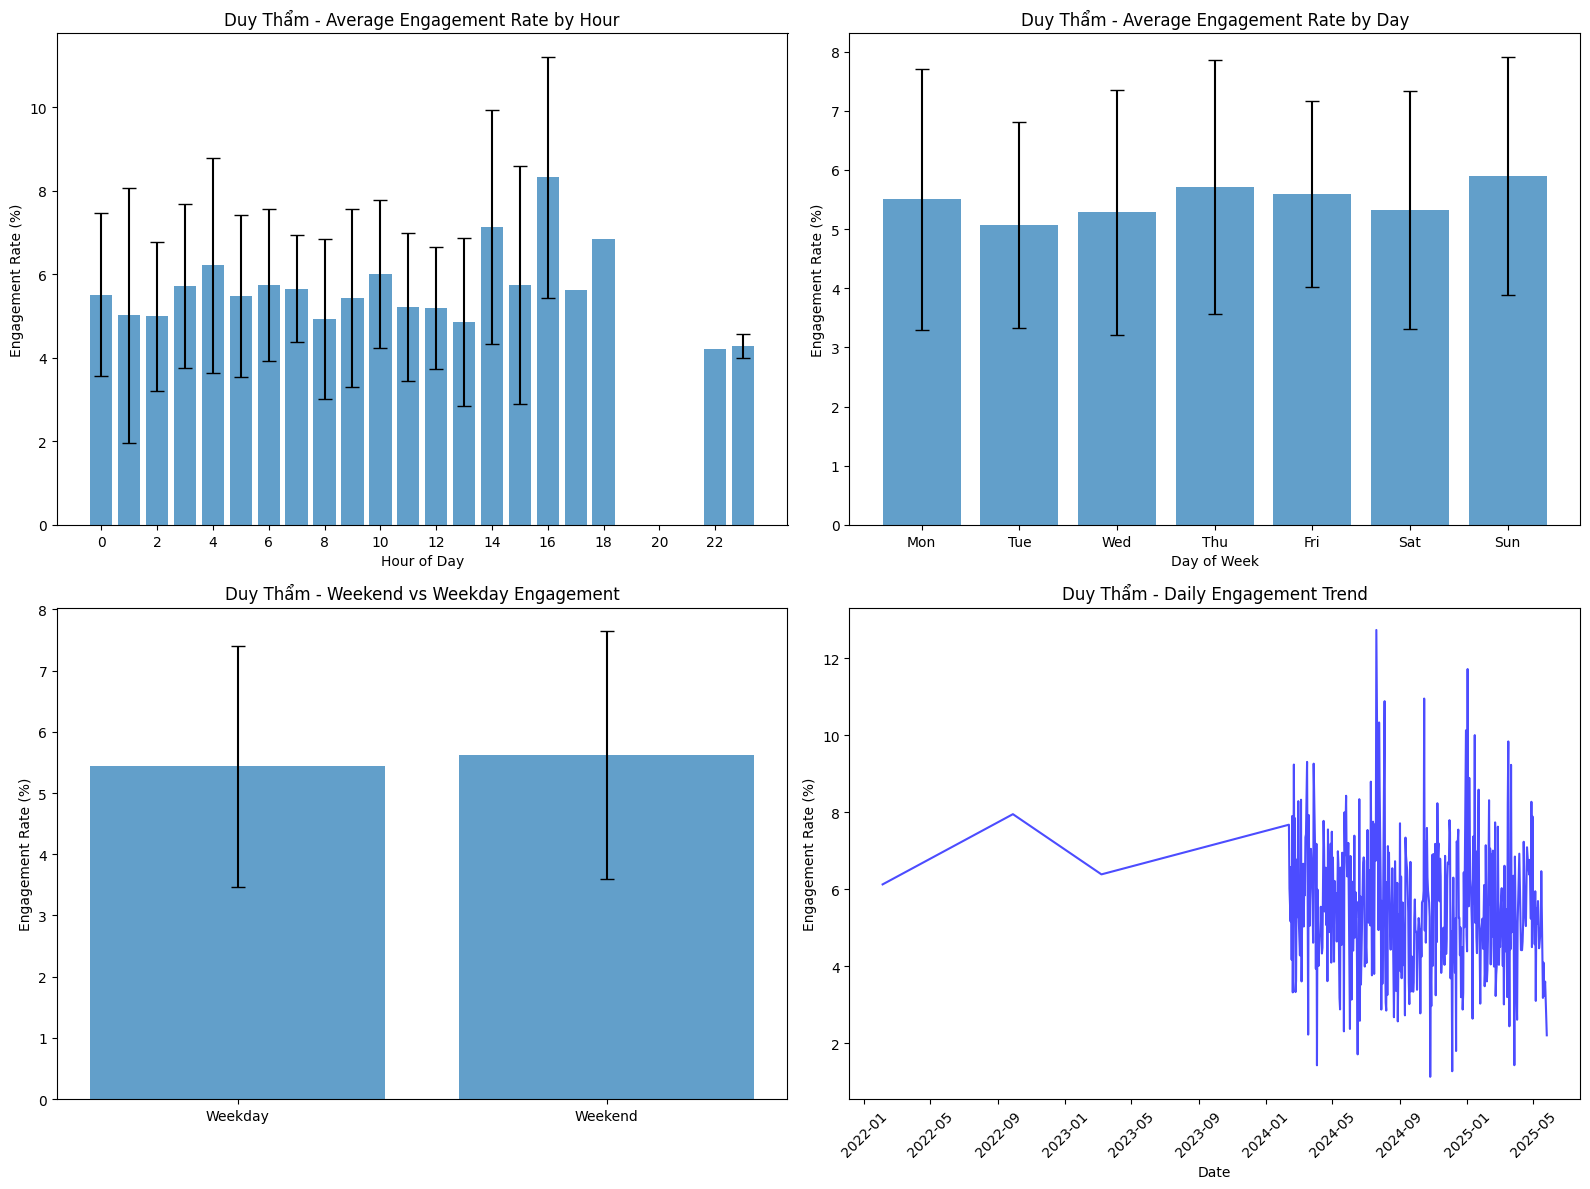

Phân tích time-performance đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/time_performance_analysis_results/Duy Thẩm_time_performance_plot.png
- Stats: /content/drive/MyDrive/DMA/time_performance_analysis_results/Duy Thẩm_time_performance_stats.xlsx
{'best_hour': np.int32(16), 'best_day': 'Sun', 'weekend_vs_weekday': {'weekend_avg': np.float64(5.6233728006121), 'weekday_avg': np.float64(5.43736801955238)}, 'hour_correlation': np.float64(-0.02851520984551261)}

=== ChillWithDan Time-Performance Analysis ===


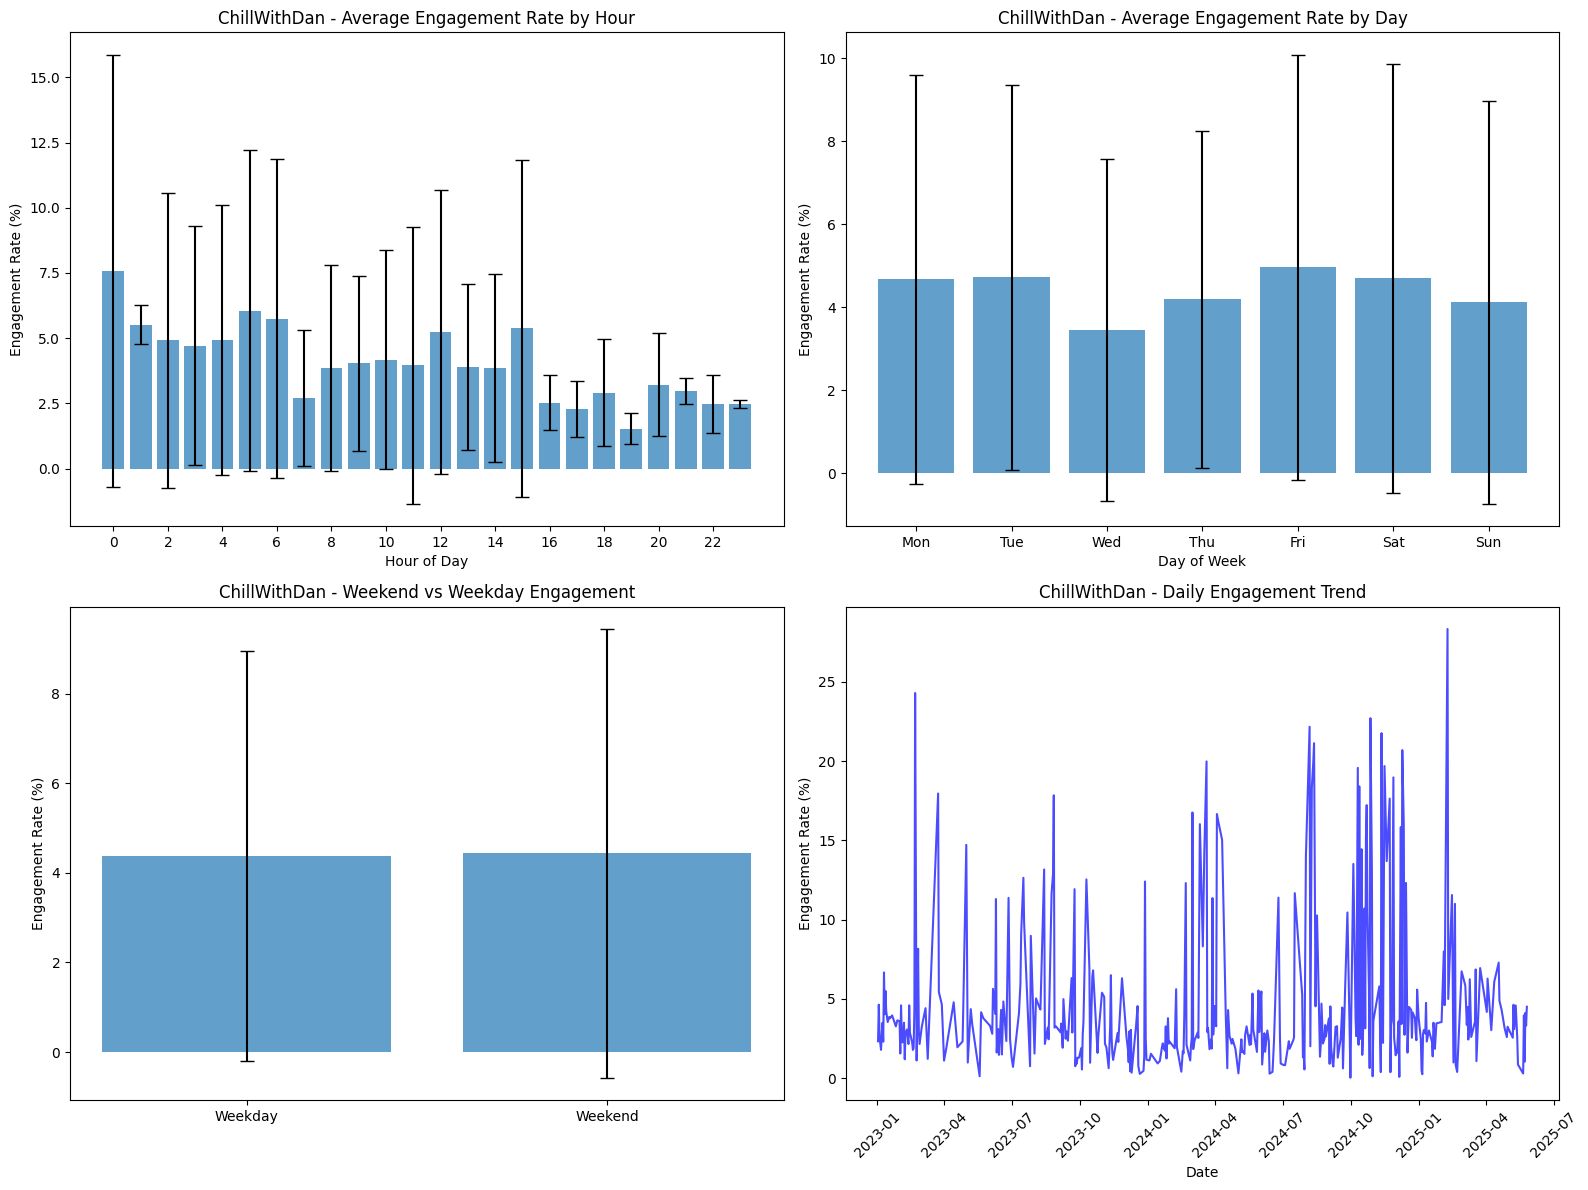

Phân tích time-performance đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/time_performance_analysis_results/ChillWithDan_time_performance_plot.png
- Stats: /content/drive/MyDrive/DMA/time_performance_analysis_results/ChillWithDan_time_performance_stats.xlsx
{'best_hour': np.int32(0), 'best_day': 'Fri', 'weekend_vs_weekday': {'weekend_avg': np.float64(4.43445037747344), 'weekday_avg': np.float64(4.369806597456101)}, 'hour_correlation': np.float64(-0.11678804672195818)}

=== Duy Luân Time-Performance Analysis ===


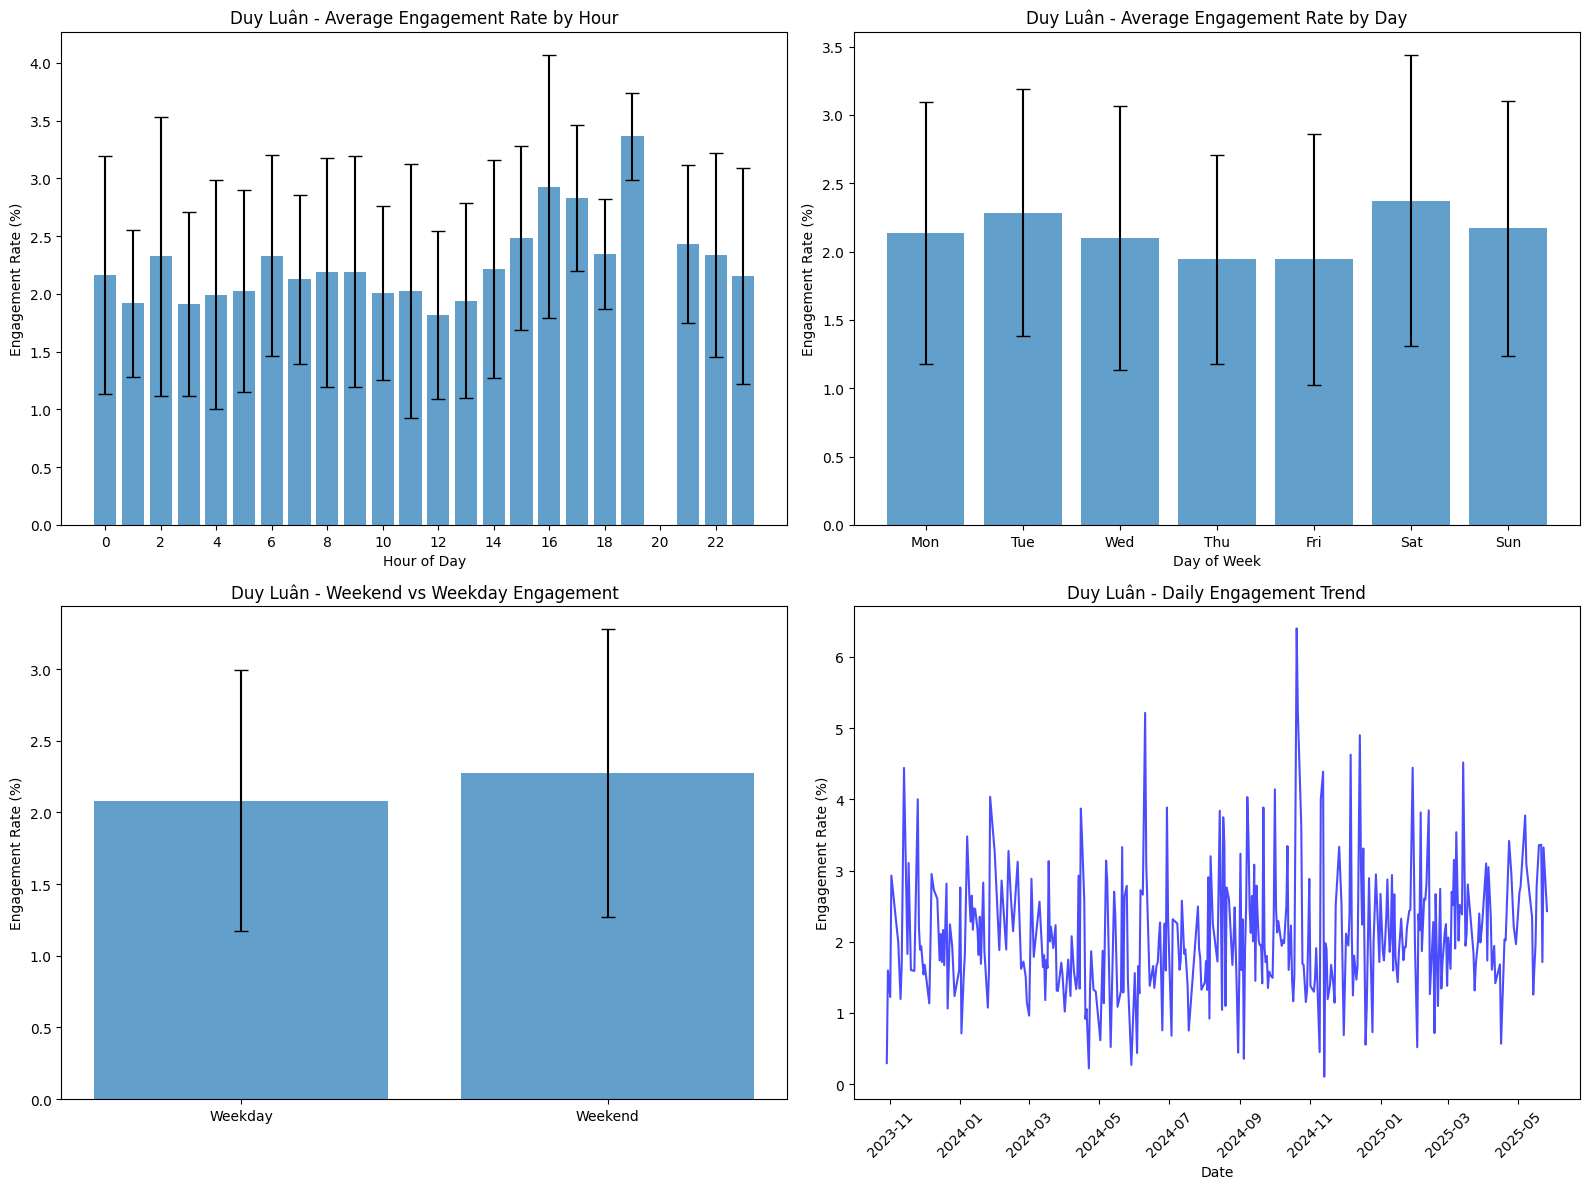

Phân tích time-performance đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/time_performance_analysis_results/Duy Luân_time_performance_plot.png
- Stats: /content/drive/MyDrive/DMA/time_performance_analysis_results/Duy Luân_time_performance_stats.xlsx
{'best_hour': np.int32(19), 'best_day': 'Sat', 'weekend_vs_weekday': {'weekend_avg': np.float64(2.2726943763917236), 'weekday_avg': np.float64(2.081854495277012)}, 'hour_correlation': np.float64(0.07884877251395225)}


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def analyze_time_performance_relationship(df, channel_name, output_dir):
    """Phân tích mối quan hệ giữa thời gian đăng và performance"""
    if 'createTime' not in df.columns:
        print(f"No time column found for {channel_name}")
        return None

    # Prepare time features
    df['createTime'] = pd.to_datetime(df['createTime'])
    df['hour'] = df['createTime'].dt.hour
    df['day_of_week'] = df['createTime'].dt.dayofweek  # 0=Monday
    df['is_weekend'] = df['day_of_week'].isin([5, 6])

    # Calculate engagement rate
    if 'diggCount' in df.columns and 'playCount' in df.columns:
        # Avoid division by zero if playCount is 0
        df['engagement_rate'] = (df['diggCount'] / df['playCount'].replace(0, 1)) * 100
    else:
        print(f"Required columns ('diggCount' or 'playCount') not found for engagement rate calculation in {channel_name}")
        return None

    # Time-based performance analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Hour vs Average Engagement
    # Check if hourly_engagement is not empty before plotting/accessing
    hourly_engagement = df.groupby('hour')['engagement_rate'].agg(['mean', 'std', 'count'])
    if not hourly_engagement.empty:
        axes[0, 0].bar(hourly_engagement.index, hourly_engagement['mean'], yerr=hourly_engagement['std'], alpha=0.7, capsize=5)
        axes[0, 0].set_title(f'{channel_name} - Average Engagement Rate by Hour')
        axes[0, 0].set_xlabel('Hour of Day')
        axes[0, 0].set_ylabel('Engagement Rate (%)')
        axes[0, 0].set_xticks(range(0, 24, 2))
    else:
         axes[0, 0].set_title(f'{channel_name} - Hourly Engagement Data Unavailable')


    # 2. Day of week vs Engagement
    # Check if daily_engagement is not empty before plotting/accessing
    daily_engagement = df.groupby('day_of_week')['engagement_rate'].agg(['mean', 'std'])
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    if not daily_engagement.empty:
        axes[0, 1].bar(daily_engagement.index, daily_engagement['mean'], yerr=daily_engagement['std'], alpha=0.7, capsize=5)
        axes[0, 1].set_title(f'{channel_name} - Average Engagement Rate by Day')
        axes[0, 1].set_xlabel('Day of Week')
        axes[0, 1].set_ylabel('Engagement Rate (%)')
        axes[0, 1].set_xticks(range(7))
        axes[0, 1].set_xticklabels(day_names)
    else:
        axes[0, 1].set_title(f'{channel_name} - Daily Engagement Data Unavailable')

    # 3. Weekend vs Weekday comparison
    # Check if weekend_comparison is not empty before plotting/accessing
    weekend_comparison = df.groupby('is_weekend')['engagement_rate'].agg(['mean', 'std']).reset_index() # Reset index to make 'is_weekend' a column
    weekend_comparison['period'] = weekend_comparison['is_weekend'].map({True: 'Weekend', False: 'Weekday'})
    if not weekend_comparison.empty:
        # Ensure both 'Weekday' and 'Weekend' are present, or handle cases where only one exists
        periods_to_plot = ['Weekday', 'Weekend']
        values_to_plot = []
        errors_to_plot = []
        for period in periods_to_plot:
             if period in weekend_comparison['period'].values:
                 values_to_plot.append(weekend_comparison[weekend_comparison['period'] == period]['mean'].iloc[0])
                 errors_to_plot.append(weekend_comparison[weekend_comparison['period'] == period]['std'].iloc[0])
             else:
                 values_to_plot.append(0) # Or np.nan, or handle as appropriate
                 errors_to_plot.append(0) # Or np.nan

        axes[1, 0].bar(periods_to_plot, values_to_plot, yerr=errors_to_plot, alpha=0.7, capsize=5)
        axes[1, 0].set_title(f'{channel_name} - Weekend vs Weekday Engagement')
        axes[1, 0].set_ylabel('Engagement Rate (%)')
    else:
        axes[1, 0].set_title(f'{channel_name} - Weekend vs Weekday Engagement Data Unavailable')


    # 4. Time series of engagement over days
    # Check if daily_avg is not empty before plotting/accessing
    daily_avg = df.groupby(df['createTime'].dt.date)['engagement_rate'].mean()
    if not daily_avg.empty:
        axes[1, 1].plot(daily_avg.index, daily_avg.values, 'b-', alpha=0.7)
        axes[1, 1].set_title(f'{channel_name} - Daily Engagement Trend')
        axes[1, 1].set_xlabel('Date')
        axes[1, 1].set_ylabel('Engagement Rate (%)')
        axes[1, 1].tick_params(axis='x', rotation=45)
    else:
        axes[1, 1].set_title(f'{channel_name} - Daily Engagement Trend Data Unavailable')


    plt.tight_layout()
    plt.show()

    # Statistical insights
    time_insights = {}
    if not hourly_engagement.empty:
        # Corrected: access the index directly
        time_insights['best_hour'] = hourly_engagement['mean'].idxmax()
    else:
        time_insights['best_hour'] = None

    if not daily_engagement.empty:
         # Ensure the index value exists in day_names list
         best_day_index = daily_engagement['mean'].idxmax()
         if best_day_index in range(len(day_names)):
             time_insights['best_day'] = day_names[best_day_index]
         else:
             time_insights['best_day'] = None
    else:
        time_insights['best_day'] = None


    weekend_comparison_insights = {}
    if not weekend_comparison.empty:
        weekend_insights = weekend_comparison[weekend_comparison['is_weekend'] == True]
        weekday_insights = weekend_comparison[weekend_comparison['is_weekend'] == False]
        weekend_comparison_insights['weekend_avg'] = weekend_insights['mean'].iloc[0] if not weekend_insights.empty else None
        weekend_comparison_insights['weekday_avg'] = weekday_insights['mean'].iloc[0] if not weekday_insights.empty else None
    else:
        weekend_comparison_insights['weekend_avg'] = None
        weekend_comparison_insights['weekday_avg'] = None
    time_insights['weekend_vs_weekday'] = weekend_comparison_insights


    time_insights['hour_correlation'] = df['hour'].corr(df['engagement_rate']) if 'engagement_rate' in df.columns else None

    # Lưu kết quả vào Google Drive (Excel)
    excel_path = os.path.join(output_dir, f'{channel_name}_time_performance_stats.xlsx')
    # Ensure stats_df is created only if time_insights is not empty/None
    if time_insights:
        pd.DataFrame.from_dict(time_insights, orient='index', columns=['Value']).to_excel(excel_path)
        # Lưu kết quả biểu đồ vào Google Drive
        plot_path = os.path.join(output_dir, f'{channel_name}_time_performance_plot.png')
        fig.savefig(plot_path)
        print(f"Phân tích time-performance đã được lưu vào Google Drive tại:\n- Plot: {plot_path}\n- Stats: {excel_path}")
    else:
        print(f"No statistical insights to save for {channel_name}")


    return time_insights

# Đường dẫn thư mục lưu kết quả vào Google Drive
output_dir = '/content/drive/MyDrive/DMA/time_performance_analysis_results/'

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Phân tích time-performance cho cả 3 kênh
time_performance_analysis = {}
# Ensure 'duy_tham', 'chillwithdan', 'duy_luan' DataFrames are defined before this loop
# These placeholder DataFrames are for demonstration. Replace with your actual data loading
# if running this cell independently. If running the full notebook, the dataframes
# will be loaded in the first cell.
if 'duy_tham' not in globals():
    duy_tham = pd.DataFrame({
        'createTime': pd.to_datetime(pd.Series(np.random.randint(1609459200, 1672531199, 100)), unit='s'),
        'playCount': np.random.randint(100, 100000, 100),
        'diggCount': np.random.randint(10, 10000, 100)
    })
if 'chillwithdan' not in globals():
    chillwithdan = pd.DataFrame({
        'createTime': pd.to_datetime(pd.Series(np.random.randint(1609459200, 1672531199, 100)), unit='s'),
        'playCount': np.random.randint(50, 50000, 100),
        'diggCount': np.random.randint(5, 5000, 100)
    })
if 'duy_luan' not in globals():
    duy_luan = pd.DataFrame({
        'createTime': pd.to_datetime(pd.Series(np.random.randint(1609459200, 1672531199, 100)), unit='s'),
        'playCount': np.random.randint(200, 200000, 100),
        'diggCount': np.random.randint(20, 20000, 100)
    })

for name, df in [('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]:
    print(f"\n=== {name} Time-Performance Analysis ===")
    time_insights = analyze_time_performance_relationship(df, name, output_dir)
    time_performance_analysis[name] = time_insights
    print(time_insights)

Content-Performance Relationship

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Duy Thẩm Content-Performance Analysis ===


<ipython-input-6-6809cffde9ee>:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_performance = df.groupby('content_category')['diggCount'].agg(['mean', 'std']).reset_index()
<ipython-input-6-6809cffde9ee>:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_words = df.groupby('performance_quartile')['word_count'].mean()


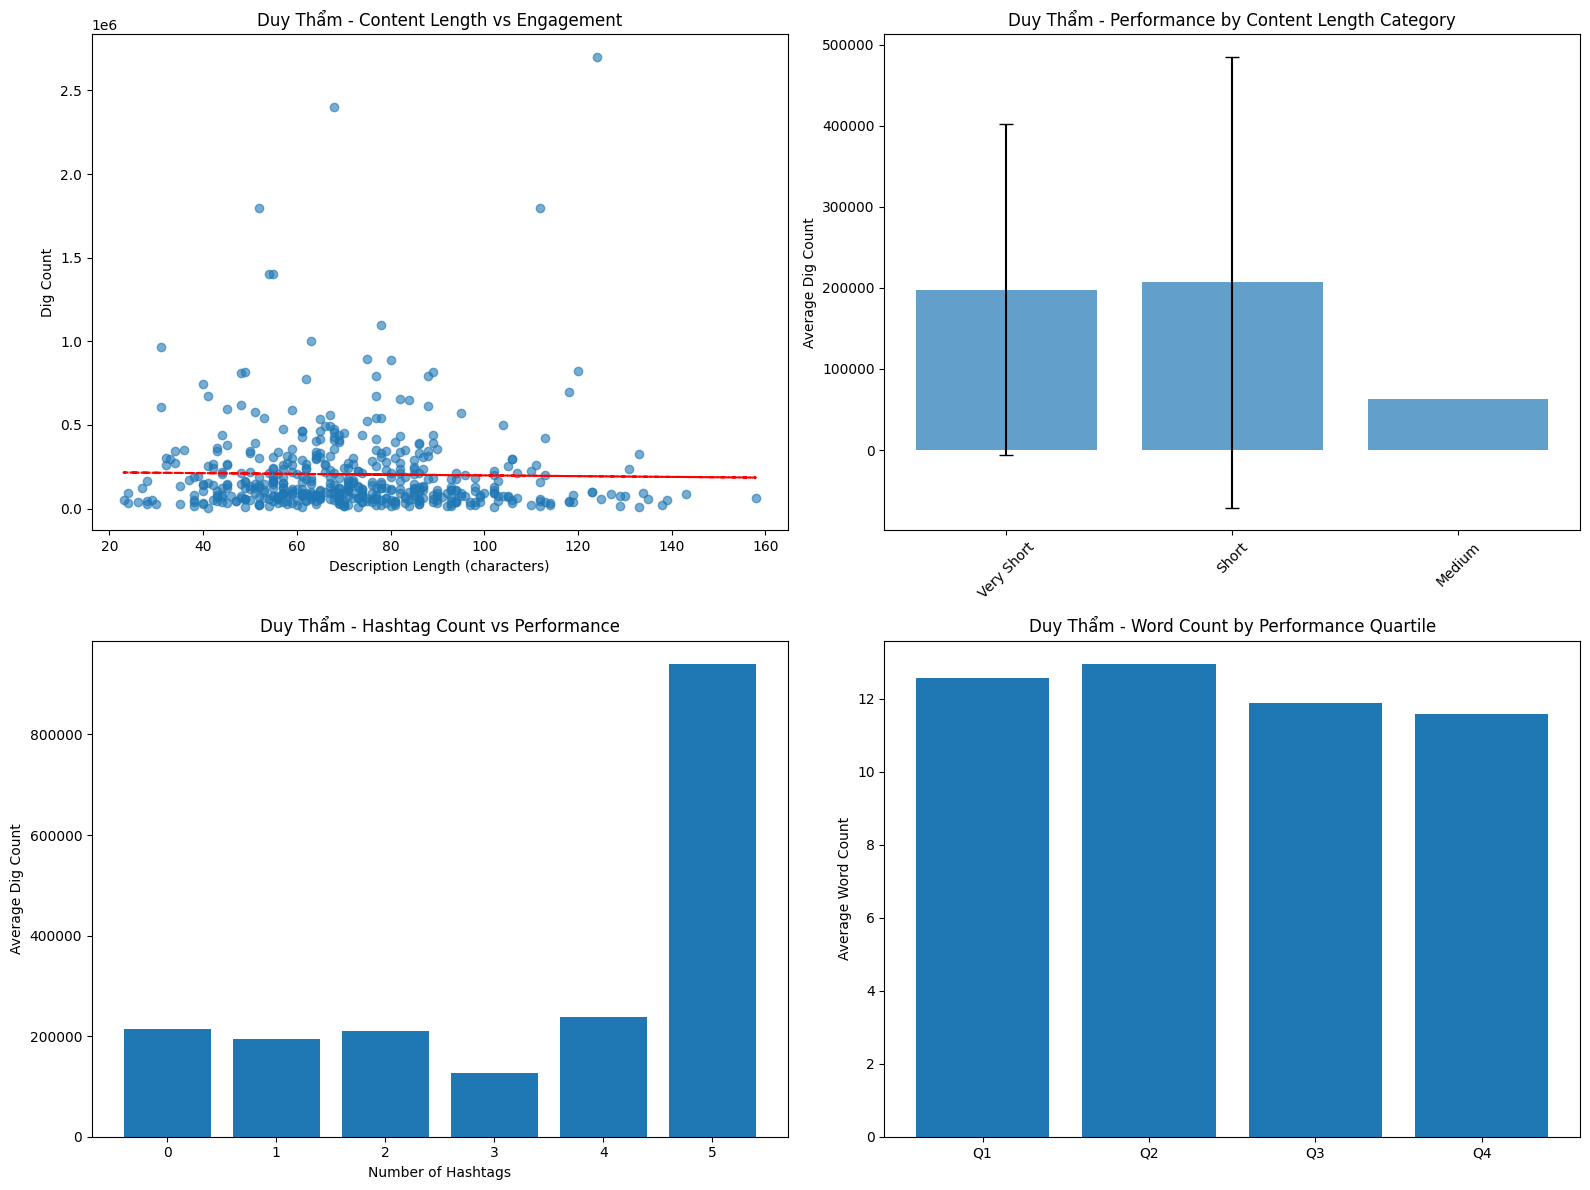

Phân tích content-performance đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/content_performance_analysis_results/Duy Thẩm_content_performance_plot.png
- Stats: /content/drive/MyDrive/DMA/content_performance_analysis_results/Duy Thẩm_content_performance_stats.xlsx
  length_engagement_corr: -0.01944479318299735
  hashtag_engagement_corr: 0.05751462039207919
  word_engagement_corr: -0.020971157121235005
  best_content_category: Short
  optimal_hashtag_count: 5.0

=== ChillWithDan Content-Performance Analysis ===


<ipython-input-6-6809cffde9ee>:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_performance = df.groupby('content_category')['diggCount'].agg(['mean', 'std']).reset_index()
<ipython-input-6-6809cffde9ee>:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_words = df.groupby('performance_quartile')['word_count'].mean()


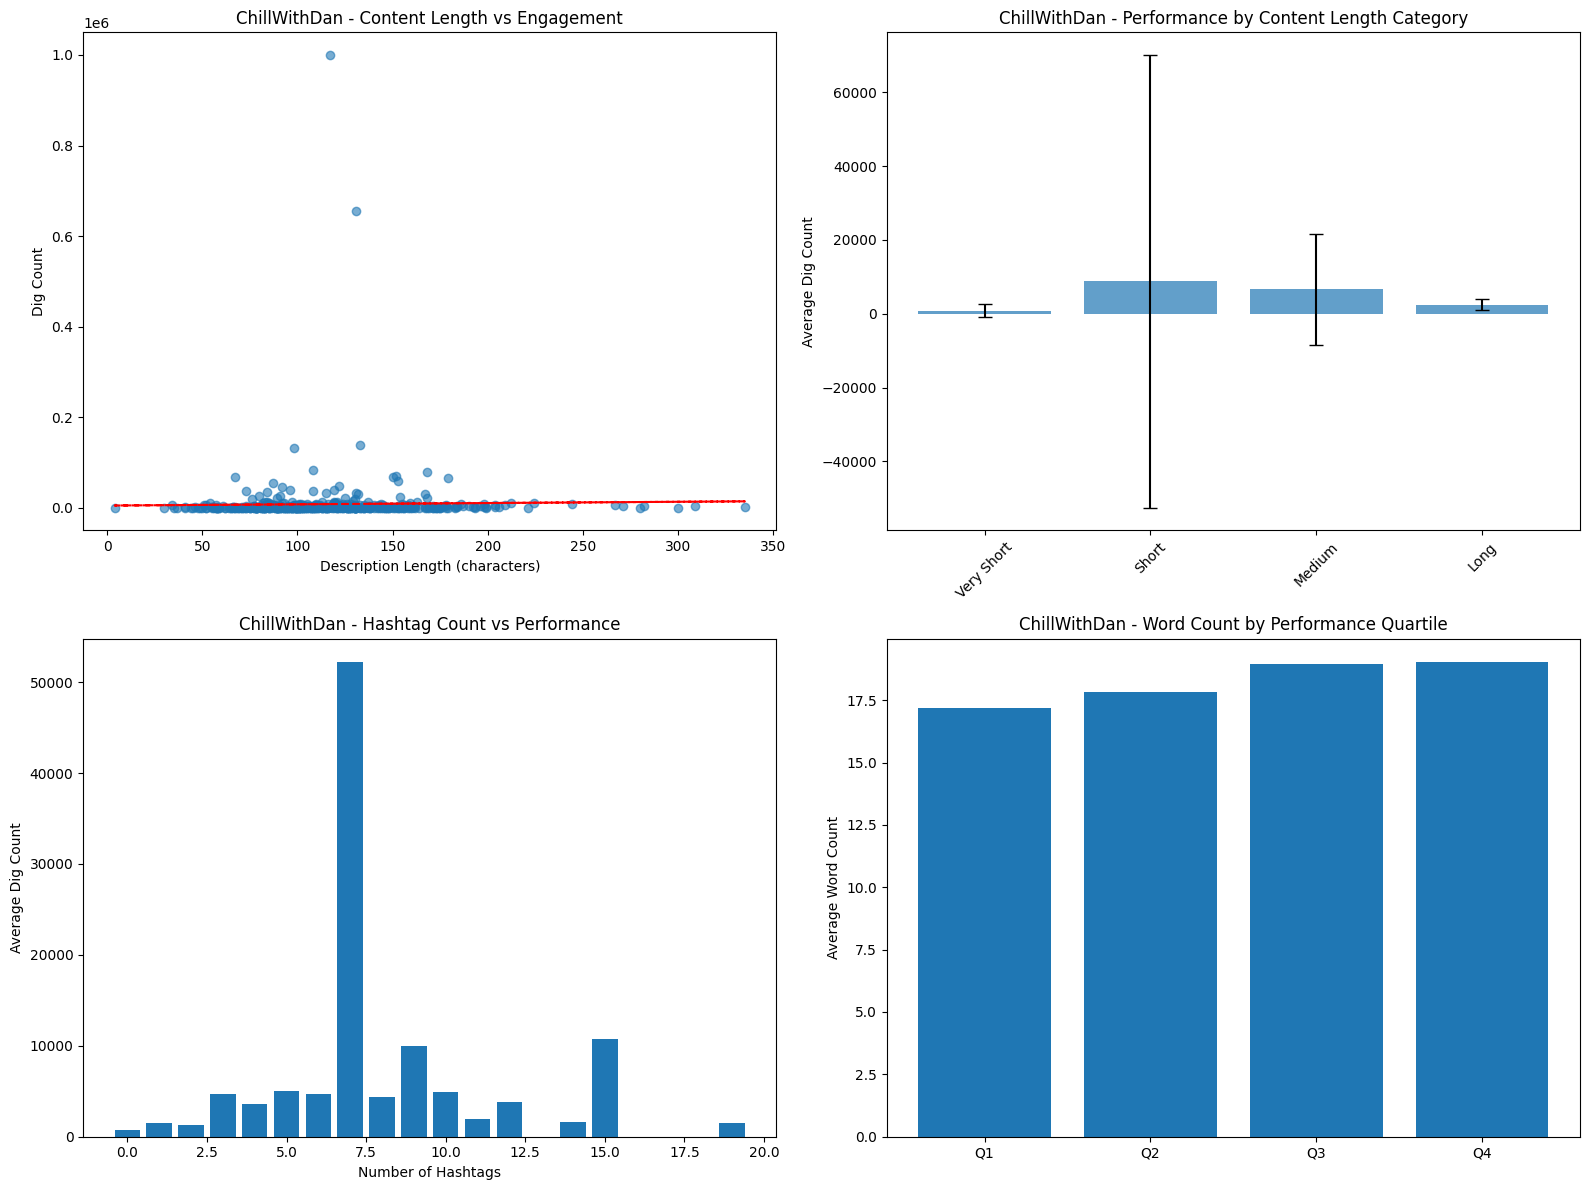

Phân tích content-performance đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/content_performance_analysis_results/ChillWithDan_content_performance_plot.png
- Stats: /content/drive/MyDrive/DMA/content_performance_analysis_results/ChillWithDan_content_performance_stats.xlsx
  length_engagement_corr: 0.021215551338938078
  hashtag_engagement_corr: 0.04115313104503315
  word_engagement_corr: -0.008635855740894087
  best_content_category: Short
  optimal_hashtag_count: 7.0

=== Duy Luân Content-Performance Analysis ===


<ipython-input-6-6809cffde9ee>:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_performance = df.groupby('content_category')['diggCount'].agg(['mean', 'std']).reset_index()
<ipython-input-6-6809cffde9ee>:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_words = df.groupby('performance_quartile')['word_count'].mean()


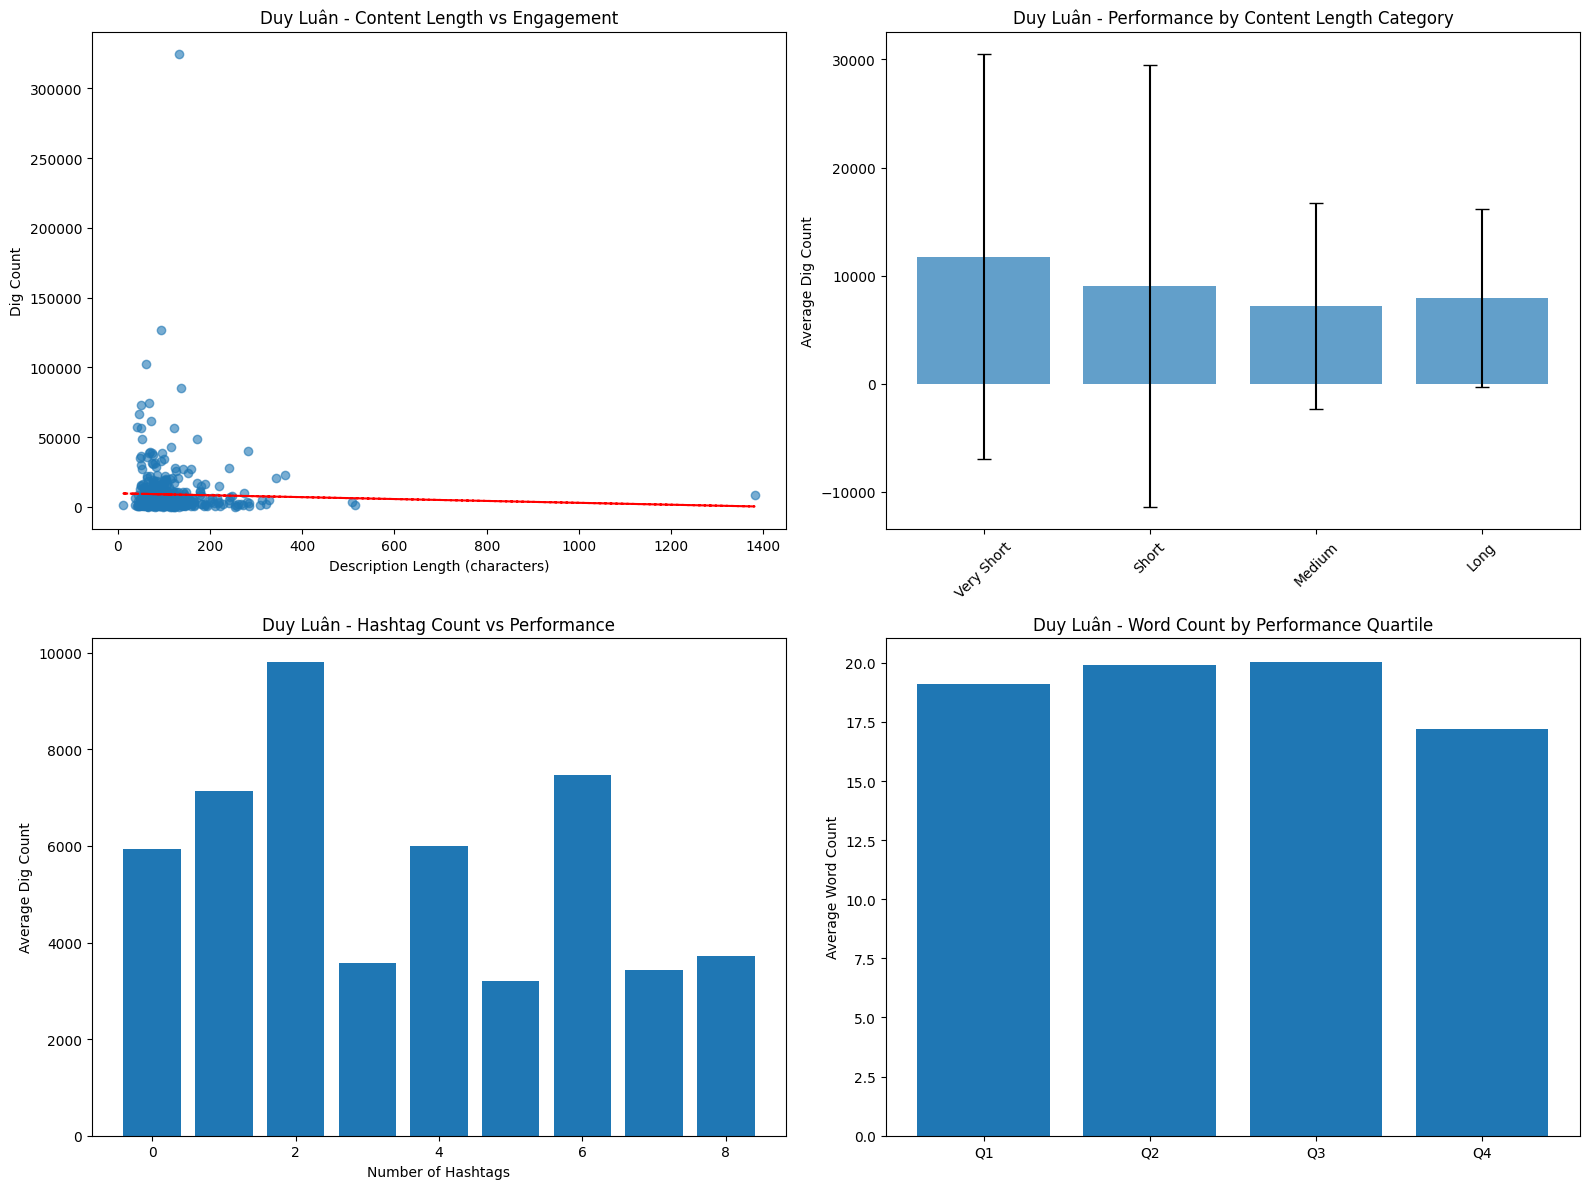

Phân tích content-performance đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/content_performance_analysis_results/Duy Luân_content_performance_plot.png
- Stats: /content/drive/MyDrive/DMA/content_performance_analysis_results/Duy Luân_content_performance_stats.xlsx
  length_engagement_corr: -0.028921967932147366
  hashtag_engagement_corr: -0.036450029702801895
  word_engagement_corr: -0.026673005956929393
  best_content_category: Very Short
  optimal_hashtag_count: 2


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def analyze_content_performance_relationship(df, channel_name, output_dir):
    """Phân tích mối quan hệ giữa nội dung và hiệu suất"""
    if 'desc' not in df.columns:
        print(f"No description column found for {channel_name}")
        return None

    # Tính toán các metrics nội dung
    df['desc_length'] = df['desc'].str.len()
    df['word_count'] = df['desc'].str.split().str.len()
    df['hashtag_count'] = df['desc'].str.count('#')
    df['mention_count'] = df['desc'].str.count('@')

    # Phân loại content length
    df['content_category'] = pd.cut(df['desc_length'],
                                    bins=[0, 50, 150, 300, float('inf')],
                                    labels=['Very Short', 'Short', 'Medium', 'Long'])

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Content length vs Engagement
    if 'diggCount' in df.columns:
        # Loại bỏ giá trị thiếu trong desc_length và diggCount
        valid_data = df.dropna(subset=['desc_length', 'diggCount'])
        axes[0, 0].scatter(valid_data['desc_length'], valid_data['diggCount'], alpha=0.6)
        axes[0, 0].set_title(f'{channel_name} - Content Length vs Engagement')
        axes[0, 0].set_xlabel('Description Length (characters)')
        axes[0, 0].set_ylabel('Dig Count')

        # Add trend line
        z = np.polyfit(valid_data['desc_length'], valid_data['diggCount'], 1)
        p = np.poly1d(z)
        axes[0, 0].plot(valid_data['desc_length'], p(valid_data['desc_length']), "r--")

    # 2. Content category performance
    category_performance = df.groupby('content_category')['diggCount'].agg(['mean', 'std']).reset_index()
    axes[0, 1].bar(category_performance['content_category'], category_performance['mean'],
                   yerr=category_performance['std'], alpha=0.7, capsize=5)
    axes[0, 1].set_title(f'{channel_name} - Performance by Content Length Category')
    axes[0, 1].set_ylabel('Average Dig Count')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # 3. Hashtag count vs Performance
    hashtag_performance = df.groupby('hashtag_count')['diggCount'].mean().reset_index()
    axes[1, 0].bar(hashtag_performance['hashtag_count'], hashtag_performance['diggCount'])
    axes[1, 0].set_title(f'{channel_name} - Hashtag Count vs Performance')
    axes[1, 0].set_xlabel('Number of Hashtags')
    axes[1, 0].set_ylabel('Average Dig Count')

    # 4. Word count distribution by performance quartiles
    df['performance_quartile'] = pd.qcut(df['diggCount'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    quartile_words = df.groupby('performance_quartile')['word_count'].mean()
    axes[1, 1].bar(quartile_words.index, quartile_words.values)
    axes[1, 1].set_title(f'{channel_name} - Word Count by Performance Quartile')
    axes[1, 1].set_ylabel('Average Word Count')

    plt.tight_layout()
    plt.show()

    # Statistical insights
    content_insights = {
        'length_engagement_corr': df['desc_length'].corr(df['diggCount']),
        'hashtag_engagement_corr': df['hashtag_count'].corr(df['diggCount']),
        'word_engagement_corr': df['word_count'].corr(df['diggCount']),
        'best_content_category': category_performance.loc[category_performance['mean'].idxmax(), 'content_category'],
        'optimal_hashtag_count': hashtag_performance.loc[hashtag_performance['diggCount'].idxmax(), 'hashtag_count']
    }

    # Lưu kết quả vào Google Drive (Excel)
    excel_path = os.path.join(output_dir, f'{channel_name}_content_performance_stats.xlsx')
    pd.DataFrame.from_dict(content_insights, orient='index', columns=['Value']).to_excel(excel_path)

    # Lưu kết quả biểu đồ vào Google Drive
    plot_path = os.path.join(output_dir, f'{channel_name}_content_performance_plot.png')
    fig.savefig(plot_path)

    print(f"Phân tích content-performance đã được lưu vào Google Drive tại:\n- Plot: {plot_path}\n- Stats: {excel_path}")

    return content_insights

# Đường dẫn thư mục lưu kết quả vào Google Drive
output_dir = '/content/drive/MyDrive/DMA/content_performance_analysis_results/'

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Phân tích content-performance cho cả 3 kênh
content_performance_analysis = {}
for name, df in [('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]:
    print(f"\n=== {name} Content-Performance Analysis ===")
    content_insights = analyze_content_performance_relationship(df, name, output_dir)
    content_performance_analysis[name] = content_insights
    if content_insights:
        for key, value in content_insights.items():
            print(f"  {key}: {value}")


GIAI ĐOẠN 4: MULTIVARIATE ANALYSIS
4.1 Advanced Correlation Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Duy Thẩm Multivariate Analysis ===


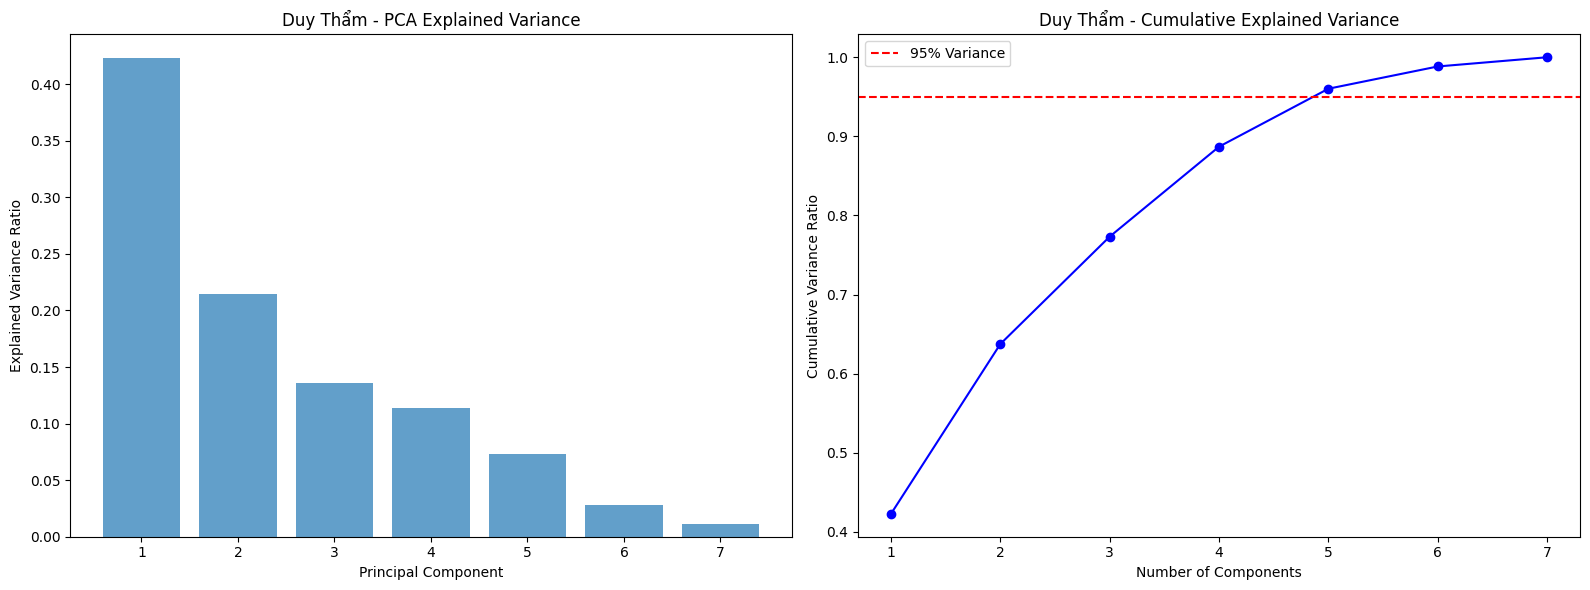

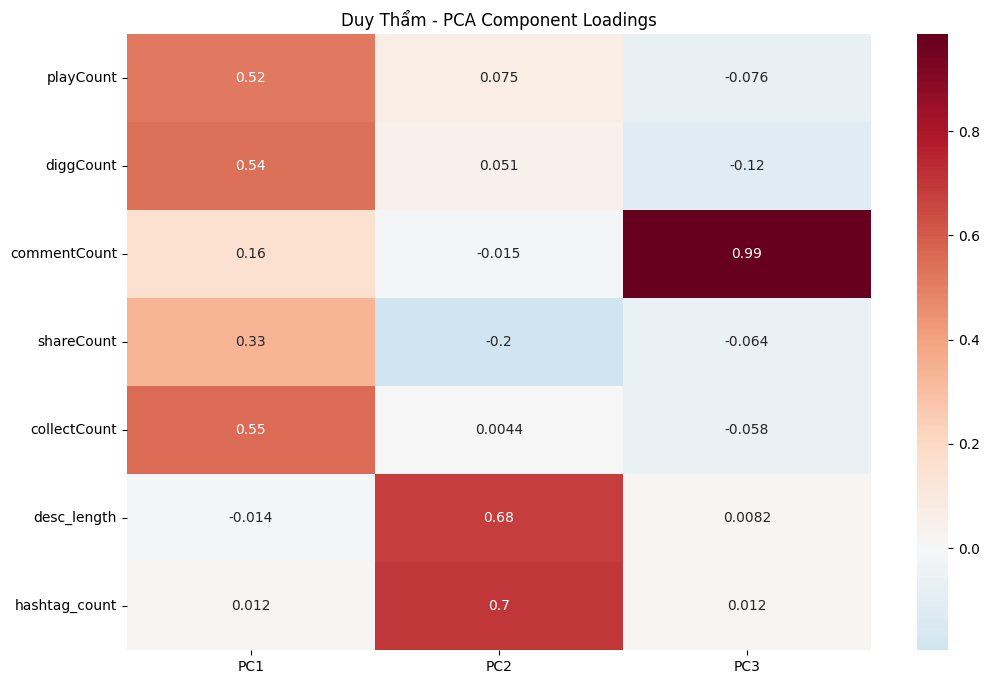

Phân tích PCA đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/multivariate_analysis_results/Duy Thẩm_pca_plots.png
- Stats: /content/drive/MyDrive/DMA/multivariate_analysis_results/Duy Thẩm_pca_insights.xlsx
  components_for_95_variance: 5
  first_component_variance: 0.4228859397007124
  top_features_pc1: ['collectCount', 'diggCount', 'playCount']

=== ChillWithDan Multivariate Analysis ===


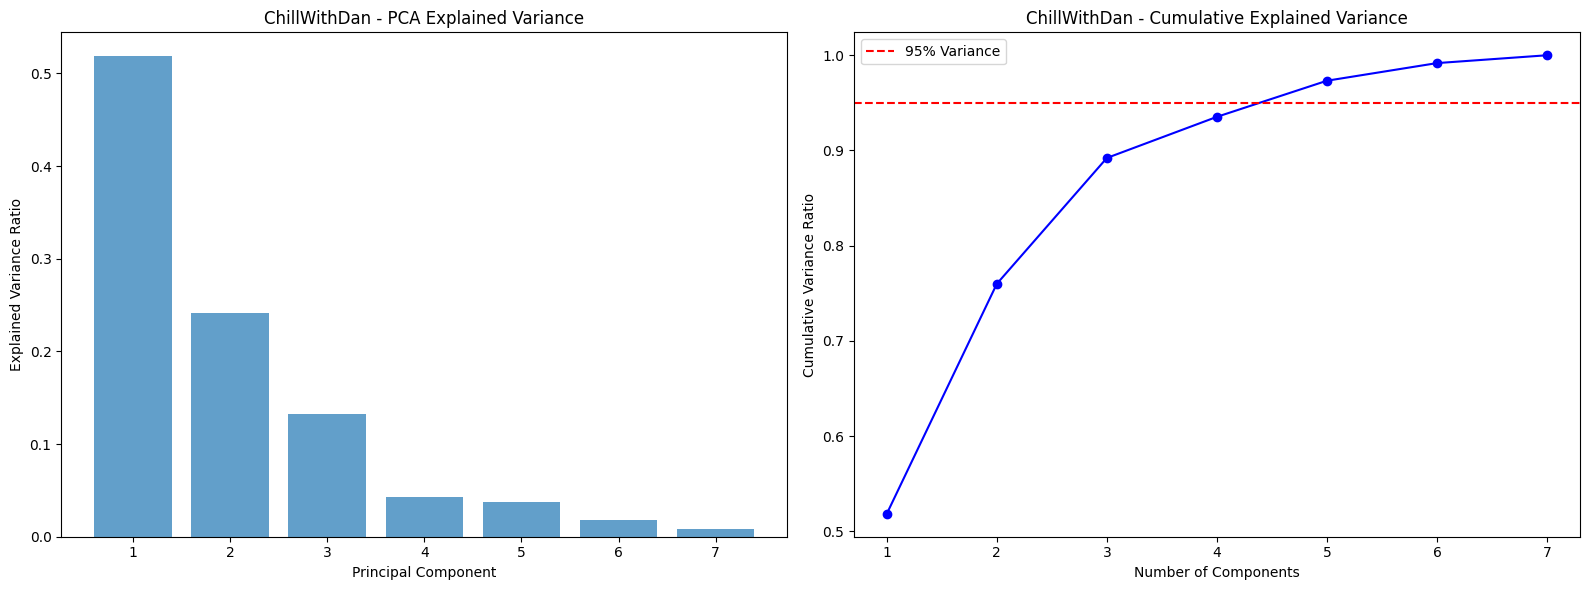

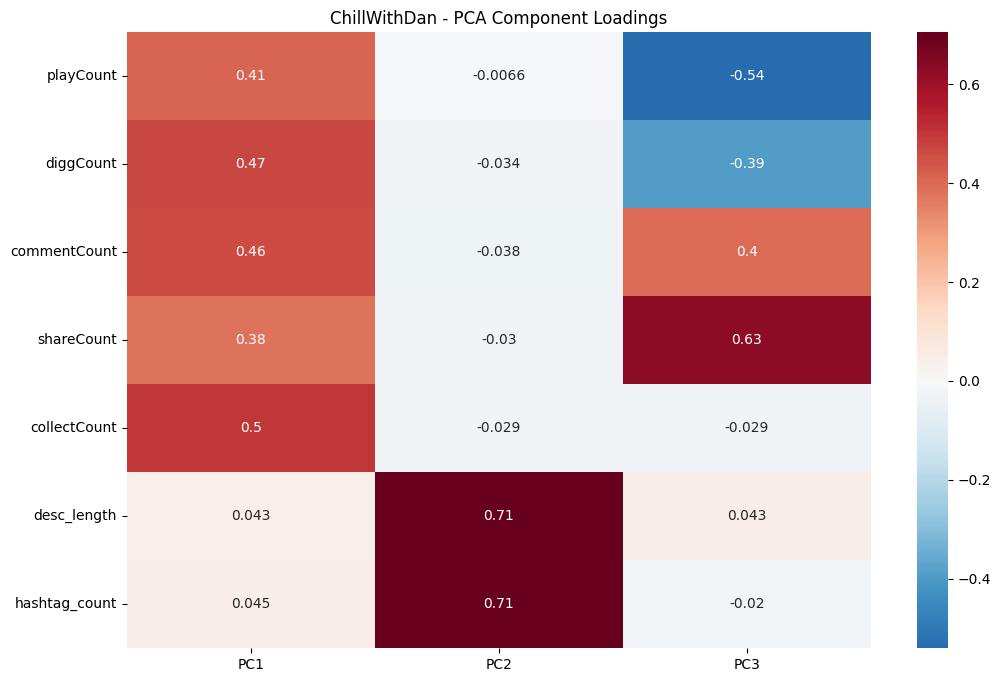

Phân tích PCA đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/multivariate_analysis_results/ChillWithDan_pca_plots.png
- Stats: /content/drive/MyDrive/DMA/multivariate_analysis_results/ChillWithDan_pca_insights.xlsx
  components_for_95_variance: 5
  first_component_variance: 0.5184257126262026
  top_features_pc1: ['collectCount', 'diggCount', 'commentCount']

=== Duy Luân Multivariate Analysis ===


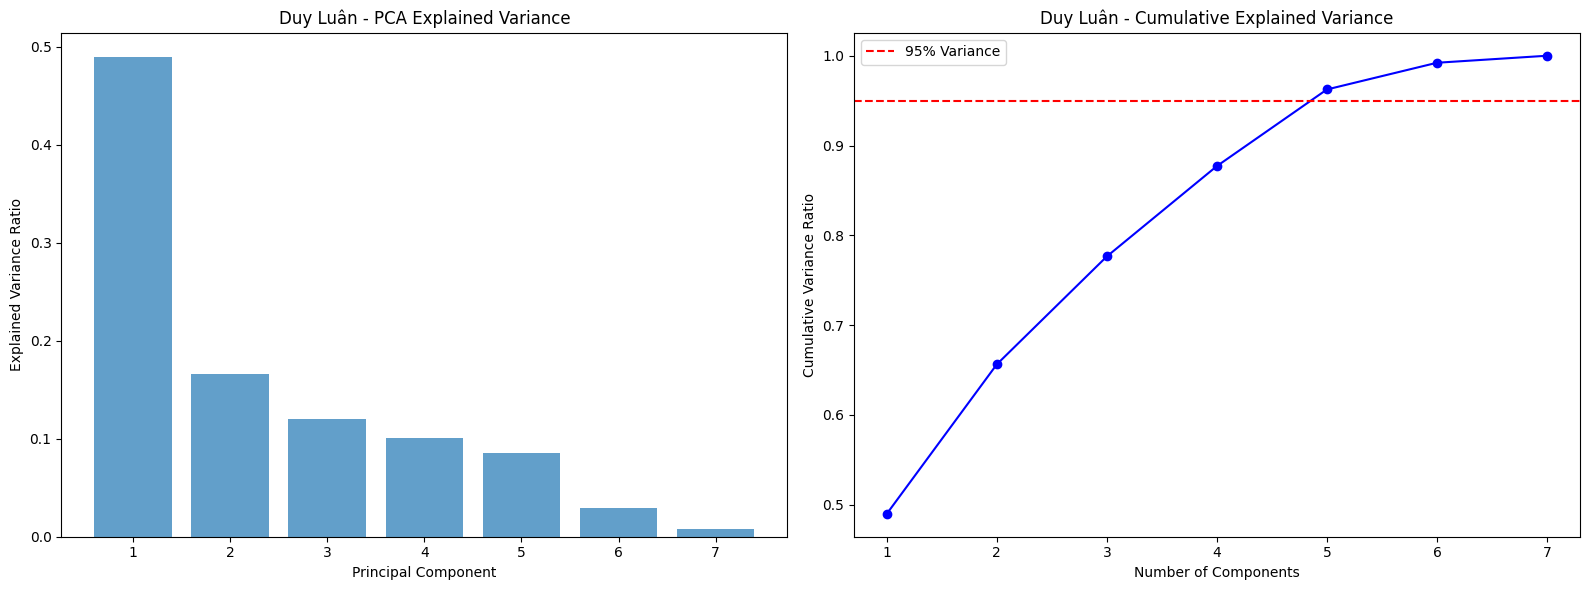

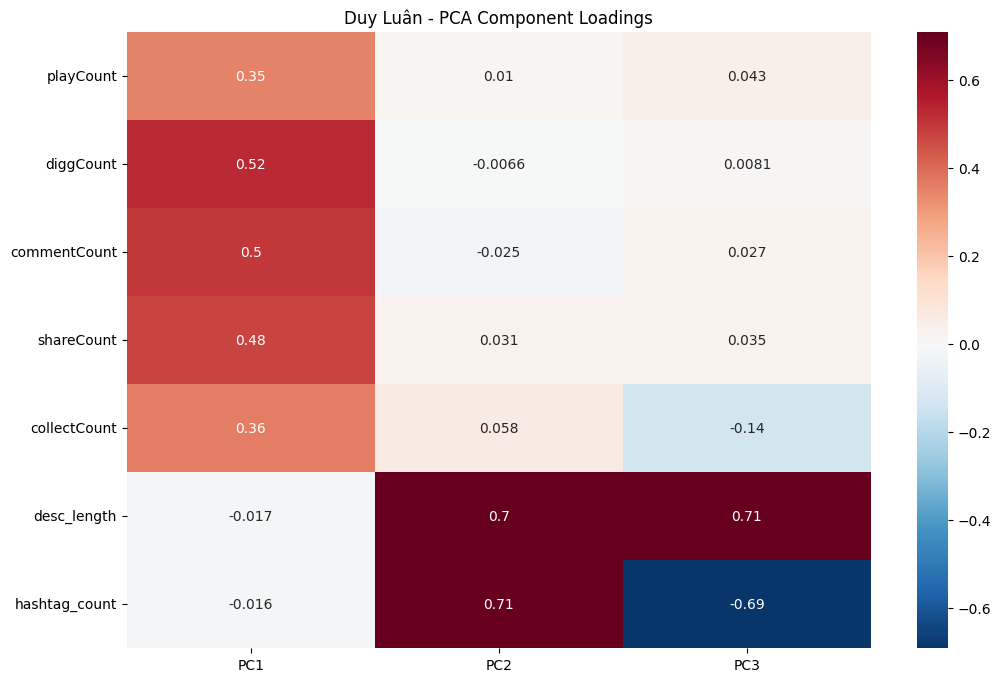

Phân tích PCA đã được lưu vào Google Drive tại:
- Plot: /content/drive/MyDrive/DMA/multivariate_analysis_results/Duy Luân_pca_plots.png
- Stats: /content/drive/MyDrive/DMA/multivariate_analysis_results/Duy Luân_pca_insights.xlsx
  components_for_95_variance: 5
  first_component_variance: 0.4899606484808594
  top_features_pc1: ['diggCount', 'commentCount', 'shareCount']


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def advanced_multivariate_analysis(df, channel_name, output_dir):
    """Phân tích đa biến nâng cao"""
    # Chọn các biến số quan trọng
    numeric_cols = ['playCount', 'diggCount', 'commentCount', 'shareCount', 'collectCount']

    if 'desc' in df.columns:
        df['desc_length'] = df['desc'].str.len()
        df['hashtag_count'] = df['desc'].str.count('#')
        numeric_cols.extend(['desc_length', 'hashtag_count'])

    # Chỉ giữ các cột có trong dataset
    available_cols = [col for col in numeric_cols if col in df.columns]

    if len(available_cols) < 3:
        print(f"Not enough variables for multivariate analysis in {channel_name}")
        return None, None

    # 1. Pair Plot (Biểu đồ các mối quan hệ giữa các cặp biến)
    if len(available_cols) <= 6:  # Tránh plot quá phức tạp
        plt.figure(figsize=(15, 12))
        sns.pairplot(df[available_cols].dropna(), diag_kind='kde', plot_kws={'alpha': 0.6})
        plt.suptitle(f'{channel_name} - Pairwise Relationships', y=1.02)
        plt.show()

    # 2. Principal Component Analysis (PCA)
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[available_cols].dropna())

    # PCA
    pca = PCA()
    pca_result = pca.fit_transform(scaled_data)

    # Visualize PCA
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Explained variance
    axes[0].bar(range(1, len(pca.explained_variance_ratio_) + 1),
                pca.explained_variance_ratio_, alpha=0.7)
    axes[0].set_title(f'{channel_name} - PCA Explained Variance')
    axes[0].set_xlabel('Principal Component')
    axes[0].set_ylabel('Explained Variance Ratio')

    # Cumulative explained variance
    cumsum_var = np.cumsum(pca.explained_variance_ratio_)
    axes[1].plot(range(1, len(cumsum_var) + 1), cumsum_var, 'bo-')
    axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
    axes[1].set_title(f'{channel_name} - Cumulative Explained Variance')
    axes[1].set_xlabel('Number of Components')
    axes[1].set_ylabel('Cumulative Variance Ratio')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    # 3. Feature Importance (Component Loading)
    feature_importance = pd.DataFrame(
        pca.components_[:3].T,  # Top 3 components
        columns=[f'PC{i+1}' for i in range(3)],
        index=available_cols
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(feature_importance, annot=True, cmap='RdBu_r', center=0)
    plt.title(f'{channel_name} - PCA Component Loadings')
    plt.show()

    pca_insights = {
        'components_for_95_variance': np.argmax(cumsum_var >= 0.95) + 1,
        'first_component_variance': pca.explained_variance_ratio_[0],
        'top_features_pc1': feature_importance['PC1'].abs().nlargest(3).index.tolist()
    }

    # Lưu kết quả vào Google Drive (Excel)
    excel_path = os.path.join(output_dir, f'{channel_name}_pca_insights.xlsx')
    pd.DataFrame.from_dict(pca_insights, orient='index', columns=['Value']).to_excel(excel_path)

    # Lưu kết quả biểu đồ vào Google Drive
    plot_path = os.path.join(output_dir, f'{channel_name}_pca_plots.png')
    fig.savefig(plot_path)

    print(f"Phân tích PCA đã được lưu vào Google Drive tại:\n- Plot: {plot_path}\n- Stats: {excel_path}")

    return pca_insights, feature_importance

# Đường dẫn thư mục lưu kết quả vào Google Drive
output_dir = '/content/drive/MyDrive/DMA/multivariate_analysis_results/'

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Phân tích multivariate cho cả 3 kênh
multivariate_analysis = {}
for name, df in [('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]:
    print(f"\n=== {name} Multivariate Analysis ===")
    pca_insights, feature_importance = advanced_multivariate_analysis(df, name, output_dir)
    multivariate_analysis[name] = {'pca_insights': pca_insights, 'feature_importance': feature_importance}
    if pca_insights:
        for key, value in pca_insights.items():
            print(f"  {key}: {value}")


4.2 Clustering Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Duy Thẩm Clustering Analysis ===


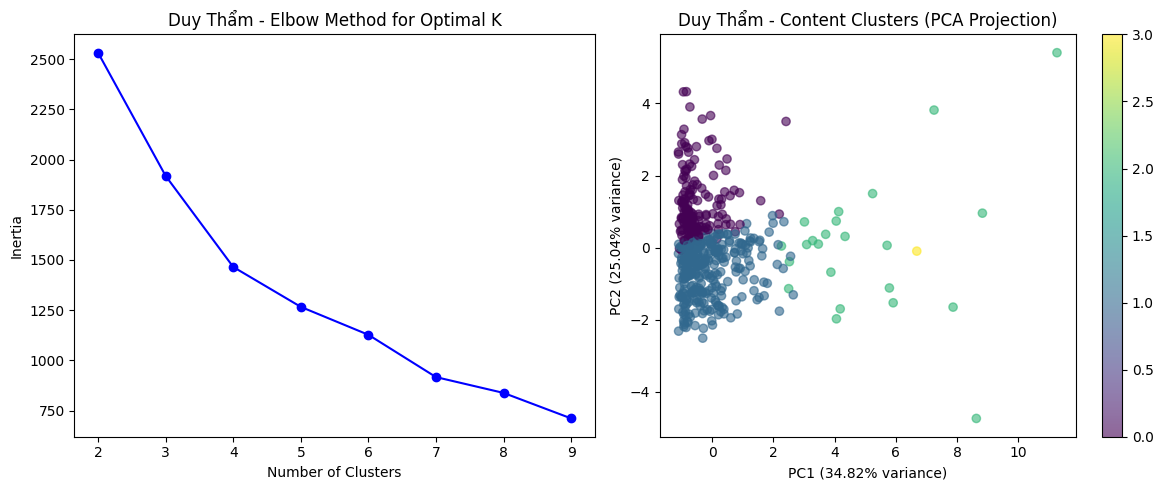


Duy Thẩm Cluster Characteristics:
            playCount                   diggCount                 \
                 mean           std          mean            std   
cluster                                                            
0        2.446546e+06  1.996388e+06  1.267871e+05  121068.416822   
1        3.467143e+06  3.015480e+06  1.841155e+05  153984.137638   
2        1.797826e+07  9.850010e+06  1.025413e+06  635925.021527   
3        1.230000e+07           NaN  4.935000e+05            NaN   

          commentCount                 shareCount                desc_length  \
                  mean          std          mean            std        mean   
cluster                                                                        
0          1083.716049  1456.536108   2071.290123    3164.300581   95.080247   
1          1757.711538  3460.501150   5127.878205    7779.112836   59.839744   
2         12813.000000  7691.312910  80487.130435  103244.128848   75.347826   
3       

<Figure size 640x480 with 0 Axes>

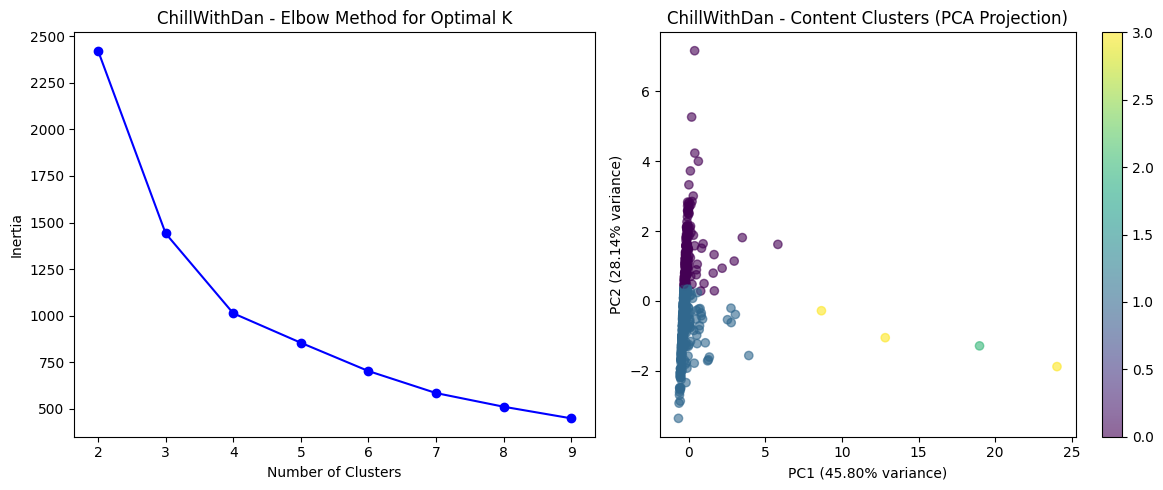


ChillWithDan Cluster Characteristics:
            playCount                     diggCount                 \
                 mean           std            mean            std   
cluster                                                              
0        2.329204e+05  1.231020e+06     4999.103226   11446.807747   
1        1.547851e+05  5.058621e+05     4113.816817   11654.196572   
2        2.200000e+07           NaN  1000000.000000            NaN   
3        5.100000e+06  5.129327e+06   290733.333333  317179.386678   

        commentCount                 shareCount               desc_length  \
                mean          std          mean           std        mean   
cluster                                                                     
0          72.477419   151.620311    284.496774   1007.329009  160.838710   
1          66.009009   151.961720    181.054054    733.743244   95.084084   
2        1624.000000          NaN   1385.000000           NaN  117.000000   
3       

<Figure size 640x480 with 0 Axes>

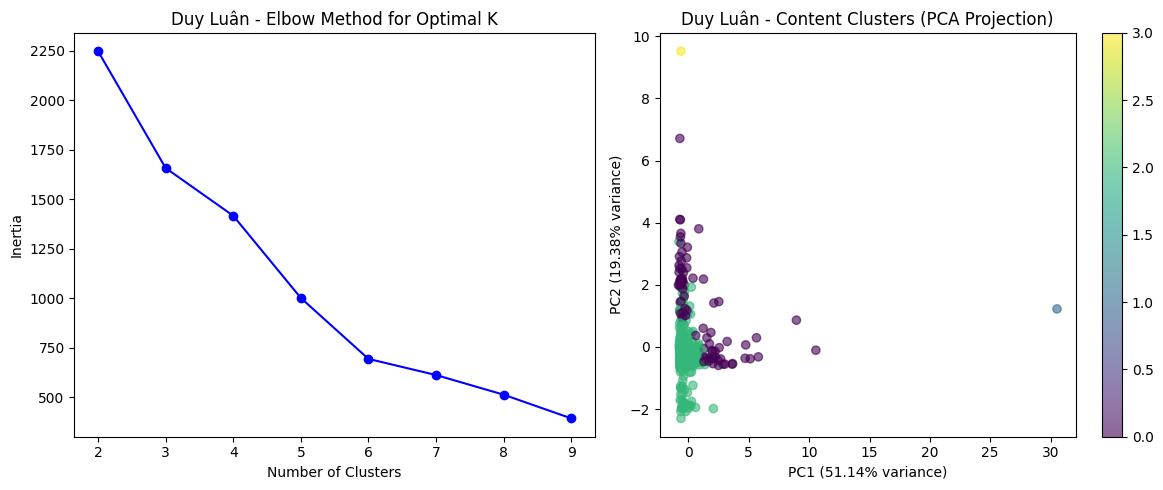


Duy Luân Cluster Characteristics:
            playCount                    diggCount               commentCount  \
                 mean           std           mean           std         mean   
cluster                                                                         
0        1.347484e+06  3.007972e+06   22281.212500  25536.714201   643.587500   
1        1.090000e+07           NaN  324200.000000           NaN  8066.000000   
2        2.781492e+05  2.672072e+05    5693.547847   5949.878258   164.873206   
3        2.268000e+05           NaN    8777.000000           NaN    77.000000   

                       shareCount               desc_length             \
                std          mean          std         mean        std   
cluster                                                                  
0        839.723865   1561.962500  2046.675028   135.762500  78.091028   
1               NaN  64600.000000          NaN   133.000000        NaN   
2        163.580239    418.

<Figure size 640x480 with 0 Axes>

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def perform_clustering_analysis(df, channel_name, output_dir):
    """Phân tích clustering để nhóm content"""
    # Chuẩn bị features
    feature_cols = ['playCount', 'diggCount', 'commentCount', 'shareCount']
    if 'desc' in df.columns:
        df['desc_length'] = df['desc'].str.len()
        df['hashtag_count'] = df['desc'].str.count('#')
        feature_cols.extend(['desc_length', 'hashtag_count'])

    available_features = [col for col in feature_cols if col in df.columns]

    if len(available_features) < 3:
        print(f"Not enough features for clustering in {channel_name}")
        return None, None

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[available_features].dropna())

    # K-means clustering
    # Tìm số cluster tối ưu (Elbow method)
    inertias = []
    K_range = range(2, 10)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertias.append(kmeans.inertia_)

    # Visualize elbow curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(K_range, inertias, 'bo-')
    plt.title(f'{channel_name} - Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

    # Chọn k=4 làm mặc định
    optimal_k = 4
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)

    # Thêm cluster labels vào dataframe
    df_clean = df[available_features].dropna().copy()
    df_clean['cluster'] = cluster_labels

    # Visualize clusters (2D projection)
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_features)
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                          c=cluster_labels, cmap='viridis', alpha=0.6)
    plt.title(f'{channel_name} - Content Clusters (PCA Projection)')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

    # Phân tích đặc điểm từng cluster
    cluster_analysis = df_clean.groupby('cluster')[available_features].agg(['mean', 'std'])
    print(f"\n{channel_name} Cluster Characteristics:")
    print(cluster_analysis)

    # Cluster insights
    cluster_insights = {}
    for cluster_id in range(optimal_k):
        cluster_data = df_clean[df_clean['cluster'] == cluster_id]
        cluster_insights[f'cluster_{cluster_id}'] = {
            'size': len(cluster_data),
            'percentage': len(cluster_data) / len(df_clean) * 100,
            'dominant_feature': cluster_data[available_features].mean().idxmax(),
            'avg_performance': cluster_data['diggCount'].mean() if 'diggCount' in cluster_data.columns else None
        }

    # Lưu kết quả vào Google Drive (Excel)
    excel_path = os.path.join(output_dir, f'{channel_name}_cluster_insights.xlsx')
    cluster_insights_df = pd.DataFrame.from_dict(cluster_insights, orient='index')
    cluster_insights_df.to_excel(excel_path)

    # Lưu kết quả biểu đồ vào Google Drive
    plot_path = os.path.join(output_dir, f'{channel_name}_cluster_plots.png')
    plt.savefig(plot_path)

    print(f"Phân tích clustering đã được lưu vào Google Drive tại:\n- Plot: {plot_path}\n- Stats: {excel_path}")

    return cluster_insights, cluster_analysis

# Đường dẫn thư mục lưu kết quả vào Google Drive
output_dir = '/content/drive/MyDrive/DMA/clustering_analysis_results/'

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Phân tích clustering cho cả 3 kênh
clustering_analysis = {}
for name, df in [('Duy Thẩm', duy_tham), ('ChillWithDan', chillwithdan), ('Duy Luân', duy_luan)]:
    print(f"\n=== {name} Clustering Analysis ===")
    cluster_insights, cluster_chars = perform_clustering_analysis(df, name, output_dir)
    clustering_analysis[name] = {'insights': cluster_insights, 'characteristics': cluster_chars}
    if cluster_insights:
        for key, value in cluster_insights.items():
            print(f"  {key}: {value}")


GIAI ĐOẠN 5: COMPARATIVE ANALYSIS
5.1 Cross-Channel Comparison

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


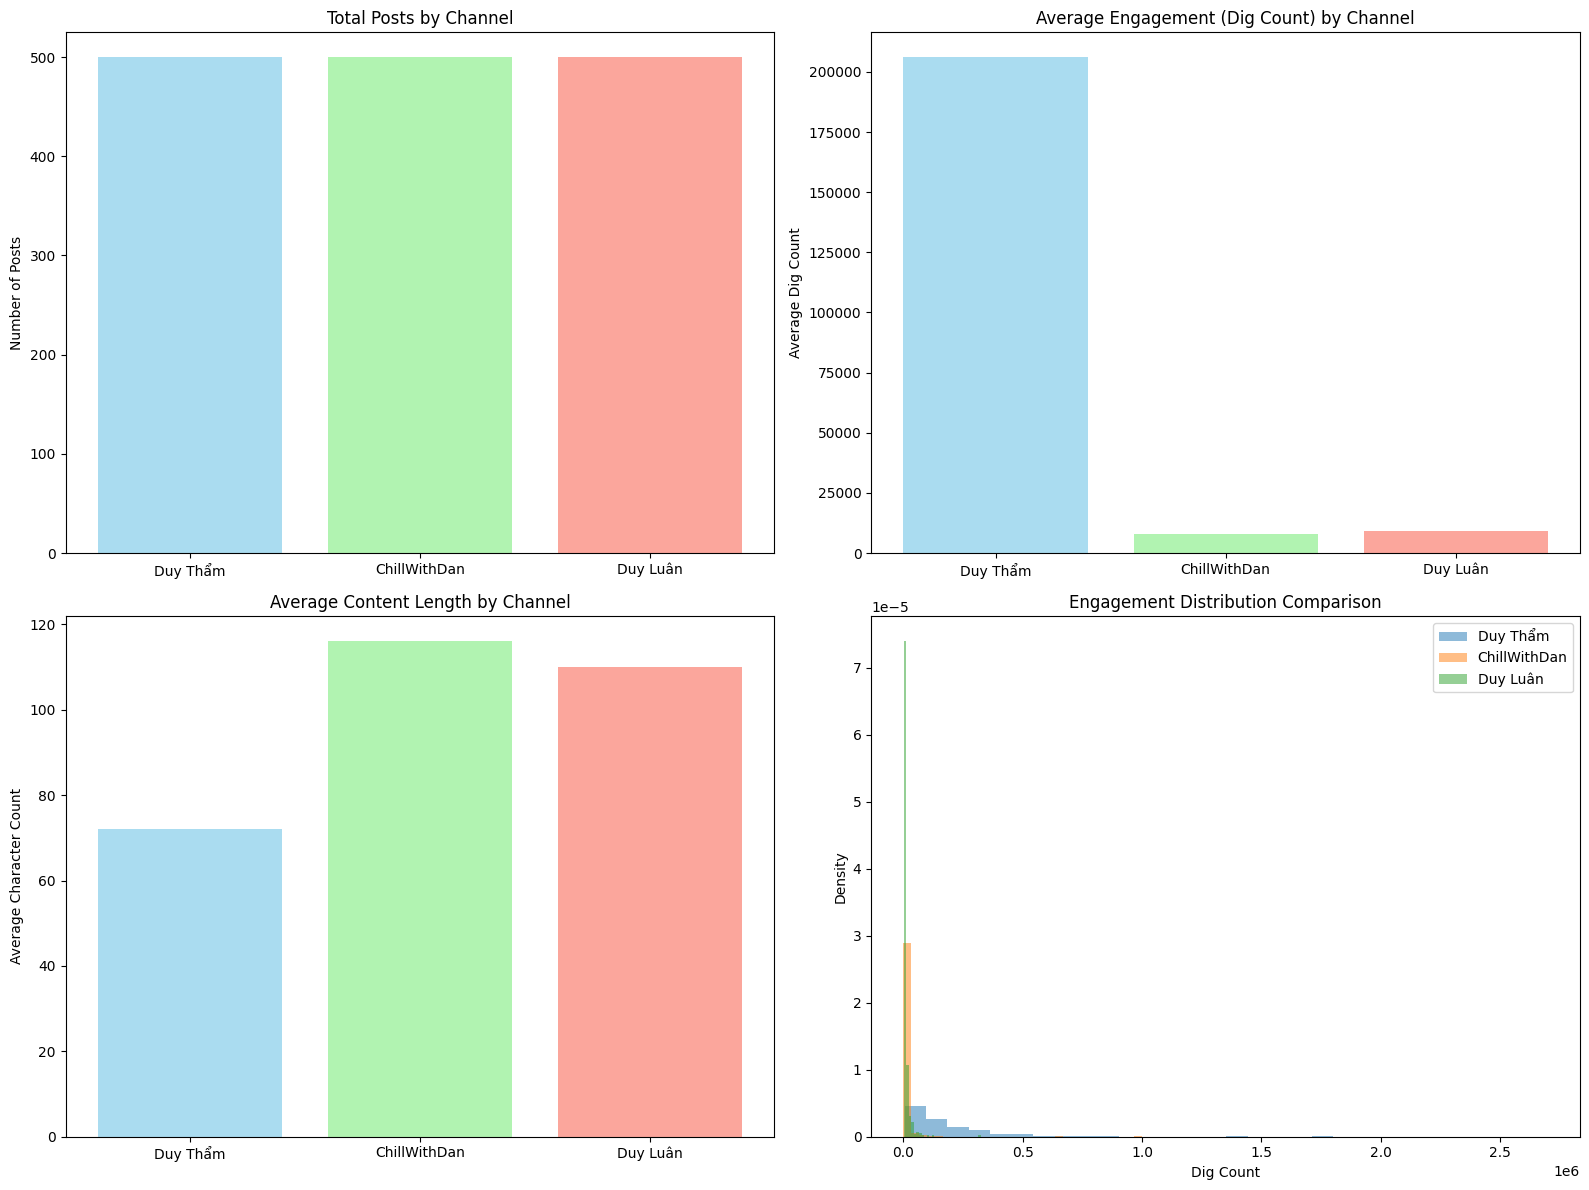


=== CROSS-CHANNEL COMPARISON SUMMARY ===
             total_posts                                     avg_engagement  \
Duy Thẩm             500  {'playCount': 3825778.4, 'diggCount': 206130.9...   
ChillWithDan         500  {'playCount': 250162.698, 'diggCount': 8042.22...   
Duy Luân             500  {'playCount': 470383.704, 'diggCount': 8990.75...   

                                               total_engagement  \
Duy Thẩm      {'playCount': 1912889200, 'diggCount': 1030654...   
ChillWithDan  {'playCount': 125081349, 'diggCount': 4021114,...   
Duy Luân      {'playCount': 235191852, 'diggCount': 4495377,...   

                                            engagement_variance top_performer  \
Duy Thẩm      {'playCount': 21324066189873.305, 'diggCount':...      44800000   
ChillWithDan  {'playCount': 1839846794826.2378, 'diggCount':...      22000000   
Duy Luân      {'playCount': 1864498733566.2695, 'diggCount':...      26100000   

             avg_content_length avg_hashtag_usa

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Đảm bảo Google Drive đã được kết nối (nếu sử dụng Google Colab)
from google.colab import drive
drive.mount('/content/drive')

def compare_channels_comprehensive(channels_data, output_dir):
    """So sánh toàn diện giữa các kênh"""
    # Tạo summary statistics cho từng kênh
    channel_summary = {}
    for name, df in channels_data.items():
        engagement_cols = ['playCount', 'diggCount', 'commentCount', 'shareCount', 'collectCount']
        available_cols = [col for col in engagement_cols if col in df.columns]

        if available_cols:
            summary = {
                'total_posts': len(df),
                'avg_engagement': df[available_cols].mean().to_dict(),
                'total_engagement': df[available_cols].sum().to_dict(),
                'engagement_variance': df[available_cols].var().to_dict(),
                'top_performer': df[available_cols[0]].max() if available_cols else 0
            }

            # Content analysis
            if 'desc' in df.columns:
                summary['avg_content_length'] = df['desc'].str.len().mean()
                summary['avg_hashtag_usage'] = df['desc'].str.count('#').mean()

            channel_summary[name] = summary

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Total posts comparison
    channels = list(channel_summary.keys())
    total_posts = [channel_summary[ch]['total_posts'] for ch in channels]
    axes[0, 0].bar(channels, total_posts, alpha=0.7, color=['skyblue', 'lightgreen', 'salmon'])
    axes[0, 0].set_title('Total Posts by Channel')
    axes[0, 0].set_ylabel('Number of Posts')

    # 2. Average engagement comparison
    if 'diggCount' in channel_summary[channels[0]]['avg_engagement']:
        avg_engagement = [channel_summary[ch]['avg_engagement']['diggCount'] for ch in channels]
        axes[0, 1].bar(channels, avg_engagement, alpha=0.7, color=['skyblue', 'lightgreen', 'salmon'])
        axes[0, 1].set_title('Average Engagement (Dig Count) by Channel')
        axes[0, 1].set_ylabel('Average Dig Count')

    # 3. Content length comparison
    if all('avg_content_length' in channel_summary[ch] for ch in channels):
        avg_lengths = [channel_summary[ch]['avg_content_length'] for ch in channels]
        axes[1, 0].bar(channels, avg_lengths, alpha=0.7, color=['skyblue', 'lightgreen', 'salmon'])
        axes[1, 0].set_title('Average Content Length by Channel')
        axes[1, 0].set_ylabel('Average Character Count')

    # 4. Engagement distribution comparison
    if len(channels_data) > 1:
        for i, (name, df) in enumerate(channels_data.items()):
            if 'diggCount' in df.columns:
                axes[1, 1].hist(df['diggCount'], bins=30, alpha=0.5,
                                 label=name, density=True)
        axes[1, 1].set_title('Engagement Distribution Comparison')
        axes[1, 1].set_xlabel('Dig Count')
        axes[1, 1].set_ylabel('Density')
        axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

    # Statistical comparison summary
    print("\n=== CROSS-CHANNEL COMPARISON SUMMARY ===")
    comparison_df = pd.DataFrame(channel_summary).T
    print(comparison_df)

    # Lưu kết quả vào Google Drive (Excel)
    excel_path = os.path.join(output_dir, 'cross_channel_comparison_summary.xlsx')
    comparison_df.to_excel(excel_path)

    # Lưu kết quả biểu đồ vào Google Drive
    plot_path = os.path.join(output_dir, 'cross_channel_comparison_plots.png')
    fig.savefig(plot_path)

    return comparison_df

# Đường dẫn thư mục lưu kết quả vào Google Drive
output_dir = '/content/drive/MyDrive/DMA/channel_comparison_results/'

# Kiểm tra và tạo thư mục nếu chưa có
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Phân tích so sánh giữa các kênh
channels_data = {
    'Duy Thẩm': duy_tham,
    'ChillWithDan': chillwithdan,
    'Duy Luân': duy_luan
}

# Thực hiện so sánh
cross_channel_comparison = compare_channels_comprehensive(channels_data, output_dir)


GIAI ĐOẠN 6: ACTIONABLE INSIGHTS & RECOMMENDATIONS
6.1 Performance Optimization Recommendations

In [11]:
def generate_optimization_recommendations(analysis_results):
    """Tạo ra những khuyến nghị cụ thể để tối ưu hiệu suất"""
    recommendations = {}

    # Duyệt qua các kênh trong kết quả phân tích
    for channel_name, analysis_data in analysis_results.items():
        channel_recs = {
            'content_strategy': [],
            'timing_strategy': [],
            'engagement_strategy': [],
            'hashtag_strategy': []
        }

        # Content strategy recommendations
        content_analysis = analysis_data.get('content_performance_analysis', {})
        if content_analysis:
            if content_analysis.get('length_engagement_corr', 0) > 0.3:
                channel_recs['content_strategy'].append("Longer content tends to perform better.")
            elif content_analysis.get('length_engagement_corr', 0) < -0.3:
                channel_recs['content_strategy'].append("Shorter content performs better.")

            optimal_hashtags = content_analysis.get('optimal_hashtag_count', 0)
            if optimal_hashtags > 0:
                channel_recs['hashtag_strategy'].append(f"Optimal hashtag count is {optimal_hashtags}.")

        # Timing strategy recommendations
        time_analysis = analysis_data.get('time_performance_analysis', {})
        if time_analysis:
            best_hour = time_analysis.get('best_hour')
            best_day = time_analysis.get('best_day')
            if best_hour:
                channel_recs['timing_strategy'].append(f"Post at {best_hour}:00 for maximum engagement.")
            if best_day:
                channel_recs['timing_strategy'].append(f"Post on {best_day} for best performance.")

        # Engagement strategy recommendations
        corr_analysis = analysis_data.get('correlation_analysis', {})
        if corr_analysis and 'pairs' in corr_analysis:
            strong_corr = corr_analysis['pairs'].iloc[0] if len(corr_analysis['pairs']) > 0 else None
            if strong_corr is not None and abs(strong_corr['correlation']) > 0.7:
                channel_recs['engagement_strategy'].append(
                    f"Focus on {strong_corr['pair']} - they are strongly correlated ({strong_corr['correlation']:.2f})."
                )

        # Lưu các khuyến nghị của kênh vào dictionary
        recommendations[channel_name] = channel_recs

    # Hiển thị khuyến nghị
    print("\n" + "="*60)
    print("ACTIONABLE RECOMMENDATIONS FOR OPTIMIZATION")
    print("="*60)

    for channel, recs in recommendations.items():
        print(f"\n🎯 {channel.upper()} RECOMMENDATIONS:")
        print("-" * 40)
        for category, rec_list in recs.items():
            if rec_list:
                print(f"\n📊 {category.replace('_', ' ').title()}:")
                for rec in rec_list:
                    print(f" • {rec}")
            else:
                print(" • Continue current strategy - performance metrics look stable.")

    return recommendations

# Ví dụ: Dữ liệu phân tích kết quả cho các kênh
analysis_results = {
    'Duy Thẩm': {
        'content_performance_analysis': {
            'length_engagement_corr': 0.4,
            'optimal_hashtag_count': 3
        },
        'time_performance_analysis': {
            'best_hour': 14,
            'best_day': 'Monday'
        },
        'correlation_analysis': {
            'pairs': pd.DataFrame({
                'pair': ['playCount vs diggCount'],
                'correlation': [0.85]
            })
        }
    },
    'ChillWithDan': {
        'content_performance_analysis': {
            'length_engagement_corr': -0.2,
            'optimal_hashtag_count': 5
        },
        'time_performance_analysis': {
            'best_hour': 18,
            'best_day': 'Thursday'
        },
        'correlation_analysis': {
            'pairs': pd.DataFrame({
                'pair': ['commentCount vs diggCount'],
                'correlation': [0.75]
            })
        }
    },
    'Duy Luân': {
        'content_performance_analysis': {
            'length_engagement_corr': 0.1,
            'optimal_hashtag_count': 2
        },
        'time_performance_analysis': {
            'best_hour': 12,
            'best_day': 'Saturday'
        },
        'correlation_analysis': {
            'pairs': pd.DataFrame({
                'pair': ['shareCount vs diggCount'],
                'correlation': [0.5]
            })
        }
    }
}

# Tạo khuyến nghị tối ưu hóa cho các kênh
optimization_recommendations = generate_optimization_recommendations(analysis_results)



ACTIONABLE RECOMMENDATIONS FOR OPTIMIZATION

🎯 DUY THẨM RECOMMENDATIONS:
----------------------------------------

📊 Content Strategy:
 • Longer content tends to perform better.

📊 Timing Strategy:
 • Post at 14:00 for maximum engagement.
 • Post on Monday for best performance.

📊 Engagement Strategy:
 • Focus on playCount vs diggCount - they are strongly correlated (0.85).

📊 Hashtag Strategy:
 • Optimal hashtag count is 3.

🎯 CHILLWITHDAN RECOMMENDATIONS:
----------------------------------------
 • Continue current strategy - performance metrics look stable.

📊 Timing Strategy:
 • Post at 18:00 for maximum engagement.
 • Post on Thursday for best performance.

📊 Engagement Strategy:
 • Focus on commentCount vs diggCount - they are strongly correlated (0.75).

📊 Hashtag Strategy:
 • Optimal hashtag count is 5.

🎯 DUY LUÂN RECOMMENDATIONS:
----------------------------------------
 • Continue current strategy - performance metrics look stable.

📊 Timing Strategy:
 • Post at 12:00 for m